# Table of Contents

- [Imports](#imports)
- [Plan](#plan)
- [Removing Unneeded Columns](#removing)
- [Data Cleaning](#cleaning)
- [Sum of Signals](#sum)
- [Means of Signals](#means)
- [Standard Deviations of Signals](#std)
- [Lead Energetic](#Energetic)
- [Quadra](#Quadra)
- [Type Distribution](#Type)
- [Developments](#Developments)
- [Emotional Attitudes](#Emotions)
- [Signal Mixing](#Mixing)
- [Fallen Affect](#Fallen)
- [Rigid Signals](#Rigid)
- [Fluid Signals](#Fluid)
- [Pe Signals](#Pe)
- [Pi Signals](#Pi)
- [Je Signals](#Je)
- [Ji Signals](#Ji)
- [Candid Signals](#Candid)
- [Measured Signals](#Measured)
- [Grounded Signals](#Grounded)
- [Suspended Signals](#Suspended)
- [Unguarded Signals](#Unguarded)
- [Guarded Signals](#Guarded)
- [Saving the Data](#Saving)

## Imports <a id='imports'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from distfit import distfit

## Plan <a id="plan"></a>

I have three "cuts" of the data that I want to perform machine learning on:

- all the usable data (i.e. excluding entries that don't have reports)

- the "Auburn" cut, which should remove Vultology reports from authors that have 20 or fewer reports (since they are less experienced)

- the "Lapis" cut, layered over the Auburn cut, which should take into account this analysis:
"I'm seeing something rather suspicious in the data. If I calculate P-axis coordinates with the formula (Suspended - Grounded )/(Suspended + Grounded ), which ranges from -1 (completely Grounded) to +1 (completely Suspended), then there are 90 samples with -1, i.e., Grounded with zero signal mixing.  However, there are only 8 samples in the (-1, -0.9] interval.  In the (-0.9, 0.8] interval there are 40 samples. IMO that strongly suggests that many of those Grounded samples with zero P-axis signal mixing have neglected Suspended signals. The other end of the spectrum also looks suspicious, though it's less extreme. 
There are 36 samples with P-axis coordinates of 1 (Suspended with zero signal mixing), only 3 samples in the [0.9, 1) interval, but 26 samples in the [0.8, 0.9) interval. As for J-axis coordinates, (Measured - Candid)/(Measured + Candid), there are 55 samples with coordinates of 1 (Measured with zero signal mixing), 23 samples in the [0.9, 1) interval, and 35 in the [0.8, 0.9) interval.  There's still an odd dip, but it's a lot less suspicious. At the other end, there are 23 samples with -1 (Candid with zero signal mixing), 12 samples in the (-1, -0.9] interval and 18 samples in the (-0.9, -0.8] interval. It might be worth repeating the statistical analysis reported earlier in this channel just on samples in the (-0.9, 0.9) intervals."

We will see if these different versions of the data give different statistical results or different results in machine learning algorithms.

## Removing Unneeded Columns <a id="removing"></a>

In [2]:
all_df = pd.read_csv("../Data/posts_2024-12-29.csv")
all_df.head()

Post Title           Author  \
0                  Janina Ramirez  Sierra Schwartz   
1                   Zeena Schreck  Sierra Schwartz   
2  Sandra Lee "Dr. Pimple Popper"  Sierra Schwartz   
3                     Johnny Depp         Ash Rose   
4                Pierre Poilievre        Peter Foy   

                                                 Bio  \
0  Dr. Janina Ramirez is a distinguished art hist...   
1  Zeena Schreck (née LaVey) is an artist, musici...   
2  Dr. Sandra Lee, widely known as Dr. Pimple Pop...   
3  Johnny Depp (born June 9, 1963, in Owensboro, ...   
4  Pierre Poilievre is a Canadian politician and ...   

                                           Video URL  \
0        https://www.youtube.com/watch?v=7I8ocwXM9tw   
1        https://www.youtube.com/watch?v=hurX8Tp3Mys   
2        https://www.youtube.com/watch?v=6r-7ke3bPWI   
3        https://www.youtube.com/watch?v=Z61poirKUwQ   
4  https://www.youtube.com/watch?v=noIgE8MHsLA&t=12s   

                                         Video 2 URL  \
0        https://www.youtube.com/watch?v=nkbUTbBJRdk   
1  https://www.youtube.com/watch?v=EmWXuEKTLcY&t=...   
2  https://www.youtube.com/watch?v=QegxWeEF2v8&t=20s   
3        https://www.youtube.com/watch?v=yvJoujHrE7Y   
4  https://www.youtube.com/watch?v=vZz6D81gy8U&t=17s   

                                         Video 3 URL  \
0  https://www.youtube.com/watch?v=V9j7XBnUpKU&t=...   
1  https://www.youtube.com/watch?v=oT2jyy97wns&t=...   
2  https://www.youtube.com/watch?v=KO0D8j57ugc&t=...   
3        https://www.youtube.com/watch?v=y1JbkoCmebM   
4  https://www.youtube.com/watch?v=ZE1ha0L7160&t=37s   

                                       GIF Breakdown Status  Type Development  \
0  https://docs.google.com/document/d/1csuIkMFoA2...    NaN  tesi        i-i-   
1  https://docs.google.com/document/d/1nU_Mn4A9dS...    NaN  fise        i-i-   
2  https://docs.google.com/document/d/1FoNISiu6Bb...    NaN  teni        i-i-   
3  https://docs.google.com/document/d/17csaWSjQKP...    NaN  tise        iii-   
4                                                NaN    NaN  tesi        ii--   

   ... SU5 Brushstrokes Eye Toggles SU6 Eye Head Trailing Motions  \
0  ...                          4.0                           2.0   
1  ...                          NaN                           NaN   
2  ...                          2.0                           NaN   
3  ...                          2.0                           2.0   
4  ...                          2.0                           2.0   

  SU7 Levity Effect SU8 Quirky Skits EU1 Responsive Nodding  \
0               4.0              2.0                    4.0   
1               NaN              2.0                    2.0   
2               NaN              NaN                    4.0   
3               NaN              2.0                    4.0   
4               NaN              NaN                    2.0   

  EU2 Polite Smiling EU3 Bashful Body Movements EG1 Upset Mouth Tension  \
0                4.0                        2.0                     NaN   
1                2.0                        NaN                     2.0   
2                7.0                        2.0                     2.0   
3                4.0                        2.0                     4.0   
4                2.0                        NaN                     4.0   

  EG2 Assertive Pushing  EG3 Stern Expressions  
0                   2.0                    NaN  
1                   2.0                    2.0  
2                   2.0                    NaN  
3                   NaN                    2.0  
4                   7.0                    2.0  

[5 rows x 91 columns]

In [3]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 91 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Post Title                     1211 non-null   object 
 1   Author                         1211 non-null   object 
 2   Bio                            553 non-null    object 
 3   Video URL                      1211 non-null   object 
 4   Video 2 URL                    507 non-null    object 
 5   Video 3 URL                    464 non-null    object 
 6   GIF Breakdown                  303 non-null    object 
 7   Status                         555 non-null    object 
 8   Type                           1211 non-null   object 
 9   Development                    1211 non-null   object 
 10  Emotions                       1211 non-null   object 
 11  Fallen Affect                  713 non-null    object 
 12  J Signal Mixing                455 non-null    o

I need to understand what all of these columns mean so that I know if I will need them.

- Post Title: name, which may be needed for indexing
- Author: the Vultology report author, it will be needed in research regarding the Auburn cut
- Bio: not needed for now, but could be useful for future research
- Video urls and GIF breakdown: not needed for now

I don't know what Status is in this context, so let's start making a list of unneeded columns and explore Status

In [4]:
unneeded = ['Bio', 'Video URL', 'Video 2 URL', 'Video 3 URL', 'GIF Breakdown']
unneeded

['Bio', 'Video URL', 'Video 2 URL', 'Video 3 URL', 'GIF Breakdown']

In [5]:
all_df['Status'].value_counts()

Status
publish          547
peer_reviewed      5
pending            3
Name: count, dtype: int64

Considering that a lot of those values are NaN, and most of the rest have the unclear designation "Publish", I doubt this is a meaningful feature, since technically all of these should be peer reviewed before being published anyways (thus the distinction between "Publush" and "Peer Review" is muddled)

We will certainly need type and development. Let's look at more of the columns:

In [6]:
unneeded.append('Status')
unneeded

['Bio', 'Video URL', 'Video 2 URL', 'Video 3 URL', 'GIF Breakdown', 'Status']

In [7]:
all_df.iloc[:, 10:].head()

Emotions Fallen Affect J Signal Mixing P Signal Mixing Alternative     Sex  \
0    seelie             0             low             low         NaN  female   
1  unseelie             3            high             low   TiSe I-I-  female   
2    seelie             0             low             low         NaN  female   
3   neutral             2             low             low   TiSe III-    male   
4  unseelie             1             low          medium         NaN    male   

  Age Range       Geography       Ethnicity  Checkbox  ...  \
0     1980s  western_europe  white/european       NaN  ...   
1     1960s   north_america  white/european       NaN  ...   
2     1970s   north_america     han_chinese       NaN  ...   
3     1960s   north_america  white/european       NaN  ...   
4     1970s   north_america  white/european       NaN  ...   

  SU5 Brushstrokes Eye Toggles  SU6 Eye Head Trailing Motions  \
0                          4.0                            2.0   
1                          NaN                            NaN   
2                          2.0                            NaN   
3                          2.0                            2.0   
4                          2.0                            2.0   

   SU7 Levity Effect  SU8 Quirky Skits  EU1 Responsive Nodding  \
0                4.0               2.0                     4.0   
1                NaN               2.0                     2.0   
2                NaN               NaN                     4.0   
3                NaN               2.0                     4.0   
4                NaN               NaN                     2.0   

   EU2 Polite Smiling  EU3 Bashful Body Movements  EG1 Upset Mouth Tension  \
0                 4.0                         2.0                      NaN   
1                 2.0                         NaN                      2.0   
2                 7.0                         2.0                      2.0   
3                 4.0                         2.0                      4.0   
4                 2.0                         NaN                      4.0   

   EG2 Assertive Pushing  EG3 Stern Expressions  
0                    2.0                    NaN  
1                    2.0                    2.0  
2                    2.0                    NaN  
3                    NaN                    2.0  
4                    7.0                    2.0  

[5 rows x 81 columns]

In [8]:
all_df['Emotions'].value_counts()

Emotions
unseelie     301
adaptive     294
seelie       256
directive    239
neutral      121
Name: count, dtype: int64

In [9]:
all_df['Fallen Affect'].value_counts()

Fallen Affect
0      332
1      146
2      128
3       96
4        7
5        3
No`      1
Name: count, dtype: int64

In [10]:
all_df['Alternative'].value_counts()

Alternative
TiNe                              9
Other developments                8
FiNe                              7
II--                              7
SeTi                              6
                                 ..
NeTi l-l-                         1
I--- (3rd vid). Alt type: TiSe    1
TiSe I-I                          1
II-- (3rd vid)                    1
NeFi III-                         1
Name: count, Length: 129, dtype: int64

In [11]:
all_df['Sex'].value_counts()

Sex
male      745
female    463
m2f         2
f2m         1
Name: count, dtype: int64

In [12]:
all_df['Age Range'].value_counts()

Age Range
-1       376
1980s    124
1990s     91
1970s     75
1960s     58
1950s     50
1940s     32
1930s     20
2000s     17
1920s     13
1800s      8
1900s      6
1910s      5
Name: count, dtype: int64

In [13]:
all_df['Geography'].value_counts()

Geography
-1                          333
north_america               300
western_europe              149
eastern_europe               26
latin_america                17
australia/new_zeland         14
middle_east/north_africa     10
east_asia                     8
south_asia                    5
sub-sahara_africa             4
southern_europe               2
north_asia                    2
caribbean                     2
south_caucasus                1
southeast_asia                1
central_asia                  1
Name: count, dtype: int64

In [14]:
all_df['Ethnicity'].value_counts()

Ethnicity
white/european     365
-1                 338
jewish              48
black/african       39
other/unknown       29
hispanic/latino     18
east_asian          12
arabic               8
han_chinese          5
indo-aryan           4
indian               3
iranian/persian      2
turkic               2
native_american      1
nepalese             1
Name: count, dtype: int64

In [15]:
all_df['Checkbox'].value_counts()

Series([], Name: count, dtype: int64)

In [16]:
all_df['Checkbox 1'].value_counts()

Checkbox 1
juan_e._sandoval | calin_copil                                                 67
juan_e._sandoval | calin_copil | peter_j._foy                                  60
juan_e._sandoval                                                               42
juan_e._sandoval | calin_copil | ash_rose                                      33
calin_copil | peter_j._foy                                                     29
                                                                               ..
calin_copil | peter_j._foy | luke_connolly | miriam_greenfield                  1
peter_j._foy | sierra_rose | miriam_greenfield                                  1
ash_rose | jacquelyn_scott | peter_j._foy | sierra_rose | miriam_greenfield     1
calin_copil | ash_rose | ahmad_aldroubi                                         1
calin_copil | jacquelyn_scott | peter_j._foy                                    1
Name: count, Length: 101, dtype: int64

We will need emotions (since neutral is a relatively recently added feature of CT theory, we should make sure the numbers it has make sense, otherwise might have to recalculate it with signal scores, also we're going to want to group unseelie and directive in the same guarded category, and so on)

We will need Fallen affect (I'm assuming it makes sense to consider NaN values as 0 since no Fallen Affect was observed for samples with NaN values, which may or may not turn out to actually be correct for the sample)

Signal mixing would be good information to have as we may want to focus on samples with or without it, Auburn mentioned to me that it might have to be recalculated however (and might make more sense as a number than as an arbitrary category)

Alternative is unnecessary since we have the raw signal data and thus all alternative typings or developments can be easily calculated

Sex is useful information to look for systematic differences, additionally male and female alone aren't going to equal total number of samples because there are some noted trans samples

Age Range, Geography and Ethnicity could be useful for cross-sectional analysis (-1 will treated as a NaN value unless I want to work to replace it myself)

Checkbox is either empty or contains presumably a list of Vultologists that agree with the given typing result, so neither of these are necessary

In [17]:
unneeded.append('Alternative')
unneeded.append('Checkbox')
unneeded.append('Checkbox 1')
unneeded

['Bio',
 'Video URL',
 'Video 2 URL',
 'Video 3 URL',
 'GIF Breakdown',
 'Status',
 'Alternative',
 'Checkbox',
 'Checkbox 1']

In [18]:
all_df.iloc[:, 21:].head()

R1 Rigid Posture Copy  R2 Face Centric  R3 Punctuated Motions  \
0                    2.0              4.0                    4.0   
1                    4.0              7.0                    4.0   
2                    7.0              4.0                    7.0   
3                    4.0              4.0                    4.0   
4                    7.0              7.0                    7.0   

   R4 Vertical Movements  R5 Subordinate Fluidity  F1 Fluid Posture  \
0                    7.0                      4.0               4.0   
1                    4.0                      4.0               NaN   
2                    4.0                      4.0               NaN   
3                    4.0                      4.0               2.0   
4                    7.0                      4.0               2.0   

   F2 Eye Centric  F3 Gliding Motions  F4 Horizontal Movements  \
0             2.0                 2.0                      4.0   
1             NaN                 2.0                      2.0   
2             NaN                 2.0                      4.0   
3             2.0                 NaN                      4.0   
4             NaN                 NaN                      NaN   

   F5 Subordinate Rigidity  ...  SU5 Brushstrokes Eye Toggles  \
0                      NaN  ...                           4.0   
1                      NaN  ...                           NaN   
2                      NaN  ...                           2.0   
3                      NaN  ...                           2.0   
4                      NaN  ...                           2.0   

   SU6 Eye Head Trailing Motions  SU7 Levity Effect  SU8 Quirky Skits  \
0                            2.0                4.0               2.0   
1                            NaN                NaN               2.0   
2                            NaN                NaN               NaN   
3                            2.0                NaN               2.0   
4                            2.0                NaN               NaN   

   EU1 Responsive Nodding  EU2 Polite Smiling  EU3 Bashful Body Movements  \
0                     4.0                 4.0                         2.0   
1                     2.0                 2.0                         NaN   
2                     4.0                 7.0                         2.0   
3                     4.0                 4.0                         2.0   
4                     2.0                 2.0                         NaN   

   EG1 Upset Mouth Tension  EG2 Assertive Pushing  EG3 Stern Expressions  
0                      NaN                    2.0                    NaN  
1                      2.0                    2.0                    2.0  
2                      2.0                    2.0                    NaN  
3                      4.0                    NaN                    2.0  
4                      4.0                    7.0                    2.0  

[5 rows x 70 columns]

The remaining columns seem to be bonafide vultology signals, in which NaN should be replaced with 0. R1 also does not need to include "Copy" in its name

In [19]:
all_df.drop(labels=unneeded, axis=1, inplace=True)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Post Title                     1211 non-null   object 
 1   Author                         1211 non-null   object 
 2   Type                           1211 non-null   object 
 3   Development                    1211 non-null   object 
 4   Emotions                       1211 non-null   object 
 5   Fallen Affect                  713 non-null    object 
 6   J Signal Mixing                455 non-null    object 
 7   P Signal Mixing                453 non-null    object 
 8   Sex                            1211 non-null   object 
 9   Age Range                      875 non-null    object 
 10  Geography                      875 non-null    object 
 11  Ethnicity                      875 non-null    object 
 12  R1 Rigid Posture Copy          492 non-null    f

## Data Cleaning <a id='cleaning'></a>

Now we need to fill each column appropriately:
- Post Title should be changed to Sample Name
- Author can be changed to Vultologist
- Copy should be removed from the R1 signal name
- Emotions should just be Guarded, Unguarded and Neutral
- Fallen Affect should have just 6 numerical values between 0 and 5, rather than being a string
- NaN values in all Vultology signals (including Fallen Affect) should be replaced with 0

Later after I fix more values, I will (among other things):
- Recalculate Emotions based on signal values to make sure the number of neutral samples is correct
- Recalculate signal mixing as a number between 0 and 1, 1 being right in the middle, 0 being on the farthest possible edge

In [20]:
all_columns = list(all_df.columns)
all_columns[0] = 'Sample Name'
all_columns[1] = 'Vultologist'
all_columns[12] = 'R1 Rigid Posture'
all_df.columns = all_columns
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sample Name                    1211 non-null   object 
 1   Vultologist                    1211 non-null   object 
 2   Type                           1211 non-null   object 
 3   Development                    1211 non-null   object 
 4   Emotions                       1211 non-null   object 
 5   Fallen Affect                  713 non-null    object 
 6   J Signal Mixing                455 non-null    object 
 7   P Signal Mixing                453 non-null    object 
 8   Sex                            1211 non-null   object 
 9   Age Range                      875 non-null    object 
 10  Geography                      875 non-null    object 
 11  Ethnicity                      875 non-null    object 
 12  R1 Rigid Posture               492 non-null    f

In [21]:
all_df.loc[:, "Emotions"] = all_df.loc[:, "Emotions"].replace({"unseelie": "guarded", "adaptive": "unguarded", "directive": "guarded", "seelie": "unguarded"})
all_df['Emotions'].value_counts()

Emotions
unguarded    550
guarded      540
neutral      121
Name: count, dtype: int64

In [22]:
all_df['Fallen Affect'].value_counts()

Fallen Affect
0      332
1      146
2      128
3       96
4        7
5        3
No`      1
Name: count, dtype: int64

In [23]:
all_df.loc[:, "Fallen Affect"] = all_df.loc[:, "Fallen Affect"].replace('No`', 0)
all_df['Fallen Affect'].value_counts()

Fallen Affect
0    332
1    146
2    128
3     96
4      7
5      3
0      1
Name: count, dtype: int64

In [24]:
all_df['Fallen Affect'] = all_df['Fallen Affect'].astype('float')
all_df['Fallen Affect'].value_counts()

Fallen Affect
0.0    333
1.0    146
2.0    128
3.0     96
4.0      7
5.0      3
Name: count, dtype: int64

In [25]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sample Name                    1211 non-null   object 
 1   Vultologist                    1211 non-null   object 
 2   Type                           1211 non-null   object 
 3   Development                    1211 non-null   object 
 4   Emotions                       1211 non-null   object 
 5   Fallen Affect                  713 non-null    float64
 6   J Signal Mixing                455 non-null    object 
 7   P Signal Mixing                453 non-null    object 
 8   Sex                            1211 non-null   object 
 9   Age Range                      875 non-null    object 
 10  Geography                      875 non-null    object 
 11  Ethnicity                      875 non-null    object 
 12  R1 Rigid Posture               492 non-null    f

In [26]:
all_df.iloc[:, 5] = all_df.iloc[:, 5].fillna(0)
all_df.iloc[:, 12:] = all_df.iloc[:, 12:].fillna(0)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sample Name                    1211 non-null   object 
 1   Vultologist                    1211 non-null   object 
 2   Type                           1211 non-null   object 
 3   Development                    1211 non-null   object 
 4   Emotions                       1211 non-null   object 
 5   Fallen Affect                  1211 non-null   float64
 6   J Signal Mixing                455 non-null    object 
 7   P Signal Mixing                453 non-null    object 
 8   Sex                            1211 non-null   object 
 9   Age Range                      875 non-null    object 
 10  Geography                      875 non-null    object 
 11  Ethnicity                      875 non-null    object 
 12  R1 Rigid Posture               1211 non-null   f

At this point, the data should be workable enough to examine its distributions

In [27]:
all_df.describe()

Fallen Affect  R1 Rigid Posture  R2 Face Centric  \
count    1211.000000       1211.000000      1211.000000   
mean        0.605285          1.703551         1.705202   
std         1.022607          2.520097         2.479629   
min         0.000000          0.000000         0.000000   
25%         0.000000          0.000000         0.000000   
50%         0.000000          0.000000         0.000000   
75%         1.000000          4.000000         4.000000   
max         5.000000          7.000000         7.000000   

       R3 Punctuated Motions  R4 Vertical Movements  R5 Subordinate Fluidity  \
count            1211.000000            1211.000000              1211.000000   
mean                1.744013               1.795211                 1.031379   
std                 2.293837               2.337126                 2.071612   
min                 0.000000               0.000000                 0.000000   
25%                 0.000000               0.000000                 0.000000   
50%                 0.000000               0.000000                 0.000000   
75%                 4.000000               4.000000                 0.000000   
max                 7.000000               7.000000                 7.000000   

       F1 Fluid Posture  F2 Eye Centric  F3 Gliding Motions  \
count       1211.000000     1211.000000         1211.000000   
mean           1.872007        1.886870            1.792733   
std            2.518225        2.592025            2.273268   
min            0.000000        0.000000            0.000000   
25%            0.000000        0.000000            0.000000   
50%            0.000000        0.000000            0.000000   
75%            4.000000        4.000000            4.000000   
max            7.000000        7.000000            7.000000   

       F4 Horizontal Movements  ...  SU5 Brushstrokes Eye Toggles  \
count              1211.000000  ...                   1211.000000   
mean                  1.997523  ...                      1.132948   
std                   2.482500  ...                      1.989559   
min                   0.000000  ...                      0.000000   
25%                   0.000000  ...                      0.000000   
50%                   0.000000  ...                      0.000000   
75%                   4.000000  ...                      2.000000   
max                   7.000000  ...                      7.000000   

       SU6 Eye Head Trailing Motions  SU7 Levity Effect  SU8 Quirky Skits  \
count                    1211.000000        1211.000000       1211.000000   
mean                        0.519405           0.845582          0.547481   
std                         1.210933           1.700297          1.442570   
min                         0.000000           0.000000          0.000000   
25%                         0.000000           0.000000          0.000000   
50%                         0.000000           0.000000          0.000000   
75%                         0.000000           2.000000          0.000000   
max                         7.000000           7.000000          7.000000   

       EU1 Responsive Nodding  EU2 Polite Smiling  EU3 Bashful Body Movements  \
count             1211.000000         1211.000000                 1211.000000   
mean                 1.241123            1.635838                    0.861272   
std                  1.864765            2.198498                    1.687262   
min                  0.000000            0.000000                    0.000000   
25%                  0.000000            0.000000                    0.000000   
50%                  0.000000            0.000000                    0.000000   
75%                  2.000000            2.000000                    2.000000   
max                  7.000000            7.000000                    7.000000   

       EG1 Upset Mouth Tension  EG2 Assertive Pushing  EG3 Stern Expressions  
count              1211.000000            1211.000000        

Right away you can notice that the columns have very similar numbers, but there are a lot of zeroes around even the 50 and 75 percentiles of data, which reminds me that many of these rows contains ALL zeroes because unfortunately many of the samples don't even have reports at all, so we need to deal with that issue to get any sense of the range of our data in the first place.

There are also too many columns for us to realistically check all of them, so we can use the transpose on our all_df and then describe the ranges for the various percentages, mean and std, etc., to make sure nothing is amiss.

We'll start by investigating the sums of the rows, because some rows also have sums that aren't zero but are also very low numbers that don't make sense, so zero probably won't be the cutoff to put aside the data for now

In [28]:
all_num = all_df.select_dtypes(include='number')
all_num

Fallen Affect  R1 Rigid Posture  R2 Face Centric  R3 Punctuated Motions  \
0               0.0               2.0              4.0                    4.0   
1               3.0               4.0              7.0                    4.0   
2               0.0               7.0              4.0                    7.0   
3               2.0               4.0              4.0                    4.0   
4               1.0               7.0              7.0                    7.0   
...             ...               ...              ...                    ...   
1206            2.0               0.0              7.0                    0.0   
1207            1.0               0.0              7.0                    0.0   
1208            1.0               0.0              0.0                    0.0   
1209            1.0               0.0              7.0                    0.0   
1210            1.0               0.0              0.0                    2.0   

      R4 Vertical Movements  R5 Subordinate Fluidity  F1 Fluid Posture  \
0                       7.0                      4.0               4.0   
1                       4.0                      4.0               0.0   
2                       4.0                      4.0               0.0   
3                       4.0                      4.0               2.0   
4                       7.0                      4.0               2.0   
...                     ...                      ...               ...   
1206                    0.0                      0.0               0.0   
1207                    0.0                      0.0               0.0   
1208                    0.0                      0.0               0.0   
1209                    0.0                      0.0               0.0   
1210                    2.0                      0.0               7.0   

      F2 Eye Centric  F3 Gliding Motions  F4 Horizontal Movements  ...  \
0                2.0                 2.0                      4.0  ...   
1                0.0                 2.0                      2.0  ...   
2                0.0                 2.0                      4.0  ...   
3                2.0                 0.0                      4.0  ...   
4                0.0                 0.0                      0.0  ...   
...              ...                 ...                      ...  ...   
1206             0.0                 0.0                      0.0  ...   
1207             0.0                 0.0                      0.0  ...   
1208             0.0                 0.0                      0.0  ...   
1209             0.0                 0.0                      0.0  ...   
1210             7.0                 4.0                      4.0  ...   

      SU5 Brushstrokes Eye Toggles  SU6 Eye Head Trailing Motions  \
0                              4.0                            2.0   
1                              0.0                            0.0   
2                              2.0                            0.0   
3                              2.0                            2.0   
4                              2.0                            2.0   
...                            ...                            ...   
1206                           0.0                            0.0   
1207                           0.0                            0.0   
1208                           0.0                            0.0   
1209                           0.0                            0.0   
1210                           0.0                            0.0   

      SU7 Levity Effect  SU8 Quirky Skits  EU1 Responsive Nodding  \
0                   4.0               2.0                     4.0   
1                   0.0               2.0                     2.0   
2                   0.0               0.0                     4.0   
3                   0.0               2.0                     4.0   
4                   0.0               0.0                     2.0   
...         

In [29]:
all_sum = all_num.sum(axis=1)
all_sum.sort_values()

605      0.0
678      0.0
677      0.0
676      0.0
675      0.0
       ...  
157    267.0
62     268.0
171    271.0
19     274.0
102    281.0
Length: 1211, dtype: float64

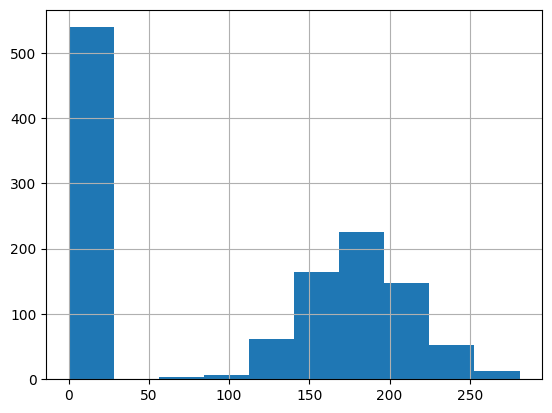

In [30]:
all_sum.hist();

The giant column of zeroes is non-useful data and there might be some very small columns next to it (with values only slightly above 0) that we can't even see which also wouldn't be useful since the samples would not have a sufficient number of signals marked for a proper report

In [31]:
all_sum.sort_values().describe()

count    1211.000000
mean      100.519405
std        93.069131
min         0.000000
25%         0.000000
50%       139.000000
75%       183.000000
max       281.000000
dtype: float64

We can certainly get rid of all rows that sum to zero, then we can use the head function to investigate where any jumps to realistic report signal totals occur

In [32]:
all_df = all_df[all_sum > 0]
all_df.shape

(718, 82)

That alone wiped out 493 rows, so let's remake the sum of rows to find the cutoff point that we're going to use

In [33]:
all_num = all_df.select_dtypes(include='number')
all_sum = all_num.sum(axis=1)

all_sum.sort_values().head(30)

1208    1.0
1204    1.0
1203    2.0
1202    2.0
1200    2.0
897     3.0
737     3.0
738     3.0
764     3.0
792     3.0
797     3.0
799     3.0
804     3.0
824     3.0
833     3.0
848     3.0
893     3.0
886     3.0
721     3.0
907     3.0
908     3.0
919     3.0
921     3.0
927     3.0
928     3.0
930     3.0
885     3.0
991     3.0
715     3.0
528     3.0
dtype: float64

That's at least 30 values that are still too low to constitute a serious report, which is kind of strange. We'll have to look at the hist again

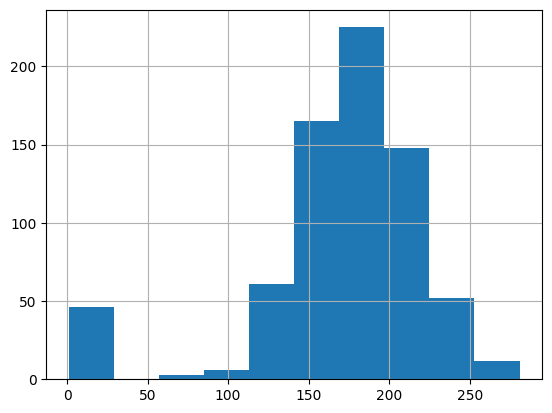

In [34]:
all_sum.hist();

It looks like we can safely consider anything below 50 as non-useful data, because it is so beneath the norm for a Vultology report signal total as to be completely outside the primary distribution and thus such samples won't reflect any norms or general conclusions in the data. Let's examine the values below 50 and the values above 50 to get a closer look at the cutoff

In [35]:
all_sum[all_sum <= 50].sort_values()

1204    1.0
1208    1.0
1203    2.0
1202    2.0
1200    2.0
487     3.0
848     3.0
885     3.0
886     3.0
893     3.0
897     3.0
907     3.0
921     3.0
919     3.0
927     3.0
928     3.0
930     3.0
991     3.0
908     3.0
824     3.0
833     3.0
799     3.0
505     3.0
507     3.0
517     3.0
528     3.0
564     3.0
577     3.0
804     3.0
603     3.0
604     3.0
578     3.0
639     3.0
715     3.0
721     3.0
737     3.0
738     3.0
764     3.0
792     3.0
797     3.0
630     3.0
1205    5.0
1201    8.0
1207    8.0
1209    8.0
1206    9.0
dtype: float64

Not only are these below 50, they are far below, which further supports the idea that they should not be included.

In [36]:
all_sum[all_sum > 50].sort_values().head(30)

1128     74.0
435      78.0
1115     83.0
1099     90.0
1023     93.0
1152     95.0
1154     97.0
1189    100.0
1101    103.0
459     113.0
1110    113.0
175     114.0
1089    115.0
209     116.0
1192    116.0
277     117.0
373     118.0
464     118.0
1113    119.0
1061    122.0
265     124.0
414     125.0
369     125.0
379     126.0
376     127.0
70      127.0
1024    127.0
427     129.0
384     130.0
444     130.0
dtype: float64

These are all far above 50 and follow a pretty continuous, predictable distribution, so I believe that these values fall within a sufficiently normal range to use.

So we'll just get rid of everything under 50 and add sum of signals as a column to the dataframe so we can stay organized

In [37]:
all_df = all_df[all_sum > 50]
all_df.shape

(672, 82)

We just need to check for duplicates to make sure there isn't any funny business

In [38]:
all_df.duplicated().sum()

0

There are no duplicates

We are going to add a column for the sum of signals in the report so that we can investigate the distribution for the sum of signals as well

## Sum of Signals <a id='sum'></a>

In [39]:
all_num = all_df.select_dtypes(include='number')
all_df.loc[:, 'sum'] = all_num.sum(axis=1)
all_df.describe()

Fallen Affect  R1 Rigid Posture  R2 Face Centric  \
count     672.000000        672.000000       672.000000   
mean        0.909226          3.069940         3.025298   
std         1.096983          2.692849         2.617882   
min         0.000000          0.000000         0.000000   
25%         0.000000          0.000000         0.000000   
50%         0.000000          2.000000         2.000000   
75%         2.000000          4.000000         4.000000   
max         5.000000          7.000000         7.000000   

       R3 Punctuated Motions  R4 Vertical Movements  R5 Subordinate Fluidity  \
count             672.000000             672.000000               672.000000   
mean                3.142857               3.235119                 1.858631   
std                 2.255077               2.276967                 2.489791   
min                 0.000000               0.000000                 0.000000   
25%                 2.000000               2.000000                 0.000000   
50%                 2.000000               4.000000                 0.000000   
75%                 4.000000               4.000000                 4.000000   
max                 7.000000               7.000000                 7.000000   

       F1 Fluid Posture  F2 Eye Centric  F3 Gliding Motions  \
count        672.000000      672.000000          672.000000   
mean           3.373512        3.400298            3.230655   
std            2.522403        2.638509            2.160218   
min            0.000000        0.000000            0.000000   
25%            2.000000        2.000000            2.000000   
50%            4.000000        4.000000            4.000000   
75%            4.000000        7.000000            4.000000   
max            7.000000        7.000000            7.000000   

       F4 Horizontal Movements  ...  SU6 Eye Head Trailing Motions  \
count               672.000000  ...                     672.000000   
mean                  3.599702  ...                       0.936012   
std                   2.310257  ...                       1.501241   
min                   0.000000  ...                       0.000000   
25%                   2.000000  ...                       0.000000   
50%                   4.000000  ...                       0.000000   
75%                   4.000000  ...                       2.000000   
max                   7.000000  ...                       7.000000   

       SU7 Levity Effect  SU8 Quirky Skits  EU1 Responsive Nodding  \
count         672.000000        672.000000              672.000000   
mean            1.523810          0.986607                2.236607   
std             2.044082          1.821743                2.010175   
min             0.000000          0.000000                0.000000   
25%             0.000000          0.000000                0.000000   
50%             0.000000          0.000000                2.000000   
75%             2.000000          2.000000                4.000000   
max             7.000000          7.000000                7.000000   

       EU2 Polite Smiling  EU3 Bashful Body Movements  \
count          672.000000                  672.000000   
mean             2.947917                    1.552083   
std              2.200521                    2.014914   
min              0.000000                    0.000000   
25%              2.000000                    0.000000   
50%              2.000000                    0.000000   
75%              4.000000                    2.000000   
max              7.000000                    7.000000   

       EG1 Upset Mouth Tension  EG2 Assertive Pushing  EG3 Stern Expressions  \
count               672.000000             672.000000             672.000000   
mean                  1.197917               1.714286               2.241071   
std                   1.700652               2.084340               2.130940   
min                   0.000000               0.000000               0.000000   
25%       

These numbers look more sensible but there are still a surprising amount with 0 values around the median of some signals, but that could just indicate a relatively rare signal. The most frequent signals marked is an interesting topic in itself

In [40]:
all_df['sum'].describe()

count    672.000000
mean     180.915179
std       32.793037
min       74.000000
25%      159.000000
50%      179.500000
75%      203.000000
max      281.000000
Name: sum, dtype: float64

Those are the summary statistics for the number of signals marked in a vultology report, very interesting. The mean and the median are pretty close too which makes the distribution pretty balanced.

Let's check some visualizations using a combination of a histogram and kernel density estimation to get more sense of the distribution:

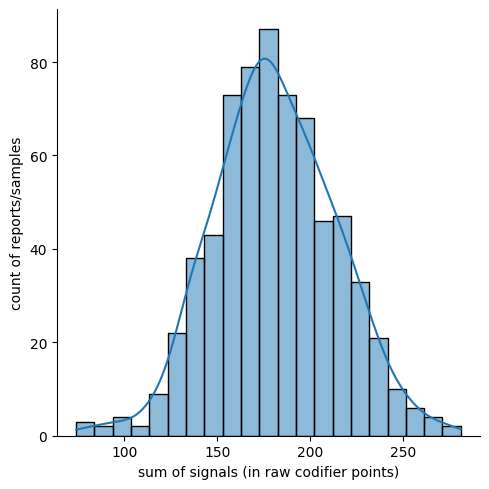

In [41]:
sns.displot(all_df, x='sum', kde=True)
plt.xlabel("sum of signals (in raw codifier points)")
plt.ylabel("count of reports/samples");

It looks pretty close to normal, so let's see if there are any statistically significant differences between this distribution and a normal distribution, using bootstrapping to get different possible estimates of the parameters:

In [42]:
dfit = distfit(n_boots=100)
results = dfit.fit_transform(all_df['sum'])
dfit.summary[['name', 'score', 'bootstrap_score', 'bootstrap_pass']]

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.13 sec] [RSS: 1.12664e-05] [loc=180.915 scale=32.769]
[distfit] >INFO> [expon     ] [0.12 sec] [RSS: 0.000621133] [loc=74.000 scale=106.915]
[distfit] >INFO> [pareto    ] [0.25 sec] [RSS: 0.000621133] [loc=-34359738294.000 scale=34359738368.000]
[distfit] >INFO> [dweibull  ] [1.37 sec] [RSS: 1.86686e-05] [loc=180.574 scale=27.938]
[distfit] >INFO> [t         ] [11.0 sec] [RSS: 1.11786e-05] [loc=180.865 scale=32.637]
[distfit] >INFO> [genextreme] [13.8 sec] [RSS: 1.03034e-05] [loc=168.934 scale=32.689]
[distfit] >INFO> [gamma     ] [3.58 sec] [RSS: 1.0583e-05] [loc=-2001.040 scale=0.492]
[distfit] >INFO> [lognorm   ] [0.34 sec] [RSS: 1.06061e-05] [loc=-3220.216 scale=3400.973]
[distfit] >INFO> [beta      ] [3.52 sec] [RSS: 1.03353e-05] [loc=-1376.603 scale=3040868.005]
[distfit] >INFO> [uniform   ] [0.11 sec] [RSS: 0.000398611] [loc=74.000 scale=207.000]
[distfit] >INFO> [loggamma  ] [3.54 sec] [RSS: 1.1918

name     score bootstrap_score bootstrap_pass
0   genextreme   0.00001            0.49           True
1        gamma  0.000011             0.3           True
2     dweibull  0.000019             0.3           True
3      lognorm  0.000011            0.24           True
4            t  0.000011            0.16           True
5         norm  0.000011            0.16           True
6         beta   0.00001            0.15           True
7     loggamma  0.000012            0.13           True
8      uniform  0.000399             0.0          False
9       pareto  0.000621             0.0          False
10       expon  0.000621             0.0          False

[distfit] >INFO> Ploting Summary.
[distfit] >INFO> Bootstrap results are included..


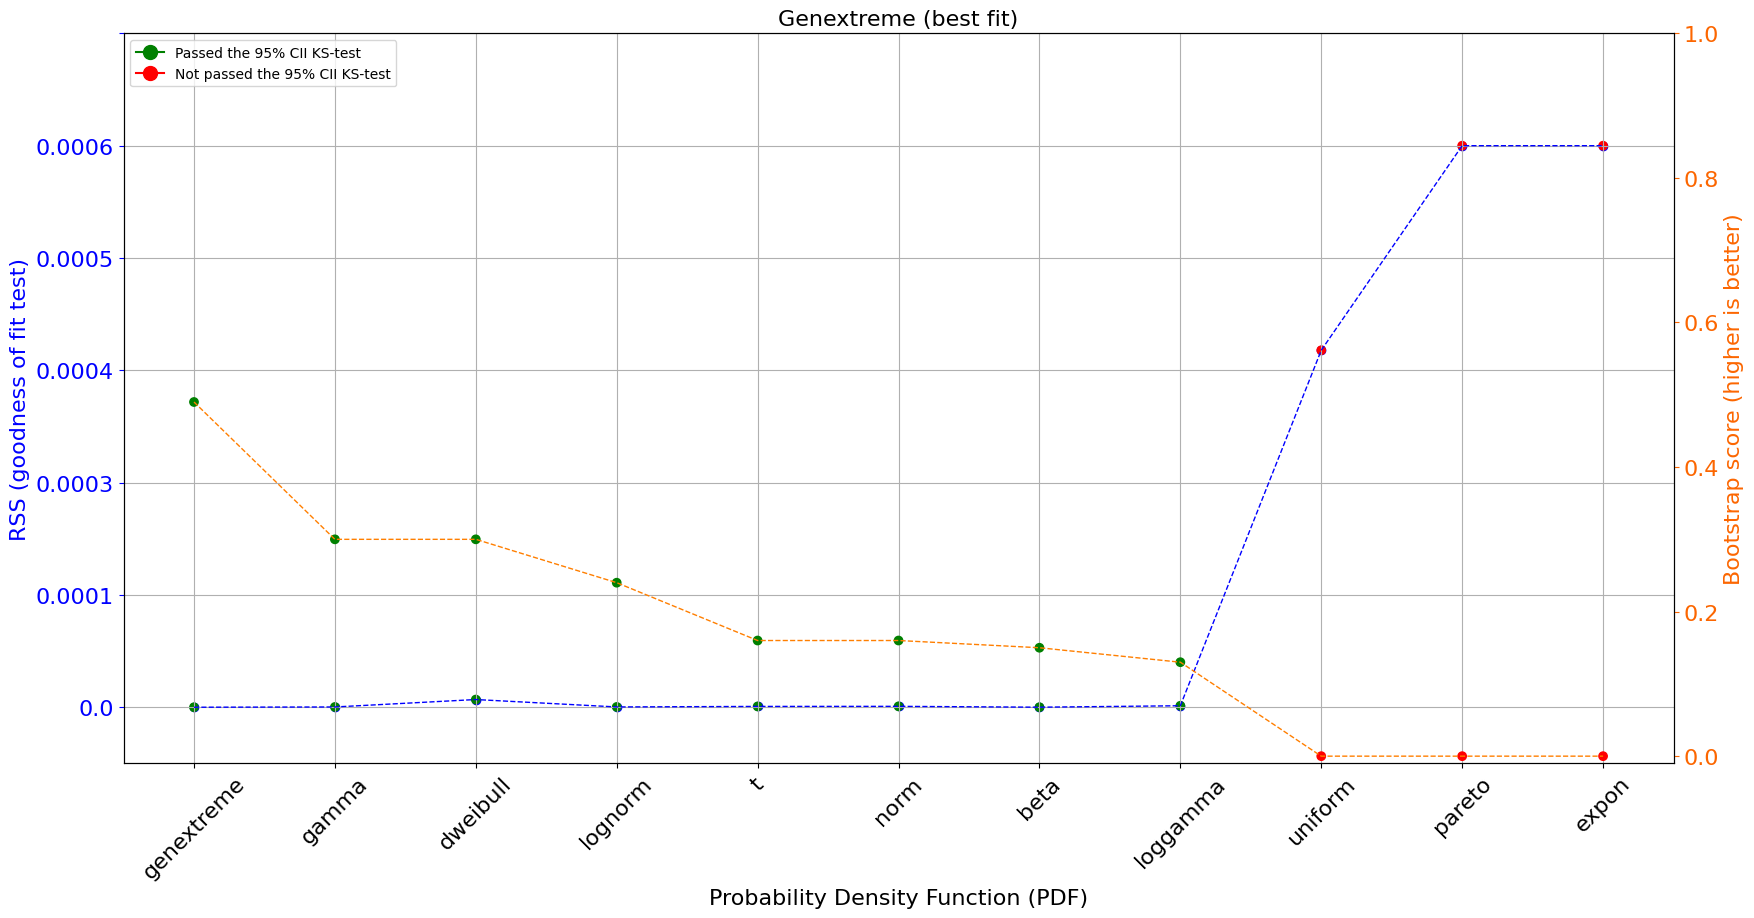

In [43]:
dfit.plot_summary();

Let's also determine more of the properties of the distribution so that we can better understand it's characteristics and best fits:

In [44]:
all_df['sum'].skew(), all_df['sum'].kurtosis()

(0.03094992034450804, 0.11506639126742702)

So it's somewhat close to normally distributed (the normal distribution passes the kolmogorov-smirnov test), but there is a bit of right skew for this distribution and a bit of excess kurtosis so the tails are a bit heavier than for a normal distribution, leading to some other distributions possibly fitting better for certain parameters (like genextreme, t, etc.). A lot of these distributions can approximate one another with certain parameters values. It's close enough that we don't have to choose one for now, and we can choose a distribution that makes sense if we need to for modeling purposes.

Let's look at the vultology signals with the highest and lowest means

## Means of Signals <a id='means'></a>

In [45]:
all_means = all_df.drop(['sum', 'Fallen Affect'], axis=1).describe().loc['mean', :]
all_means.describe()

count    70.000000
mean      2.571514
std       0.772490
min       0.936012
25%       2.023810
50%       2.597470
75%       3.186384
max       4.291667
Name: mean, dtype: float64

This is also a very believable and balanced distribution with close mean and median.

The 10 least marked vultology signals are:

In [46]:
all_means.sort_values().head(10)

SU6 Eye Head Trailing Motions    0.936012
SU8 Quirky Skits                 0.986607
CA9 Grasping Hands               1.093750
EG1 Upset Mouth Tension          1.197917
MS9 Puppeteer Hands              1.363095
CA8 Nasal Breathy Voice          1.502976
CA5 Asymmetrical Smirks          1.514881
SU7 Levity Effect                1.523810
EU3 Bashful Body Movements       1.552083
EG2 Assertive Pushing            1.714286
Name: mean, dtype: float64

In general some of the Ne/Si signals seem rare or difficult to understand, so them being so low is interesting and believable in a sense

The top 10 most marked vultology signals:

In [47]:
all_means.sort_values(ascending=False).head(10)

PR5 Projecting Hands       4.291667
PF2 Toggling Eyes          3.950893
PR4 Fluent Articulation    3.875000
PR1 Head Pushes            3.690476
PF4 Casual Hands           3.610119
F4 Horizontal Movements    3.599702
GR3 Taut Outer Edges       3.589286
PF3 Body Swaying           3.535714
RR5 Meticulous Hands       3.492560
PR2 Head Shakes            3.407738
Name: mean, dtype: float64

A lot of these signals are things that most people do (project their hands some, talk and articulate, look around, etc.), or are very distinctive like taut outer edges. That definitely makes sense but I wonder if a future version of the codifier will add greater nuance to these signals to distinguish them for ordinary behavior, if that's even necessary

Let's visualize again:

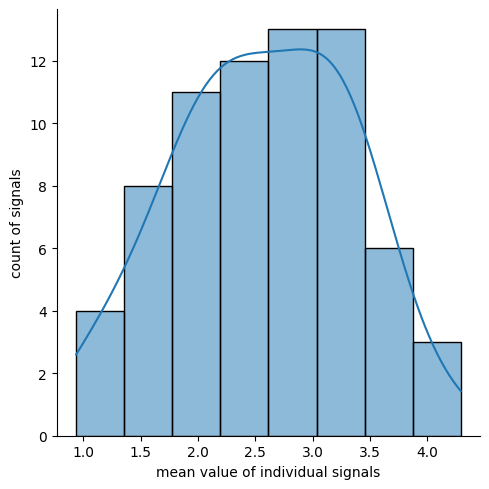

In [48]:
sns.displot(all_means.to_frame(), x='mean', kde=True)
plt.xlabel("mean value of individual signals")
plt.ylabel("count of signals");

Let's check the characteristics of the distribution again:

In [49]:
all_means.skew(), all_means.kurtosis()

(-0.1239949758420847, -0.6234184262667641)

This is slightly left tailed and platykurtic, but again likely be a small amount that isn't particularly statistically significant:

In [50]:
dfit = distfit(n_boots=100)
results = dfit.fit_transform(all_means)
dfit.summary[['name', 'score', 'bootstrap_score', 'bootstrap_pass']]

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.13 sec] [RSS: 0.0259752] [loc=2.572 scale=0.767]
[distfit] >INFO> [expon     ] [0.13 sec] [RSS: 0.366878] [loc=0.936 scale=1.636]
[distfit] >INFO> [pareto    ] [0.21 sec] [RSS: 0.366878] [loc=-268435455.064 scale=268435456.000]
[distfit] >INFO> [dweibull  ] [0.84 sec] [RSS: 0.122833] [loc=2.416 scale=0.724]
[distfit] >INFO> [t         ] [7.10 sec] [RSS: 0.0259752] [loc=2.572 scale=0.767]
[distfit] >INFO> [genextreme] [2.97 sec] [RSS: 0.0166328] [loc=2.320 scale=0.784]
[distfit] >INFO> [gamma     ] [2.90 sec] [RSS: 0.027651] [loc=-16.599 scale=0.031]
[distfit] >INFO> [lognorm   ] [0.53 sec] [RSS: 0.0259755] [loc=-131071.064 scale=131073.635]
[distfit] >INFO> [beta      ] [1.79 sec] [RSS: 0.00880312] [loc=0.583 scale=3.920]
[distfit] >INFO> [uniform   ] [0.17 sec] [RSS: 0.133971] [loc=0.936 scale=3.356]
[distfit] >INFO> [loggamma  ] [2.09 sec] [RSS: 0.0236816] [loc=-11.511 scale=4.164]
[distfit] >INFO> [norm

name     score bootstrap_score bootstrap_pass
0         beta  0.008803            0.68           True
1   genextreme  0.016633             0.6           True
2     loggamma  0.023682            0.45           True
3         norm  0.025975            0.29           True
4            t  0.025975            0.26           True
5      lognorm  0.025976            0.24           True
6        gamma  0.027651            0.17           True
7      uniform  0.133971            0.06           True
8     dweibull  0.122833            0.04          False
9       pareto  0.366878             0.0          False
10       expon  0.366878             0.0          False

[distfit] >INFO> Ploting Summary.
[distfit] >INFO> Bootstrap results are included..


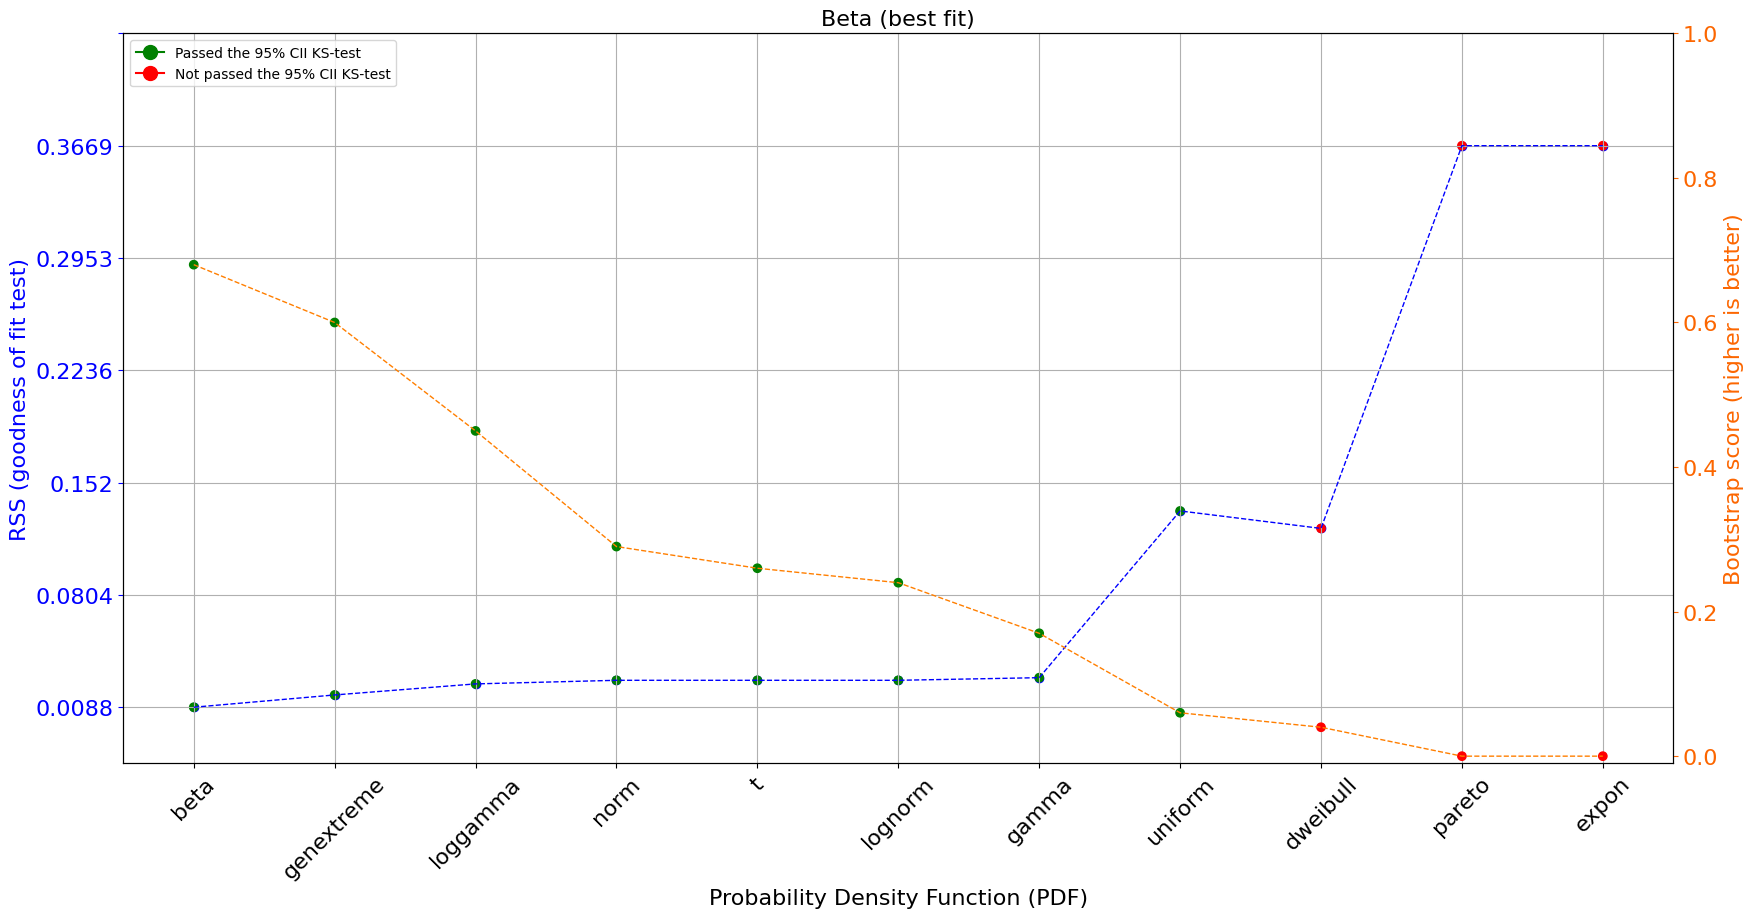

In [51]:
dfit.plot_summary();

In a way this isn't doing as well as the sums based on the RSS (Residual Sum of Squares) scores, but in terms of distribution fit it seems to be a similar story, where it's close enough to normal or something that can approximate normal that statistically it's not realistic to tell them apart definitively.

Let's also look at std

## Standard Deviations of Signals <a id='std'></a>

In [52]:
all_std = all_df.drop(['sum', 'Fallen Affect'], axis=1).describe().loc['std', :]
all_std.describe()

count    70.000000
mean      2.306475
std       0.287220
min       1.501241
25%       2.164291
50%       2.308938
75%       2.511009
max       2.889009
Name: std, dtype: float64

Also a typically balanced distribution

Bottom 10 (so most unvarying signals)

In [53]:
all_std.sort_values().head(10)

SU6 Eye Head Trailing Motions    1.501241
PR3 Shoulder Shrugs              1.673406
EG1 Upset Mouth Tension          1.700652
CA9 Grasping Hands               1.779622
RR4 Momentum Halting             1.800723
SU8 Quirky Skits                 1.821743
MS9 Puppeteer Hands              1.844719
RR3 Exerted Pushes               1.879930
CA5 Asymmetrical Smirks          1.920883
RF4 Searching Scowling           1.975221
Name: std, dtype: float64

Interestingly, it's a lot of the same one's that had low means, so in having low values they probably have less chance to vary

In [54]:
all_std.sort_values(ascending=False).head(10)

MS2 Horizontal Curtain Smiles    2.889009
GR3 Taut Outer Edges             2.820154
MS3 Two Point Pulling            2.721188
R1 Rigid Posture                 2.692849
MS8 Laryngeal Faint Voice        2.677346
GR1 Taut Preseptal Area          2.675684
F2 Eye Centric                   2.638509
MS7 Parabolic Velocity           2.637278
F5 Subordinate Rigidity          2.625019
R2 Face Centric                  2.617882
Name: std, dtype: float64

So since these signals vary a lot, I would look at it as them being more like "you have it or you don't" (since there would be a less populated grey area between extreme values), which makes sense for things like the tautness of eye areas and having a Measured smile and/or face, middling cases are rarer. Measured does seem particulary strong in this regard though, which is noteworthy.

Some visualization:

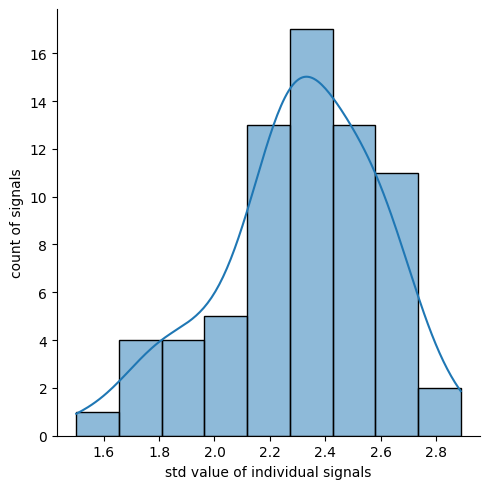

In [55]:
sns.displot(all_std.to_frame(), x='std', kde=True)
plt.xlabel("std value of individual signals")
plt.ylabel("count of signals");

In [56]:
all_std.skew(), all_std.kurtosis()

(-0.5583239536986977, 0.14858365808975016)

In [57]:
dfit = distfit(n_boots=100)
results = dfit.fit_transform(all_std)
dfit.summary[['name', 'score', 'bootstrap_score', 'bootstrap_pass']]

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.12 sec] [RSS: 0.442734] [loc=2.306 scale=0.285]
[distfit] >INFO> [expon     ] [0.15 sec] [RSS: 4.58662] [loc=1.501 scale=0.805]
[distfit] >INFO> [pareto    ] [0.21 sec] [RSS: 4.58662] [loc=-67108862.499 scale=67108864.000]
[distfit] >INFO> [dweibull  ] [0.91 sec] [RSS: 0.373949] [loc=2.331 scale=0.238]
[distfit] >INFO> [t         ] [7.04 sec] [RSS: 0.425035] [loc=2.309 scale=0.280]
[distfit] >INFO> [genextreme] [2.71 sec] [RSS: 0.264733] [loc=2.225 scale=0.304]
[distfit] >INFO> [gamma     ] [2.59 sec] [RSS: 0.508305] [loc=-3.477 scale=0.014]
[distfit] >INFO> [lognorm   ] [0.23 sec] [RSS: 0.442767] [loc=-16382.499 scale=16384.805]
[distfit] >INFO> [beta      ] [2.77 sec] [RSS: 0.209022] [loc=-2.028 scale=5.159]
[distfit] >INFO> [uniform   ] [0.16 sec] [RSS: 2.27935] [loc=1.501 scale=1.388]
[distfit] >INFO> [loggamma  ] [1.24 sec] [RSS: 0.200871] [loc=1.987 scale=0.421]
[distfit] >INFO> [norm      ] [18.1 se

name     score bootstrap_score bootstrap_pass
0     dweibull  0.373949            0.83           True
1         beta  0.209022             0.8           True
2     loggamma  0.200871            0.66           True
3   genextreme  0.264733            0.49           True
4            t  0.425035            0.22           True
5         norm  0.442734            0.16           True
6      lognorm  0.442767            0.15           True
7        gamma  0.508305            0.06           True
8      uniform  2.279348             0.0          False
9        expon  4.586619             0.0          False
10      pareto  4.586619             0.0          False

[distfit] >INFO> Ploting Summary.
[distfit] >INFO> Bootstrap results are included..


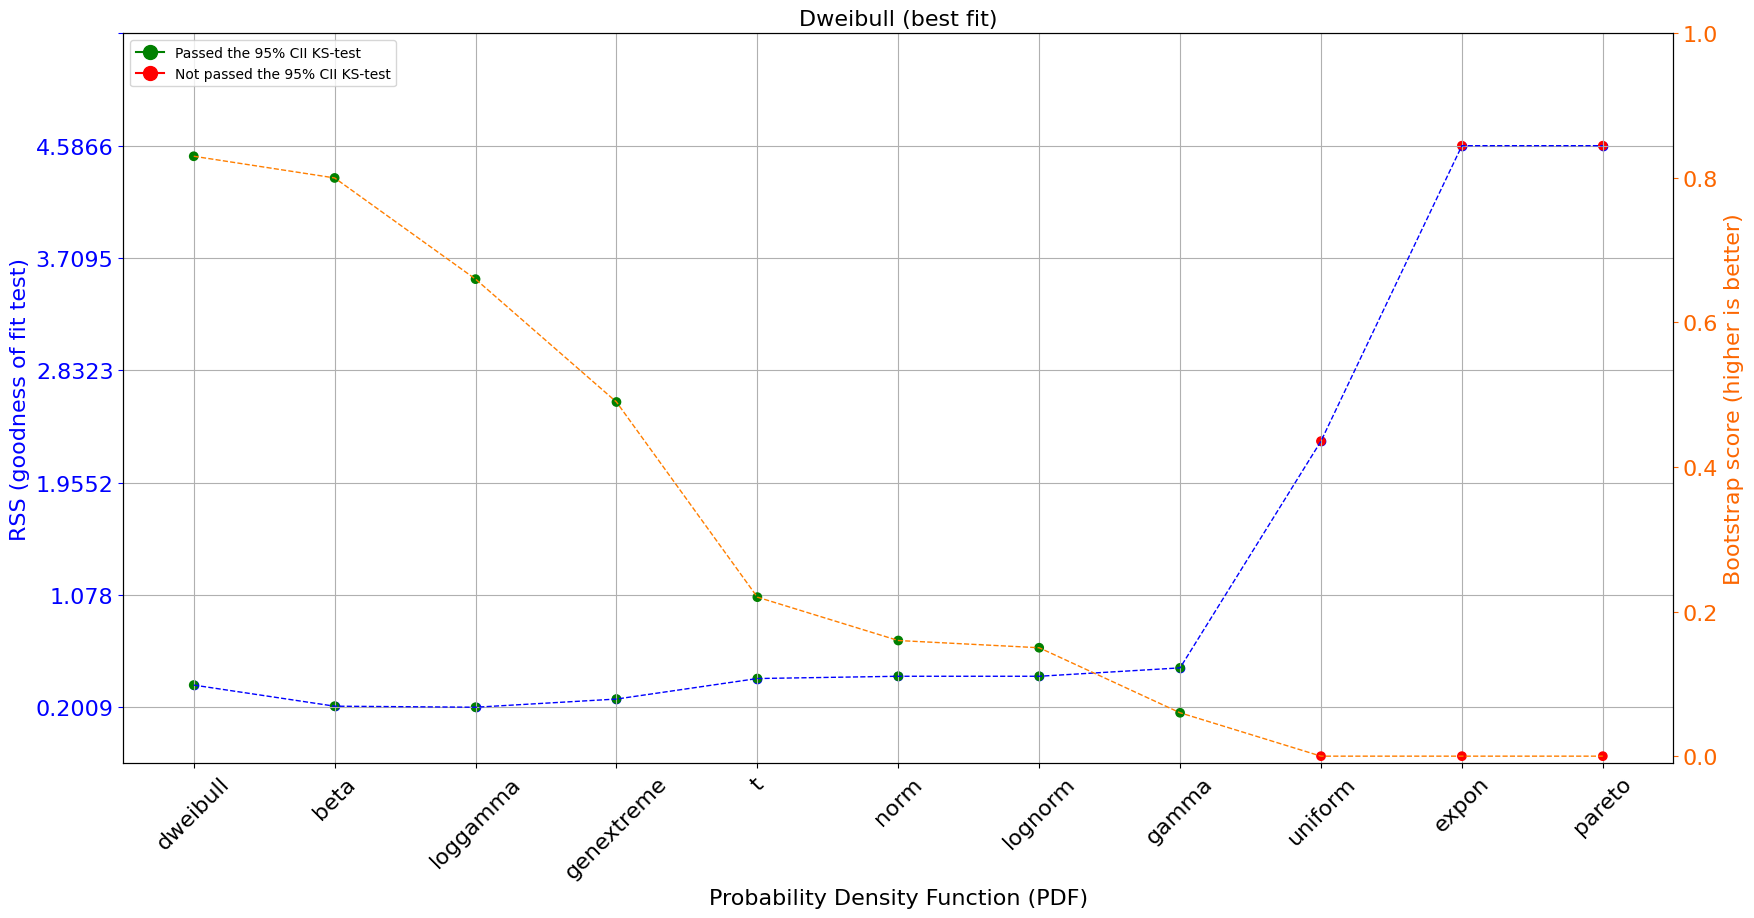

In [58]:
dfit.plot_summary();

Std is more notably left-tailed than any distribution we've seen so far, thus signals with high and low std may be even more noteworthy, and while it's still close enough to a skewed normal distribution, other distributions like a Beta distribution (which has consistently performed well) might be better for modeling this subject matter (perhaps because vultology signals are inherently bounded between certain values and thus signal values and sums represent a kind of proportion of what is possible)

dweibull also often does pretty well but doesn't make sense in this context because it has two peaks, and genextreme often does pretty well but also doesn't make sense for our context because we aren't focused on primarily extreme values (gev's are just good at approximating a number of distributions due to their flexibility with their k parameters which ranges over several types and shapes of distributions)

There are other columns of data that would be important to have and know the distributions of, which can be dealt with by the following tasks:
- create a column for quadra
- create a column for lead energetic
- look at the distribution of each group of signals to see if there are any patterns

Not to mention some other tasks we previously set:
- Recalculate Emotions based on signal values to make sure the number of neutral samples is correct
- Recalculate signal mixing as a number between 0 and 1, 1 being right in the middle, 0 being on the farthest possible edge
- And we can of course look at the distribution of those as well, along with that of every other signal

Before we calculate the scores needed to create these columns, we will reset the index of signals_df to make it a uniform RangeIndex so that it's easier to iterate through

In [59]:
all_df.reset_index(drop=True, inplace=True)
all_df.index

RangeIndex(start=0, stop=672, step=1)

## Lead Energetic <a id='Energetic'></a>

In [60]:
Lead_Energetic = []

for i in range(len(all_df)):
    ctype = all_df['Type'][i]
    if ctype in ('fesi', 'feni', 'teni', 'tesi'):
        Lead_Energetic.append('Je')
    elif ctype in ('sife', 'nife', 'nite', 'site'):
        Lead_Energetic.append('Pi')
    elif ctype in ('neti', 'seti', 'sefi', 'nefi'):
        Lead_Energetic.append('Pe')
    elif ctype in ('tine', 'tise', 'fise', 'fine'):
        Lead_Energetic.append('Ji')

LE_series = pd.Series(Lead_Energetic)
LE_series.head()

0    Je
1    Ji
2    Je
3    Ji
4    Je
dtype: object

In [61]:
LE_counts = LE_series.value_counts().to_frame()
LE_counts['percent'] = (100 * LE_counts['count'] / len(LE_series)).round(2)
LE_counts

count  percent
Pe    230    34.23
Je    178    26.49
Pi    141    20.98
Ji    123    18.30

Yet again, all energetics have a pretty healthy sample size, but the data is significantly skewed in favor of extroverts, which makes sense since they are obviously more common amongst celebrities

Let's visualize using box plots:

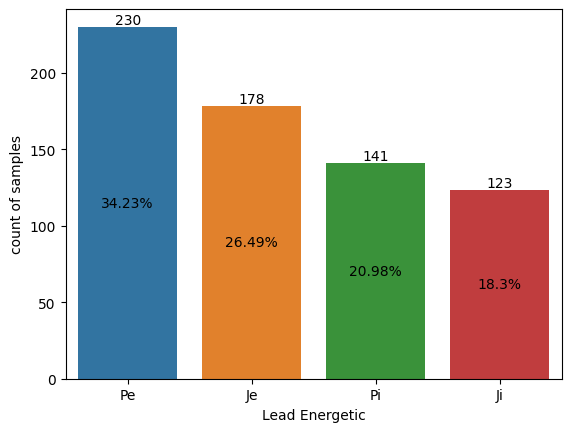

In [62]:
LE_counts.reset_index(inplace=True)
ax = sns.barplot(LE_counts, x='index', y='count', hue='index')
for i in range(len(LE_counts)):
    ax.bar_label(ax.containers[i], fontsize=10)
    ax.bar_label(ax.containers[i], fontsize=10, label_type='center', labels=[str(LE_counts.loc[i, 'percent'])+'%'])
plt.xlabel("Lead Energetic")
plt.ylabel("count of samples");

In [63]:
all_df['Lead Energetic'] = LE_series
all_df.head()

Sample Name      Vultologist  Type Development  \
0                  Janina Ramirez  Sierra Schwartz  tesi        i-i-   
1                   Zeena Schreck  Sierra Schwartz  fise        i-i-   
2  Sandra Lee "Dr. Pimple Popper"  Sierra Schwartz  teni        i-i-   
3                     Johnny Depp         Ash Rose  tise        iii-   
4                Pierre Poilievre        Peter Foy  tesi        ii--   

    Emotions  Fallen Affect J Signal Mixing P Signal Mixing     Sex Age Range  \
0  unguarded            0.0             low             low  female     1980s   
1    guarded            3.0            high             low  female     1960s   
2  unguarded            0.0             low             low  female     1970s   
3    neutral            2.0             low             low    male     1960s   
4    guarded            1.0             low          medium    male     1970s   

   ... SU7 Levity Effect SU8 Quirky Skits  EU1 Responsive Nodding  \
0  ...               4.0              2.0                     4.0   
1  ...               0.0              2.0                     2.0   
2  ...               0.0              0.0                     4.0   
3  ...               0.0              2.0                     4.0   
4  ...               0.0              0.0                     2.0   

   EU2 Polite Smiling  EU3 Bashful Body Movements  EG1 Upset Mouth Tension  \
0                 4.0                         2.0                      0.0   
1                 2.0                         0.0                      2.0   
2                 7.0                         2.0                      2.0   
3                 4.0                         2.0                      4.0   
4                 2.0                         0.0                      4.0   

   EG2 Assertive Pushing  EG3 Stern Expressions    sum  Lead Energetic  
0                    2.0                    0.0  177.0              Je  
1                    2.0                    2.0  188.0              Ji  
2                    2.0                    0.0  195.0              Je  
3                    0.0                    2.0  208.0              Ji  
4                    7.0                    2.0  196.0              Je  

[5 rows x 84 columns]

## Quadra <a id='Quadra'></a>

In [64]:
Quadra = []

for i in range(len(all_df)):
    ctype = all_df['Type'][i]
    if ctype in ('fesi', 'sife', 'neti', 'tine'):
        Quadra.append('Alpha')
    elif ctype in ('feni', 'nife', 'seti', 'tise'):
        Quadra.append('Beta')
    elif ctype in ('teni', 'nite', 'sefi', 'fise'):
        Quadra.append('Gamma')
    elif ctype in ('tesi', 'site', 'nefi', 'fine'):
        Quadra.append('Delta')

Quadra_series = pd.Series(Quadra)
Quadra_series.head()

0    Delta
1    Gamma
2    Gamma
3     Beta
4    Delta
dtype: object

In [65]:
Quadra_counts = Quadra_series.value_counts().to_frame()
Quadra_counts['percent'] = (100 * Quadra_counts['count'] / len(Quadra_series)).round(2)
Quadra_counts

count  percent
Beta     224    33.33
Gamma    175    26.04
Alpha    144    21.43
Delta    129    19.20

It seems to be that Grounded types are more plentiful in our data, perhaps because they are more common among celebrities. Though all quadras have a healthy sample size overall.

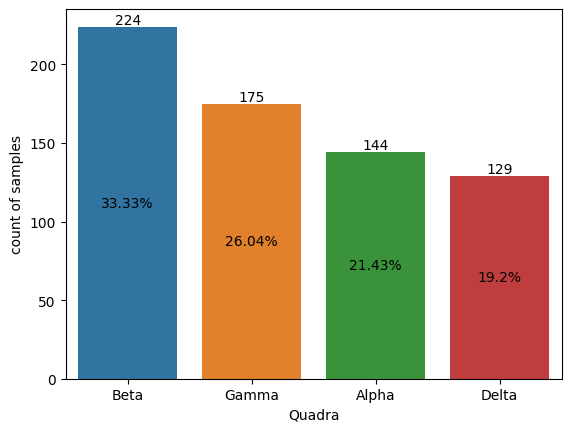

In [66]:
Quadra_counts.reset_index(inplace=True)
ax = sns.barplot(Quadra_counts, x='index', y='count', hue='index')
for i in range(len(Quadra_counts)):
    ax.bar_label(ax.containers[i], fontsize=10)
    ax.bar_label(ax.containers[i], fontsize=10, label_type='center', labels=[str(Quadra_counts.loc[i, 'percent'])+'%'])
plt.xlabel("Quadra")
plt.ylabel("count of samples");

In [67]:
all_df['Quadra'] = Quadra_series
all_df.head()

Sample Name      Vultologist  Type Development  \
0                  Janina Ramirez  Sierra Schwartz  tesi        i-i-   
1                   Zeena Schreck  Sierra Schwartz  fise        i-i-   
2  Sandra Lee "Dr. Pimple Popper"  Sierra Schwartz  teni        i-i-   
3                     Johnny Depp         Ash Rose  tise        iii-   
4                Pierre Poilievre        Peter Foy  tesi        ii--   

    Emotions  Fallen Affect J Signal Mixing P Signal Mixing     Sex Age Range  \
0  unguarded            0.0             low             low  female     1980s   
1    guarded            3.0            high             low  female     1960s   
2  unguarded            0.0             low             low  female     1970s   
3    neutral            2.0             low             low    male     1960s   
4    guarded            1.0             low          medium    male     1970s   

   ... SU8 Quirky Skits EU1 Responsive Nodding  EU2 Polite Smiling  \
0  ...              2.0                    4.0                 4.0   
1  ...              2.0                    2.0                 2.0   
2  ...              0.0                    4.0                 7.0   
3  ...              2.0                    4.0                 4.0   
4  ...              0.0                    2.0                 2.0   

   EU3 Bashful Body Movements  EG1 Upset Mouth Tension  EG2 Assertive Pushing  \
0                         2.0                      0.0                    2.0   
1                         0.0                      2.0                    2.0   
2                         2.0                      2.0                    2.0   
3                         2.0                      4.0                    0.0   
4                         0.0                      4.0                    7.0   

   EG3 Stern Expressions    sum  Lead Energetic  Quadra  
0                    0.0  177.0              Je   Delta  
1                    2.0  188.0              Ji   Gamma  
2                    0.0  195.0              Je   Gamma  
3                    2.0  208.0              Ji    Beta  
4                    2.0  196.0              Je   Delta  

[5 rows x 85 columns]

Now we can take a look at the distribution of types

## Type Distribution <a id='Type'></a>

In [68]:
Type_counts = all_df['Type'].value_counts().to_frame()
Type_counts['percent'] = (100 * Type_counts['count'] / len(all_df['Type'])).round(2)
Type_counts

count  percent
Type                
seti     86    12.80
sefi     59     8.78
feni     51     7.59
teni     50     7.44
nife     49     7.29
neti     46     6.85
fesi     44     6.55
nefi     39     5.80
tise     38     5.65
nite     35     5.21
tesi     33     4.91
fise     31     4.61
sife     31     4.61
fine     31     4.61
site     26     3.87
tine     23     3.42

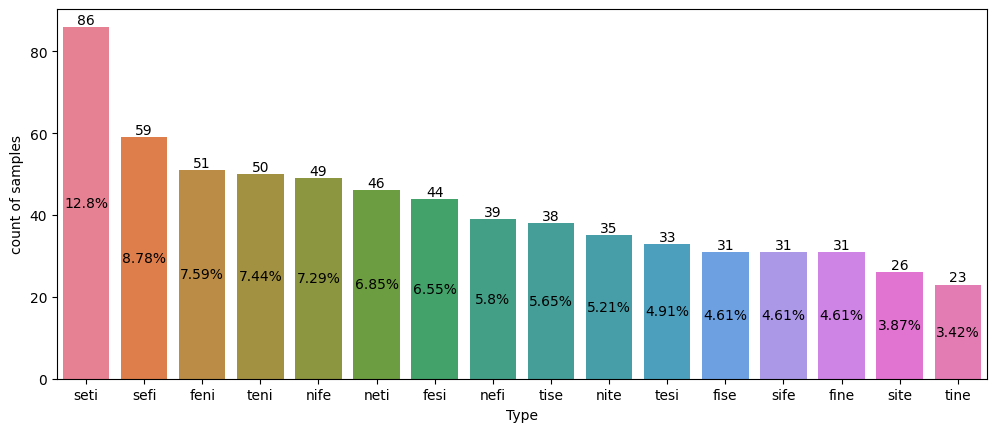

In [69]:
Type_counts.reset_index(inplace=True)
plt.figure(figsize=(12, 4.8))
ax = sns.barplot(Type_counts, x='Type', y='count', hue='Type')
for i in range(len(Type_counts)):
    ax.bar_label(ax.containers[i], fontsize=10)
    ax.bar_label(ax.containers[i], fontsize=10, label_type='center', labels=[str(Type_counts.loc[i, 'percent'])+'%'])
plt.xlabel("Type")
plt.ylabel("count of samples");

These distributions are pretty predictable from the above, but a few might be slightly more problematic, because two of the types (SiTe and TiNe) have less than 30 samples (though some are close to that). This is important because with a sample size of less than 30, certain statistical tests like ANOVA and t-tests can't be properly run since certain assumptions like the Central Limit Theorem don't properly apply. For some purposes, like just clustering our signals outright, I'm not sure precisely how much it matters, but more samples would obviously be good.

Now let's look at developments

## Developments <a id='Developments'></a>

In [70]:
Dev_counts = all_df['Development'].value_counts().to_frame()
Dev_counts['percent'] = (100 * Dev_counts['count'] / len(all_df['Development'])).round(2)
Dev_counts

count  percent
Development                
i---           190    28.27
i-i-           115    17.11
ii--           105    15.62
i--i            73    10.86
iii-            57     8.48
ii-i            53     7.89
i-ii            46     6.85
iiii            33     4.91

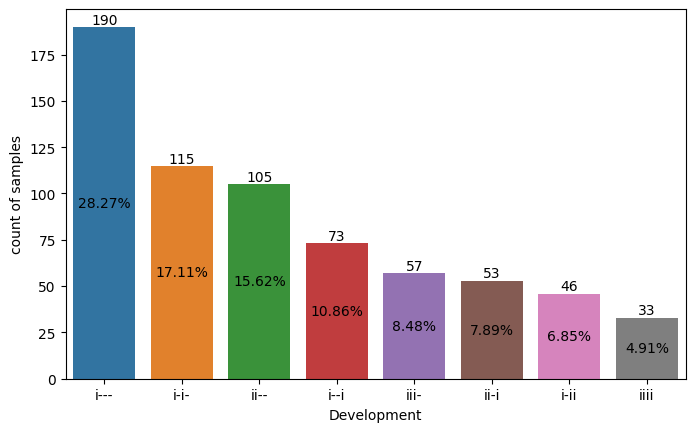

In [71]:
Dev_counts.reset_index(inplace=True)
plt.figure(figsize=(8, 4.8))
ax = sns.barplot(Dev_counts, x='Development', y='count', hue='Development')
for i in range(len(Dev_counts)):
    ax.bar_label(ax.containers[i], fontsize=10)
    ax.bar_label(ax.containers[i], fontsize=10, label_type='center', labels=[str(Dev_counts.loc[i, 'percent'])+'%'])
plt.xlabel("Development")
plt.ylabel("count of samples");

These are very sensible numbers, and they seem to confirm the polarity of the opposite energetics, because opposite energetics are the rarest to have integrated together. That being said, Grant stack assumptions are not necessarily confirmed, because having another function of the same vertness integrated is more common than having a function similar in conducting or revising. However, the preponderance of extroverts in this dataset combined with the fact that extroverted function integrations would seem to be more common for celebrities suggests that this data may not tell us which developments are necessarily more common (because the data is biased towards these more extroverted samples and it's not a random sample of the population).

We could even investigate this question by looking at which lead energetics most frequently have 'I-I-' development:

In [72]:
Dev13_counts = all_df[all_df['Development'] == 'i-i-']['Lead Energetic'].value_counts().to_frame()
Dev13_counts['percent'] = (100 * Dev13_counts['count'] / len(all_df[all_df['Development'] == 'i-i-'])).round(2)
Dev13_counts

count  percent
Lead Energetic                
Pe                 59    51.30
Je                 46    40.00
Pi                  6     5.22
Ji                  4     3.48

In [73]:
Dev12_counts = all_df[all_df['Development'] == 'ii--']['Lead Energetic'].value_counts().to_frame()
Dev12_counts['percent'] = (100 * Dev12_counts['count'] / len(all_df[all_df['Development'] == 'ii--'])).round(2)
Dev12_counts

count  percent
Lead Energetic                
Pi                 40    38.10
Ji                 27    25.71
Pe                 21    20.00
Je                 17    16.19

And this EXACTLY confirms what we thought: that Pe and Je have over 90% of 'I-I-' development cases, whereas introverts with this development are very rare among celebrities, which makes sense since they would be extra introverted. Thus the fact that 'I-I-' is more common in our data than 'II--' doesn't tell us much about what is more common in general, since the distribution for 'II--' is more balanced and even more common for introverts in our data because it would give them a more extroverted function integration, which also comports with our assumptions.

This is a case where we have an interaction of causal factors causing an appearance of something to be more common when it isn't: i-i- dev seems more common just because extroverts are more common to have that distribution in celebrity samples which comprise most of the data in this dataset.

Next let's examine emotional attidudes

## Emotional Attitudes <a id='Emotions'></a>

In [74]:
all_df['Emotions'].value_counts()

Emotions
unguarded    314
guarded      237
neutral      121
Name: count, dtype: int64

In [75]:
(100 * all_df['Emotions'].value_counts() / len(all_df['Emotions'])).round(2)

Emotions
unguarded    46.73
guarded      35.27
neutral      18.01
Name: count, dtype: float64

These are pretty healthy sample sizes, so they should not be too much of a problem for our data, but we could try to split our analyses on this attribute if we want to be extra cautious in checking (or use it to perform cross-sectional analysis)

We were previously concerned that the number of neutral samples may be incorrect in the data. This is possible because neutral is a relatively new concept in CT theory that older samples may not have been typed in accordance with, so we want to recalculate the number of neutral samples based on the direct values of the emotional attitude signals

In [76]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sample Name                    672 non-null    object 
 1   Vultologist                    672 non-null    object 
 2   Type                           672 non-null    object 
 3   Development                    672 non-null    object 
 4   Emotions                       672 non-null    object 
 5   Fallen Affect                  672 non-null    float64
 6   J Signal Mixing                455 non-null    object 
 7   P Signal Mixing                453 non-null    object 
 8   Sex                            672 non-null    object 
 9   Age Range                      672 non-null    object 
 10  Geography                      672 non-null    object 
 11  Ethnicity                      672 non-null    object 
 12  R1 Rigid Posture               672 non-null    flo

In [77]:
Emotions = []
Emotion_Values = []
Emotion_Diffs = []

for i in range(len(all_df)):
    EU = all_df.loc[i, 'EU1 Responsive Nodding':'EU3 Bashful Body Movements'].sum()
    EG = all_df.loc[i, 'EG1 Upset Mouth Tension':'EG3 Stern Expressions'].sum()
    EA = EG - EU
    Emotion_Diffs.append(EA)
    if abs(EA) < 5:
        Emotions.append('neutral')
    elif EU > EG:
        Emotions.append('unguarded')
    else:
        Emotions.append('guarded')
    if EU+EG == 0:
        Emotion_Values.append(0)
    else:
        Emotion_Values.append(EA/(EG+EU))

Emotion_series = pd.Series(Emotions)
Emotion_series.head()

0    unguarded
1      neutral
2    unguarded
3      neutral
4      guarded
dtype: object

In [78]:
Emotion_counts = Emotion_series.value_counts().to_frame()
Emotion_counts['percent'] = (100 * Emotion_counts['count'] / len(Emotion_series)).round(2)
Emotion_counts

count  percent
neutral      288    42.86
unguarded    235    34.97
guarded      149    22.17

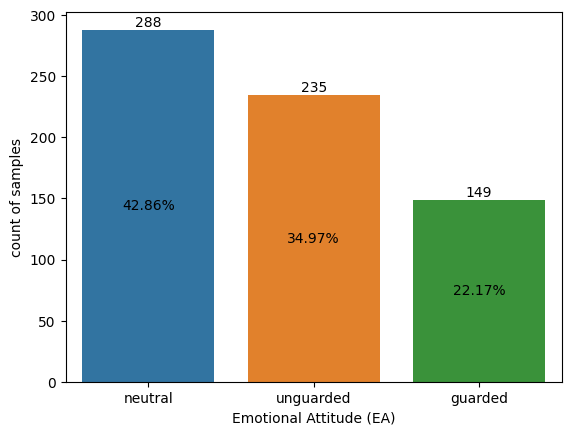

In [79]:
Emotion_counts.reset_index(inplace=True)
ax = sns.barplot(Emotion_counts, x='index', y='count', hue='index')
for i in range(len(Emotion_counts)):
    ax.bar_label(ax.containers[i], fontsize=10)
    ax.bar_label(ax.containers[i], fontsize=10, label_type='center', labels=[str(Emotion_counts.loc[i, 'percent'])+'%'])
plt.xlabel("Emotional Attitude (EA)")
plt.ylabel("count of samples");

It turns out that we were right to suspect that the number of neutral signals was incorrect, and now we have a much better estimation of the EA distribution. It's also noteworthy that EA is not a bimodal trait, but possibly unipolar and closer to normal, though that isn't clear yet either because the neutral samples could have subclusters.

In [80]:
all_df['Emotions'] = Emotion_series
all_df.head()

Sample Name      Vultologist  Type Development  \
0                  Janina Ramirez  Sierra Schwartz  tesi        i-i-   
1                   Zeena Schreck  Sierra Schwartz  fise        i-i-   
2  Sandra Lee "Dr. Pimple Popper"  Sierra Schwartz  teni        i-i-   
3                     Johnny Depp         Ash Rose  tise        iii-   
4                Pierre Poilievre        Peter Foy  tesi        ii--   

    Emotions  Fallen Affect J Signal Mixing P Signal Mixing     Sex Age Range  \
0  unguarded            0.0             low             low  female     1980s   
1    neutral            3.0            high             low  female     1960s   
2  unguarded            0.0             low             low  female     1970s   
3    neutral            2.0             low             low    male     1960s   
4    guarded            1.0             low          medium    male     1970s   

   ... SU8 Quirky Skits EU1 Responsive Nodding  EU2 Polite Smiling  \
0  ...              2.0                    4.0                 4.0   
1  ...              2.0                    2.0                 2.0   
2  ...              0.0                    4.0                 7.0   
3  ...              2.0                    4.0                 4.0   
4  ...              0.0                    2.0                 2.0   

   EU3 Bashful Body Movements  EG1 Upset Mouth Tension  EG2 Assertive Pushing  \
0                         2.0                      0.0                    2.0   
1                         0.0                      2.0                    2.0   
2                         2.0                      2.0                    2.0   
3                         2.0                      4.0                    0.0   
4                         0.0                      4.0                    7.0   

   EG3 Stern Expressions    sum  Lead Energetic  Quadra  
0                    0.0  177.0              Je   Delta  
1                    2.0  188.0              Ji   Gamma  
2                    0.0  195.0              Je   Gamma  
3                    2.0  208.0              Ji    Beta  
4                    2.0  196.0              Je   Delta  

[5 rows x 85 columns]

I'm also going to include a value for EA that ranges from -1 to 1 where -1 stands for unguarded and 1 stands for guarded, so we can see it as a roughly continuous value as well, using the Emotion_Values we collected, and another value for the raw difference between Unguarded and Guarded signals since the normalized value doesn't capture absolute differences well. We calculated these values for each sample above, and we will look at their distributions below:

In [81]:
Emotion_Val = pd.DataFrame(Emotion_Values)
Emotion_Val.head()

0
0 -0.666667
1  0.200000
2 -0.529412
3 -0.250000
4  0.529412

In [82]:
Emotion_Val.describe()

0
count  672.000000
mean    -0.130525
std      0.667142
min     -1.000000
25%     -0.719048
50%     -0.200000
75%      0.388462
max      1.000000

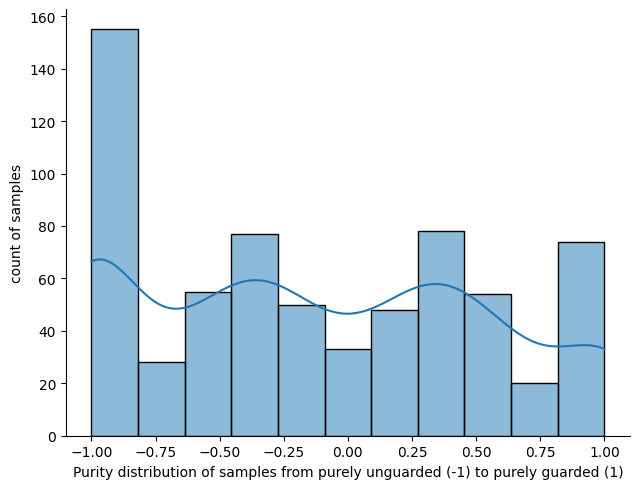

In [83]:
sns.displot(Emotion_Val, x=0, kde=True, aspect=1.3)
plt.xlabel("Purity distribution of samples from purely unguarded (-1) to purely guarded (1)")
plt.ylabel("count of samples");

The KDE and Histogram are capturing several different peaks in the amount of Emotional Attitude purity/mixing, though KDE doesn't match the histogram very closely so I might try tampering with it a bit to get a better figure to show the curve and peaks better:

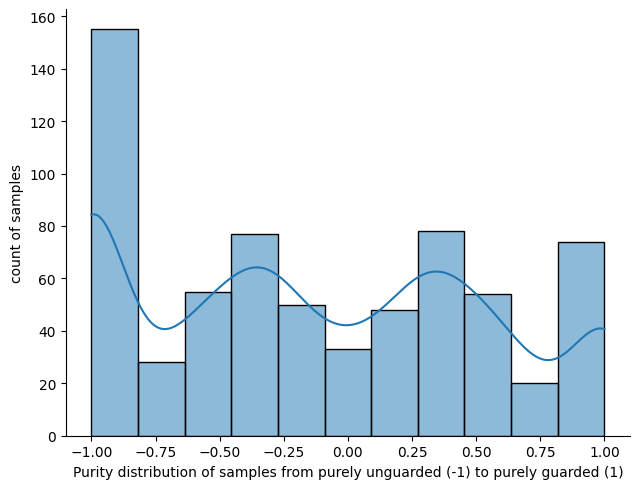

In [84]:
sns.displot(Emotion_Val, x=0, kde=True, kde_kws={'bw_adjust': 0.75}, aspect=1.3)
plt.xlabel("Purity distribution of samples from purely unguarded (-1) to purely guarded (1)")
plt.ylabel("count of samples");

It's still far from ideal (scipy does not have great and easily usable bandwidth for KDE for non-normal distributions), but I think the point about how this distribution is structured (combined with the histograms) is clear enough

EA seems to be a multimodal distribution, and might lend itself to a 4 part typology (mostly purely guarded, guarded but mixed with unguarded, unguarded but mixed with guarded, and mostly purely unguarded), not considering the magnitude of difference between guarded and unguarded (which we'll consider next)

In [85]:
dfit = distfit(n_boots=100)
results = dfit.fit_transform(Emotion_Val[0])
dfit.summary[['name', 'score', 'bootstrap_score', 'bootstrap_pass']]

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.12 sec] [RSS: 1.35902] [loc=-0.131 scale=0.667]
[distfit] >INFO> [expon     ] [0.12 sec] [RSS: 0.955785] [loc=-1.000 scale=0.869]
[distfit] >INFO> [pareto    ] [0.21 sec] [RSS: 1.53095] [loc=-1.018 scale=0.018]
[distfit] >INFO> [dweibull  ] [1.18 sec] [RSS: 1.16467] [loc=-0.078 scale=0.654]
[distfit] >INFO> [t         ] [9.44 sec] [RSS: 1.35902] [loc=-0.131 scale=0.667]
[distfit] >INFO> [genextreme] [4.51 sec] [RSS: 1.32481] [loc=-0.371 scale=0.640]
[distfit] >INFO> [gamma     ] [1.22 sec] [RSS: 1.29695] [loc=-2.220 scale=0.213]
[distfit] >INFO> [lognorm   ] [3.59 sec] [RSS: 1.29315] [loc=-2.809 scale=2.594]
[distfit] >INFO> [beta      ] [5.67 sec] [RSS: 0.810187] [loc=-1.000 scale=2.117]
[distfit] >INFO> [uniform   ] [0.11 sec] [RSS: 0.902904] [loc=-1.000 scale=2.000]
[distfit] >INFO> [loggamma  ] [3.64 sec] [RSS: 1.36239] [loc=-141.994 scale=20.662]
[distfit] >INFO> [norm      ] [29.8 sec] [RSS: 1.35902]

name     score bootstrap_score bootstrap_pass
0         beta  0.810187             0.0          False
1      uniform  0.902904             0.0          False
2        expon  0.955785             0.0          False
3     dweibull  1.164675             0.0          False
4      lognorm  1.293145             0.0          False
5        gamma  1.296946             0.0          False
6   genextreme  1.324811             0.0          False
7         norm  1.359023             0.0          False
8            t  1.359023             0.0          False
9     loggamma  1.362395             0.0          False
10      pareto  1.530945             0.0          False

As we can see, this multimodal distribution won't fit any of the common theoretical distributions well, which is good because that would be nonsensical if it fit them well. There are other means of estimating the distribution if we need to with non-parametric methods like quantiles and percentiles, but ultimately investigating these emotional values with clustering, more complicated kde's and other such means of investigating the modes and contours of our data will prove more useful

In [86]:
all_df['Emotion_Val'] = Emotion_Val
all_df.head()

Sample Name      Vultologist  Type Development  \
0                  Janina Ramirez  Sierra Schwartz  tesi        i-i-   
1                   Zeena Schreck  Sierra Schwartz  fise        i-i-   
2  Sandra Lee "Dr. Pimple Popper"  Sierra Schwartz  teni        i-i-   
3                     Johnny Depp         Ash Rose  tise        iii-   
4                Pierre Poilievre        Peter Foy  tesi        ii--   

    Emotions  Fallen Affect J Signal Mixing P Signal Mixing     Sex Age Range  \
0  unguarded            0.0             low             low  female     1980s   
1    neutral            3.0            high             low  female     1960s   
2  unguarded            0.0             low             low  female     1970s   
3    neutral            2.0             low             low    male     1960s   
4    guarded            1.0             low          medium    male     1970s   

   ... EU1 Responsive Nodding EU2 Polite Smiling  EU3 Bashful Body Movements  \
0  ...                    4.0                4.0                         2.0   
1  ...                    2.0                2.0                         0.0   
2  ...                    4.0                7.0                         2.0   
3  ...                    4.0                4.0                         2.0   
4  ...                    2.0                2.0                         0.0   

   EG1 Upset Mouth Tension  EG2 Assertive Pushing  EG3 Stern Expressions  \
0                      0.0                    2.0                    0.0   
1                      2.0                    2.0                    2.0   
2                      2.0                    2.0                    0.0   
3                      4.0                    0.0                    2.0   
4                      4.0                    7.0                    2.0   

     sum  Lead Energetic  Quadra  Emotion_Val  
0  177.0              Je   Delta    -0.666667  
1  188.0              Ji   Gamma     0.200000  
2  195.0              Je   Gamma    -0.529412  
3  208.0              Ji    Beta    -0.250000  
4  196.0              Je   Delta     0.529412  

[5 rows x 86 columns]

In [87]:
Emotion_RawDiff = pd.DataFrame(Emotion_Diffs)
Emotion_RawDiff.head()

0
0 -8.0
1  2.0
2 -9.0
3 -4.0
4  9.0

In [88]:
Emotion_RawDiff.describe()

0
count  672.000000
mean    -1.583333
std      8.184655
min    -21.000000
25%     -7.000000
50%     -2.000000
75%      4.000000
max     21.000000

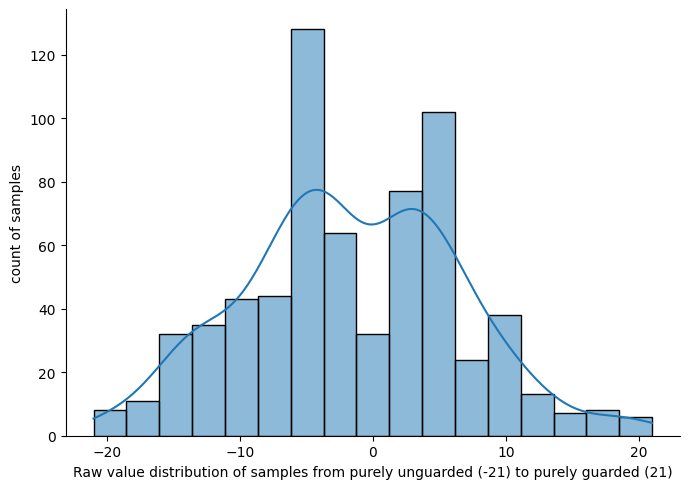

In [89]:
sns.displot(Emotion_RawDiff, x=0, kde=True, aspect=1.4)
plt.xlabel("Raw value distribution of samples from purely unguarded (-21) to purely guarded (21)")
plt.ylabel("count of samples");

So it IS rare for a sample to have an extreme value by magnitude, most magnitude of differences tend towards the center (but not exactly to the center, there is a sort of bimodality near the center where it tends one way or another to reflect the clusters of being purely on one side or the other that we saw in the last graph). Overall there is an interestingly and pleasantly multi-layer ordered structured to these EA's so far

This distribution is a little more tractable than the 4 mode distribution of "Emotion Val", and something like dweibull with 2 peaks near the center might fit, so we should still look at distribution fits in this case:

In [90]:
dfit = distfit(n_boots=100)
results = dfit.fit_transform(Emotion_RawDiff[0])
dfit.summary[['name', 'score', 'bootstrap_score', 'bootstrap_pass']]

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.14 sec] [RSS: 0.0030143] [loc=-1.583 scale=8.179]
[distfit] >INFO> [expon     ] [0.20 sec] [RSS: 0.0104449] [loc=-21.000 scale=19.417]
[distfit] >INFO> [pareto    ] [0.28 sec] [RSS: 0.0104449] [loc=-4294967317.000 scale=4294967296.000]
[distfit] >INFO> [dweibull  ] [1.25 sec] [RSS: 0.00203528] [loc=-0.866 scale=7.411]
[distfit] >INFO> [t         ] [10.0 sec] [RSS: 0.0030143] [loc=-1.583 scale=8.179]
[distfit] >INFO> [genextreme] [10.8 sec] [RSS: 0.00300562] [loc=-4.626 scale=8.026]
[distfit] >INFO> [gamma     ] [2.97 sec] [RSS: 0.00301947] [loc=-154.128 scale=0.438]
[distfit] >INFO> [lognorm   ] [6.51 sec] [RSS: 0.00319596] [loc=-53.667 scale=51.213]
[distfit] >INFO> [beta      ] [2.34 sec] [RSS: 0.0029921] [loc=-31.523 scale=68.650]
[distfit] >INFO> [uniform   ] [0.11 sec] [RSS: 0.0071943] [loc=-21.000 scale=42.000]
[distfit] >INFO> [loggamma  ] [3.53 sec] [RSS: 0.00301108] [loc=-1691.025 scale=248.020]
[

name     score bootstrap_score bootstrap_pass
0   genextreme  0.003006            0.08           True
1      lognorm  0.003196            0.02          False
2     dweibull  0.002035             0.0          False
3         beta  0.002992             0.0          False
4     loggamma  0.003011             0.0          False
5            t  0.003014             0.0          False
6         norm  0.003014             0.0          False
7        gamma  0.003019             0.0          False
8      uniform  0.007194             0.0          False
9       pareto  0.010445             0.0          False
10       expon  0.010445             0.0          False

Although the RSS scores it gets are a lot better than those of the Emotion purity metric, it still badly fails the Kolmogorov-Smirnov test. It must only be able to fit the distributions well via overfitting. It would be interesting to look at the plot to see how the fit is:

[distfit] >INFO> Create PDF plot for the parametric method.
[distfit] >INFO> Estimated distribution: Genextreme(loc:-4.625890, scale:8.025977)
[distfit] >INFO> Create CDF plot for the parametric method.
[distfit] >INFO> Ploting CDF


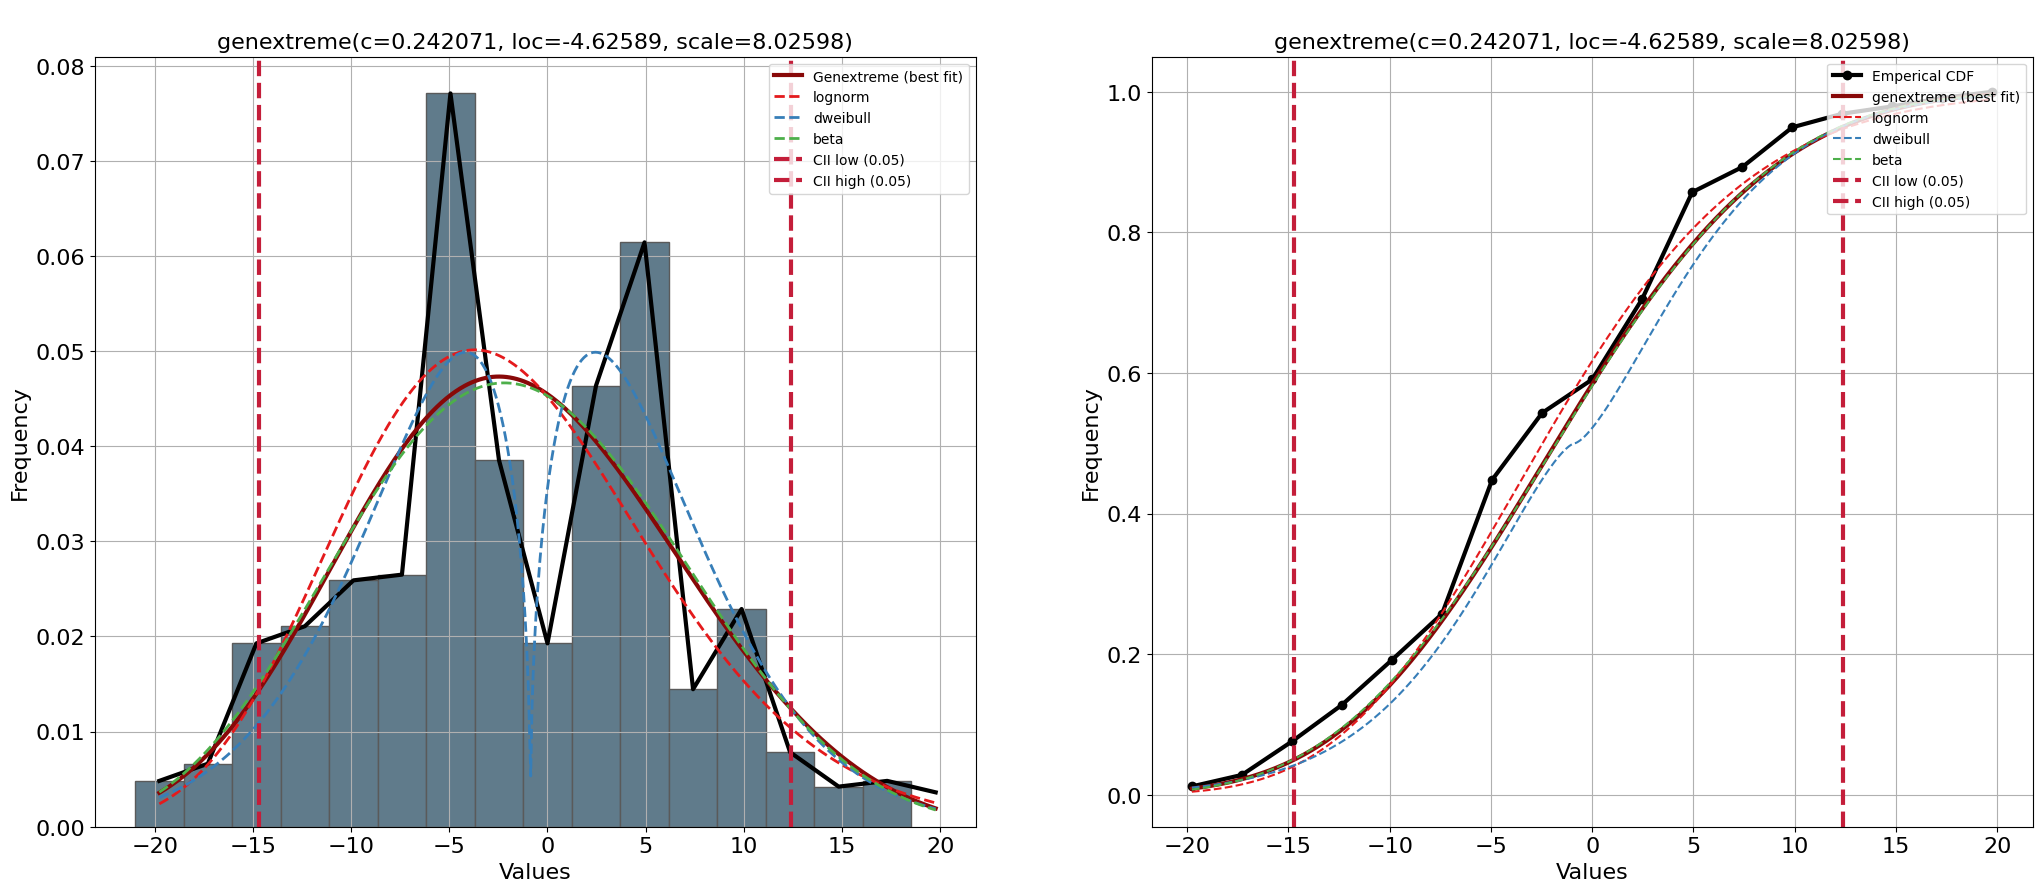

In [91]:
# Create subplot
fig, ax = plt.subplots(1,2, figsize=(25, 10))
# Plot PDF with histogram
dfit.plot(chart='PDF', n_top=3, ax=ax[0])
# Plot the CDF
dfit.plot(chart='CDF', n_top=3, ax=ax[1]);

The dweibull really does seem to capture something of the shape of this distribution but it's nowhere near as extreme which is probably where it's falling flat. The other one's plainly don't approximate the shape of the distribution well at all

Let's try more distributions to see if anything more unusual works, since some were close

In [92]:
dfit = distfit(n_boots=100, distr='full')
results = dfit.fit_transform(Emotion_RawDiff[0])
dfit.summary[['name', 'score', 'bootstrap_score', 'bootstrap_pass']]

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [alpha          ] [3.81 sec] [RSS: 0.00312595] [loc=-121.125 scale=1733.799]
[distfit] >INFO> [anglit         ] [0.67 sec] [RSS: 0.00377873] [loc=-0.369 scale=27.795]
[distfit] >INFO> [arcsine        ] [2.85 sec] [RSS: 0.0121779] [loc=-21.043 scale=42.043]
[distfit] >INFO> [beta           ] [2.34 sec] [RSS: 0.0029921] [loc=-31.523 scale=68.650]
[distfit] >INFO> [betaprime      ] [6.16 sec] [RSS: 0.00301961] [loc=-231.792 scale=238.758]
[distfit] >INFO> [bradford       ] [2.24 sec] [RSS: 0.00766077] [loc=-21.000 scale=42.000]
[distfit] >INFO> [burr           ] [14.8 sec] [RSS: 0.00357594] [loc=-3162.768 scale=3078.956]
[distfit] >INFO> [cauchy         ] [0.49 sec] [RSS: 0.00477541] [loc=-1.729 scale=5.237]
[distfit] >INFO> [chi            ] [4.19 sec] [RSS: 0.00301996] [loc=-57.398 scale=11.639]
[distfit] >INFO> [chi2           ] [4.32 sec] [RSS: 0.00304054] [loc=-67.668 scale=0.517]
[distfit] >INFO> [cosine         ] [0.7

name     score bootstrap_score bootstrap_pass
0     foldnorm  0.003007            0.71           True
1         chi2  0.003041            0.68           True
2         burr  0.003576            0.64           True
3         rice  0.003002            0.52           True
4          chi   0.00302            0.44           True
..         ...       ...             ...            ...
75   genpareto  0.058516             0.0          False
76  loglaplace  0.058834             0.0          False
77    gompertz  0.071014             0.0          False
78    vonmises  0.315997             0.0          False
79         NaN       NaN             NaN            NaN

[80 rows x 4 columns]

Some less common distributions seem to be working pretty well, let's see which one's:

In [93]:
dfit.summary[['name', 'score', 'bootstrap_score', 'bootstrap_pass']].head(15)

name     score bootstrap_score bootstrap_pass
0          foldnorm  0.003007            0.71           True
1              chi2  0.003041            0.68           True
2              burr  0.003576            0.64           True
3              rice  0.003002            0.52           True
4               chi   0.00302            0.44           True
5             alpha  0.003126            0.24           True
6             lomax  0.010118            0.15           True
7                 f  0.024585            0.13           True
8            mielke  0.003409             0.1           True
9     vonmises_line  0.003332            0.06           True
10       genextreme  0.003006            0.05          False
11  genhalflogistic  0.005052            0.03          False
12        betaprime   0.00302            0.02          False
13      tukeylambda  0.002987            0.01          False
14         invgauss  0.003135            0.01          False

[distfit] >INFO> Create PDF plot for the parametric method.
[distfit] >INFO> Estimated distribution: Foldnorm(loc:-21.000000, scale:8.294901)
[distfit] >INFO> Create CDF plot for the parametric method.
[distfit] >INFO> Ploting CDF


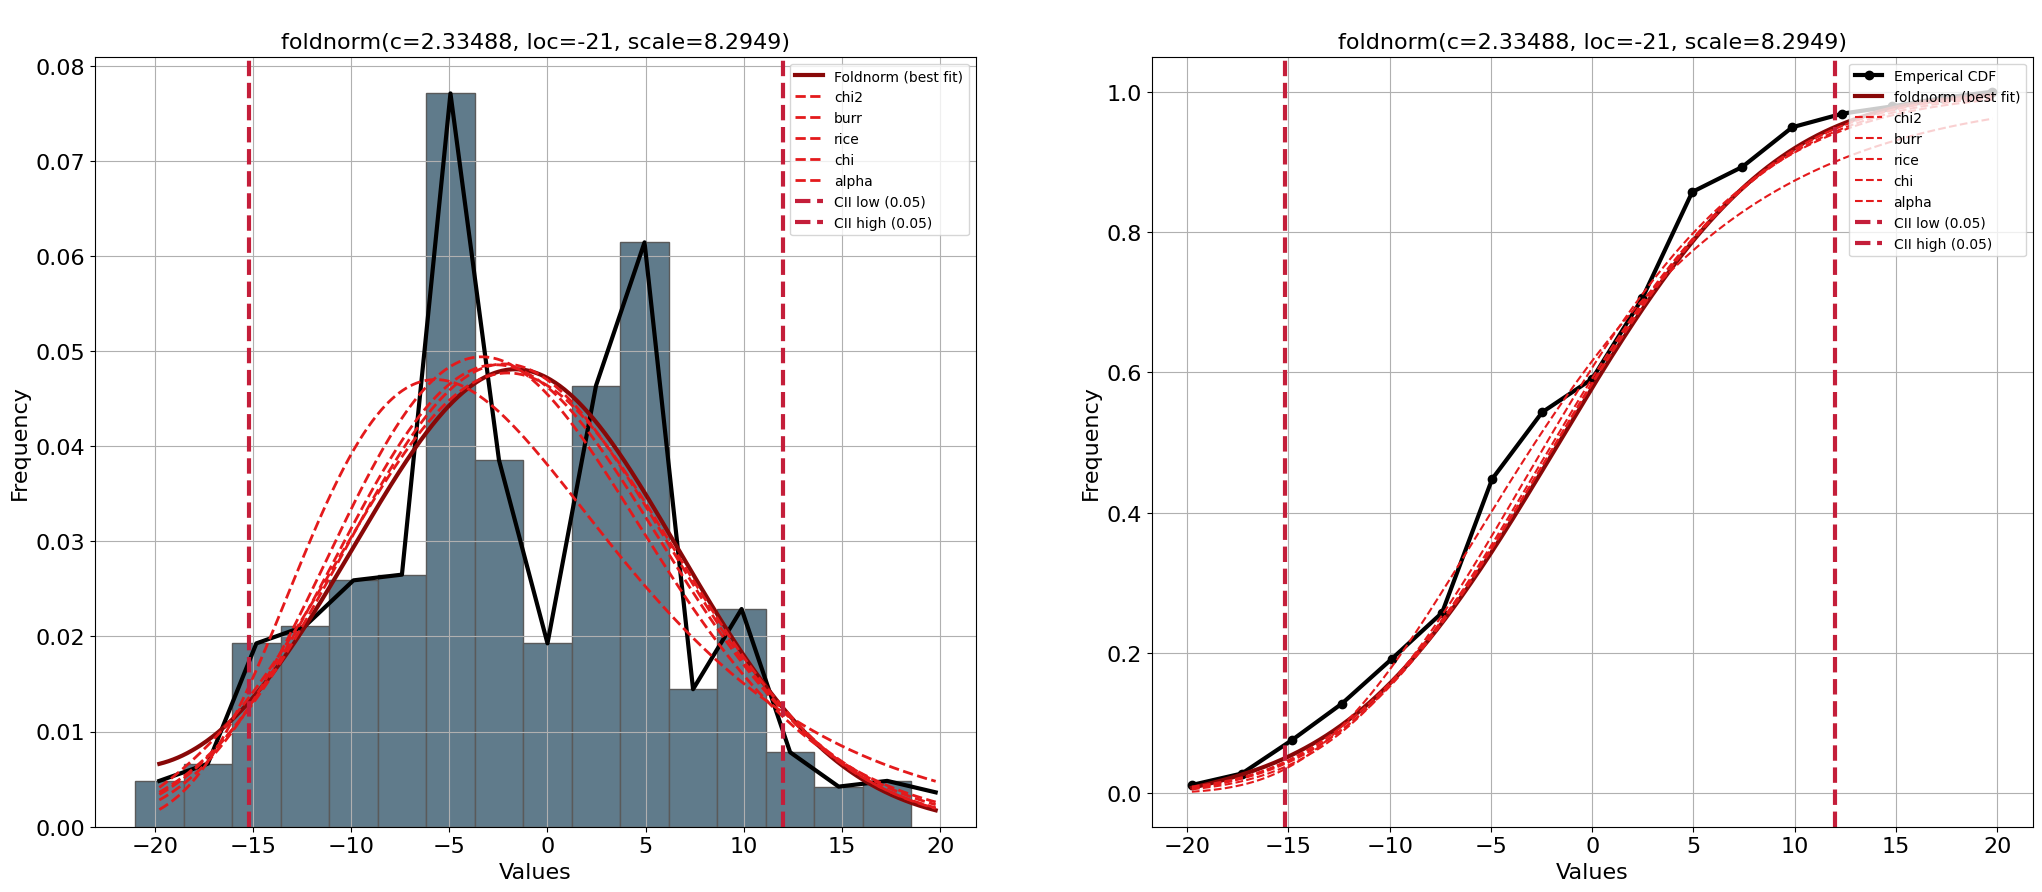

In [94]:
# Create subplot
fig, ax = plt.subplots(1,2, figsize=(25, 10))
# Plot PDF with histogram
dfit.plot(chart='PDF', n_top=5, ax=ax[0])
# Plot the CDF
dfit.plot(chart='CDF', n_top=5, ax=ax[1]);

So it seems that the data can fit reasonably well with a foldnorm distribution, chi distribution (sort of weird since that in itself is used for statistical hypothesis testing), the burr distributions (which is another distribution that tests extreme values which doesn't seem particularly relevant here), and a rice distribution (which might actually be promising, as these distributions are used in signal processing where there is a dominant component of the signal and added noise). The alpha distribution doesn't make sense here as we're not really weighting things towards lower values with a possibility of later extreme events.

So the best possible fits seem to be things like foldnorm, rice and something like dweibull (due to having some shape correspondence in spite of not fitting well overall)

Although none of these distributions seem to capture the shape very well, visually speaking, so it might make more sense to just view it as two pretty close distance clusters with long tails towards their extreme values

In [95]:
all_df['Emotion_RawDiff'] = Emotion_RawDiff
all_df.head()

Sample Name      Vultologist  Type Development  \
0                  Janina Ramirez  Sierra Schwartz  tesi        i-i-   
1                   Zeena Schreck  Sierra Schwartz  fise        i-i-   
2  Sandra Lee "Dr. Pimple Popper"  Sierra Schwartz  teni        i-i-   
3                     Johnny Depp         Ash Rose  tise        iii-   
4                Pierre Poilievre        Peter Foy  tesi        ii--   

    Emotions  Fallen Affect J Signal Mixing P Signal Mixing     Sex Age Range  \
0  unguarded            0.0             low             low  female     1980s   
1    neutral            3.0            high             low  female     1960s   
2  unguarded            0.0             low             low  female     1970s   
3    neutral            2.0             low             low    male     1960s   
4    guarded            1.0             low          medium    male     1970s   

   ... EU2 Polite Smiling EU3 Bashful Body Movements  EG1 Upset Mouth Tension  \
0  ...                4.0                        2.0                      0.0   
1  ...                2.0                        0.0                      2.0   
2  ...                7.0                        2.0                      2.0   
3  ...                4.0                        2.0                      4.0   
4  ...                2.0                        0.0                      4.0   

   EG2 Assertive Pushing  EG3 Stern Expressions    sum  Lead Energetic  \
0                    2.0                    0.0  177.0              Je   
1                    2.0                    2.0  188.0              Ji   
2                    2.0                    0.0  195.0              Je   
3                    0.0                    2.0  208.0              Ji   
4                    7.0                    2.0  196.0              Je   

   Quadra  Emotion_Val  Emotion_RawDiff  
0   Delta    -0.666667             -8.0  
1   Gamma     0.200000              2.0  
2   Gamma    -0.529412             -9.0  
3    Beta    -0.250000             -4.0  
4   Delta     0.529412              9.0  

[5 rows x 87 columns]

In [96]:
all_df.loc[(all_df['Emotion_RawDiff'] == 21) | (all_df['Emotion_RawDiff'] == -21)]

Sample Name       Vultologist  Type Development   Emotions  \
7      Marion Cotillard         Peter Foy  fise        iiii  unguarded   
71        Natalie Cuomo    Ahmad Aldroubi  seti        ii--  unguarded   
161          Caspar Lee    Ahmad Aldroubi  neti        ii--  unguarded   
177      Dean Schneider    Ahmad Aldroubi  seti        i-i-  unguarded   
183              Tamino    Ahmad Aldroubi  seti        i--i  unguarded   
302       Irving Finkel  Juan E. Sandoval  teni        i-i-    guarded   
329        Adolf Hitler  Juan E. Sandoval  tesi        i--i    guarded   
420      Aushra Augusta  Juan E. Sandoval  teni        ii--    guarded   
567     Jordan Peterson       Calin Copil  feni        iiii    guarded   
575  Jiddu Krishnamurti       Calin Copil  nite        iii-    guarded   
589    Hitomi Mochizuki          Ash Rose  sefi        i---  unguarded   

     Fallen Affect J Signal Mixing P Signal Mixing     Sex Age Range  ...  \
7              0.0          medium             low  female     1970s  ...   
71             0.0             low             low  female     1990s  ...   
161            0.0             NaN             NaN    male     1990s  ...   
177            0.0             low             low    male     1990s  ...   
183            3.0             low            high    male     1990s  ...   
302            2.0             low             low    male     1950s  ...   
329            5.0             low            high    male     1800s  ...   
420            0.0          medium             low  female     1910s  ...   
567            3.0             NaN             NaN    male        -1  ...   
575            3.0             NaN             NaN    male        -1  ...   
589            0.0             NaN             NaN  female        -1  ...   

    EU2 Polite Smiling EU3 Bashful Body Movements  EG1 Upset Mouth Tension  \
7                  7.0                        7.0                      0.0   
71                 7.0                        7.0                      0.0   
161                7.0                        7.0                      0.0   
177                7.0                        7.0                      0.0   
183                7.0                        7.0                      0.0   
302                0.0                        0.0                      7.0   
329                0.0                        0.0                      7.0   
420                0.0                        0.0                      7.0   
567                0.0                        0.0                      7.0   
575                0.0                        0.0                      7.0   
589                7.0                        7.0                      0.0   

     EG2 Assertive Pushing  EG3 Stern Expressions    sum  Lead Energetic  \
7                      0.0                    0.0  236.0              Ji   
71                     0.0                    0.0  235.0              Pe   
161                    0.0                    0.0  224.0              Pe   
177                    0.0                    0.0  217.0              Pe   
183                    0.0                    0.0  245.0              Pe   
302                    7.0                    7.0  189.0              Je   
329                    7.0                    7.0  204.0              Je   
420                    7.0                    7.0  193.0              Je   
567                    7.0                    7.0  217.0              Je   
575                    7.0                    7.0  162.0              Pi   
589                    0.0                    0.0  185.0              Pe   

     Quadra  Emotion_Val  Emotion_RawDiff  
7     Gamma         -1.0            -21.0  
71     Beta         -1.0            -21.0  
161   Alpha         -1.0            -21.0  
177    Beta         -1.0            -21.0  
183    Beta         -1.0            -21.0  
302   Gamma          1.0             21.0  
329   Delta          1.0             21.

There are 11 samples here with a magnitude of difference of 21 points between emotional attitudes, which is very high, so it's worth checking. According to the Vultology database on the website, all of thee values are correct except Jordan Peterson, who is supposed to have 19 instead, and one of his signals is recorded differently in the data than the on the website. I also checked Peterson's other signals to confirm that they were correct, and they were. Since it's not even clear which value is correct, the one in the data (which says Peterson has 0 for responsive nodding) or on the site (which says he has a 2 for the that signal), I won't change anything for now.

Next we want to recalculate signal mixing, not as a categorical attribute, but as a number between 0 and 1, 1 being right in the middle (maximum signal mixing), 0 being on the farthest possible edge (zero signal mixing, purely on one side or the other).:

## Signal Mixing <a id='Mixing'></a>

In [97]:
J_Mixing = []
P_Mixing = []

for i in range(len(all_df)):
    CA = all_df.loc[i, 'CA1 Taut Nasolabial Area':'CA9 Grasping Hands'].sum()
    MS = all_df.loc[i, 'MS1 Lax Nasolabial Area':'MS9 Puppeteer Hands'].sum()
    GR = all_df.loc[i, 'GR1 Taut Preseptal Area':'GR8 Bodily Awareness'].sum()
    SU = all_df.loc[i, 'SU1 Lax Preseptal Area':'SU8 Quirky Skits'].sum()
    J_diff = abs(CA - MS)
    J_Tot = CA + MS
    P_diff = abs(GR - SU)
    P_Tot = GR + SU
    J_Mixing.append(1 - J_diff/J_Tot)
    P_Mixing.append(1 - P_diff/P_Tot)

J_Signal_Mixing = pd.DataFrame(J_Mixing)
J_Signal_Mixing.head()

0
0  0.173913
1  0.905660
2  0.357143
3  0.085106
4  0.240000

In [98]:
J_Signal_Mixing.describe()

0
count  672.000000
mean     0.368941
std      0.264113
min      0.000000
25%      0.153846
50%      0.345342
75%      0.571429
max      0.984127

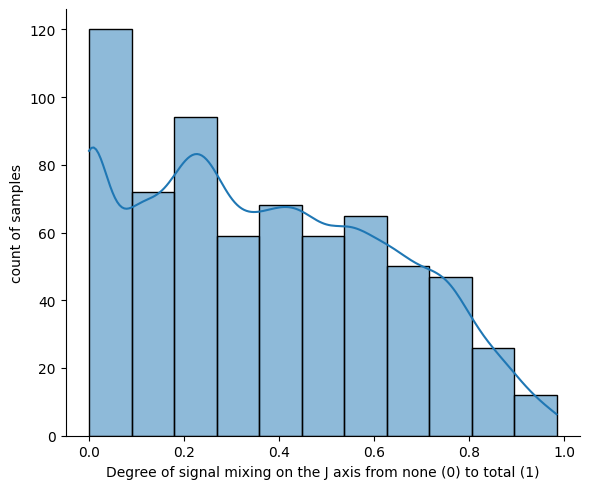

In [99]:
sns.displot(J_Signal_Mixing, x=0, kde=True, kde_kws={'bw_adjust': 0.6}, aspect=1.2)
plt.xlabel("Degree of signal mixing on the J axis from none (0) to total (1)")
plt.ylabel("count of samples");

In [100]:
J_Signal_Mixing[0].skew(), J_Signal_Mixing[0].kurtosis()

(0.2754383580838693, -0.9704253213724989)

In [101]:
dfit = distfit(n_boots=100)
results = dfit.fit_transform(J_Signal_Mixing[0])
dfit.summary[['name', 'score', 'bootstrap_score', 'bootstrap_pass']]

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.16 sec] [RSS: 2.38055] [loc=0.369 scale=0.264]
[distfit] >INFO> [expon     ] [0.12 sec] [RSS: 1.43627] [loc=0.000 scale=0.369]
[distfit] >INFO> [pareto    ] [0.27 sec] [RSS: 7.13798] [loc=-0.000 scale=0.000]
[distfit] >INFO> [dweibull  ] [1.11 sec] [RSS: 1.75192] [loc=0.353 scale=0.248]
[distfit] >INFO> [t         ] [9.51 sec] [RSS: 2.38054] [loc=0.369 scale=0.264]
[distfit] >INFO> [genextreme] [5.22 sec] [RSS: 2.05545] [loc=0.263 scale=0.241]
[distfit] >INFO> [gamma     ] [3.91 sec] [RSS: 3.01296] [loc=-0.000 scale=0.320]
[distfit] >INFO> [lognorm   ] [0.04 sec] [RSS: 13.5593] [loc=-0.000 scale=0.000]
[distfit] >INFO> [beta      ] [6.05 sec] [RSS: 1.76276] [loc=-0.000 scale=1.309]
[distfit] >INFO> [uniform   ] [0.12 sec] [RSS: 2.40884] [loc=0.000 scale=0.984]
[distfit] >INFO> [loggamma  ] [3.46 sec] [RSS: 2.36173] [loc=-90.532 scale=11.953]
[distfit] >INFO> [norm      ] [30.0 sec] [RSS: 2.38055] [loc=0.36

name      score bootstrap_score bootstrap_pass
0        gamma   3.012965            0.05           True
1        expon   1.436266             0.0          False
2     dweibull   1.751917             0.0          False
3         beta   1.762755             0.0          False
4   genextreme   2.055445             0.0          False
5     loggamma   2.361728             0.0          False
6            t   2.380541             0.0          False
7         norm   2.380551             0.0          False
8      uniform   2.408843             0.0          False
9       pareto   7.137983             0.0          False
10     lognorm  13.559307               0           None

[distfit] >INFO> Ploting Summary.
[distfit] >INFO> Bootstrap results are included..


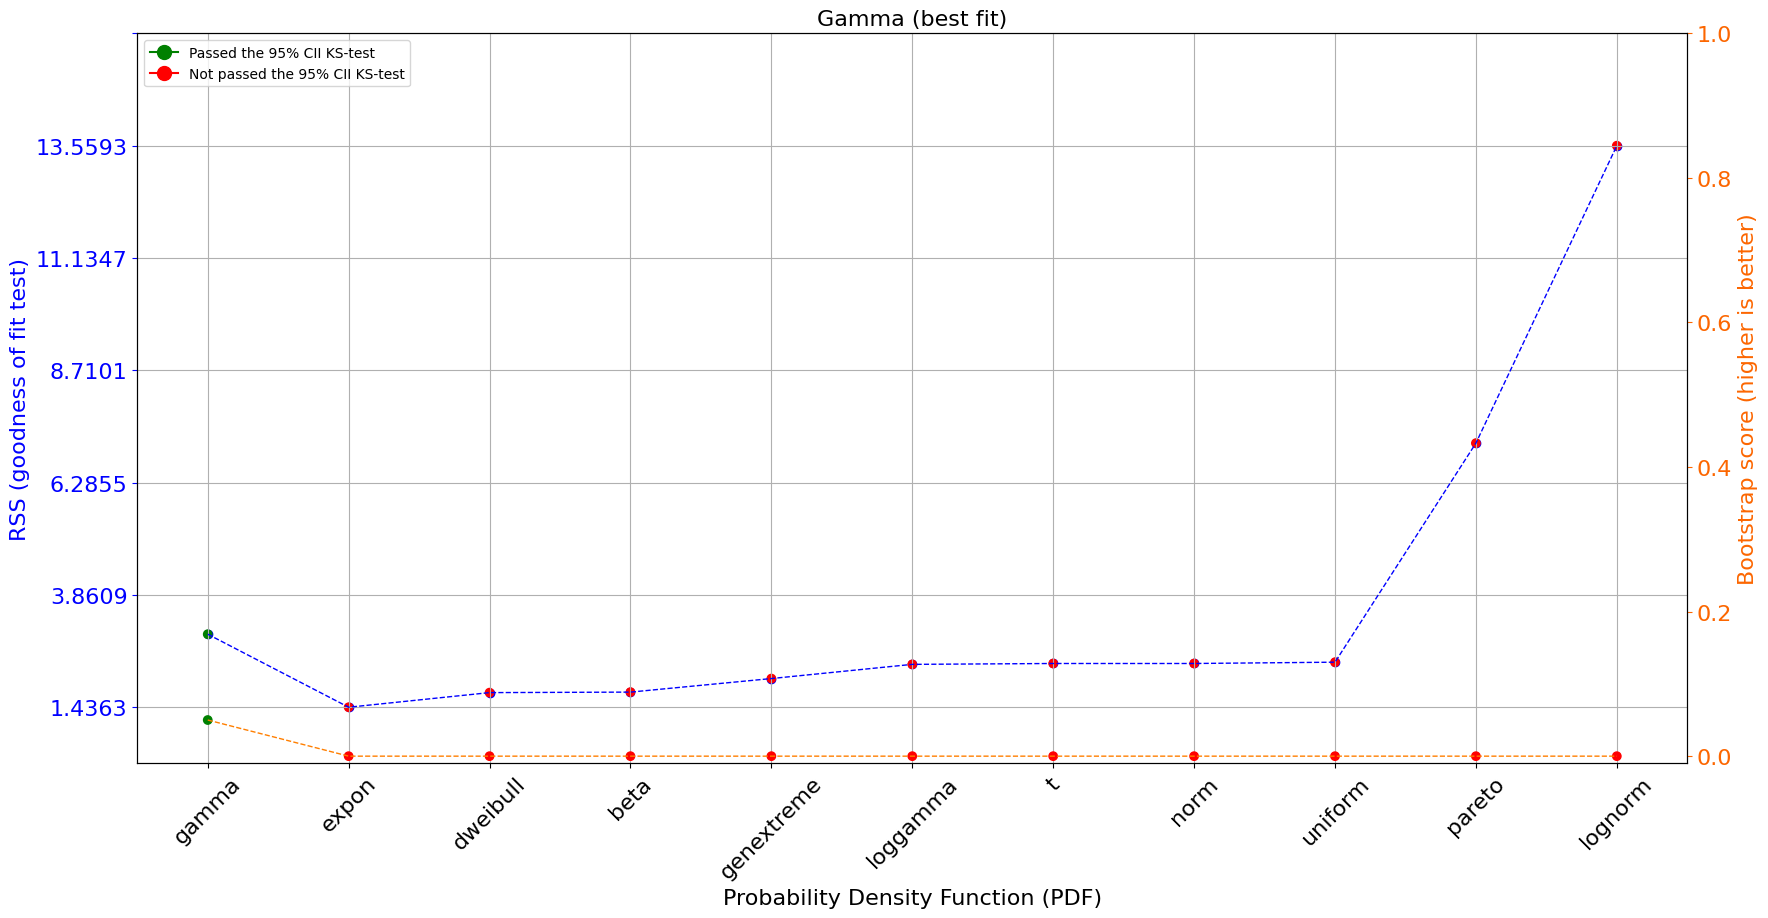

In [102]:
dfit.plot_summary();

Gamma looks like a narrow possible fit for this distribution when taking overfitting into account, although it did not even get the highest RSS score, so this also seems worthy of more investigation of possible distributions that could work to model this. There was also concern about some of the extreme values at the lower end of the distribution, so taking this into account (for example by including only recent samples) may also have an effect and this is something we will certainly try soon

In [103]:
dfit = distfit(n_boots=100, distr='full')
results = dfit.fit_transform(J_Signal_Mixing[0])
dfit.summary[['name', 'score', 'bootstrap_score', 'bootstrap_pass']]

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [alpha          ] [2.88 sec] [RSS: 2.03909] [loc=-2.249 scale=26.065]
[distfit] >INFO> [anglit         ] [0.47 sec] [RSS: 2.02155] [loc=0.408 scale=0.750]
[distfit] >INFO> [arcsine        ] [2.50 sec] [RSS: 3.34232] [loc=-0.000 scale=0.990]
[distfit] >INFO> [beta           ] [6.14 sec] [RSS: 1.76276] [loc=-0.000 scale=1.309]
[distfit] >INFO> [betaprime      ] [6.06 sec] [RSS: 3.96557] [loc=-0.000 scale=1.018]
[distfit] >INFO> [bradford       ] [2.73 sec] [RSS: 0.938669] [loc=-0.000 scale=1.002]
[distfit] >INFO> [burr           ] [14.6 sec] [RSS: 2.3362] [loc=-0.000 scale=0.660]
[distfit] >INFO> [cauchy         ] [0.38 sec] [RSS: 3.81794] [loc=0.333 scale=0.187]
[distfit] >INFO> [chi            ] [4.22 sec] [RSS: 1.0182] [loc=-0.000 scale=0.500]
[distfit] >INFO> [chi2           ] [4.44 sec] [RSS: 4.92798] [loc=-0.000 scale=0.186]
[distfit] >INFO> [cosine         ] [0.55 sec] [RSS: 2.13703] [loc=0.384 scale=0.222]
[distfit]

name      score bootstrap_score bootstrap_pass
0            erlang   5.033765            0.99           True
1         truncnorm   1.098532            0.53           True
2   genhalflogistic   0.768061             0.1           True
3       weibull_max   2.055654            0.04          False
4             gamma   3.012965            0.04          False
..              ...        ...             ...            ...
75        johnsonsb   7.284738             0.0          False
76       reciprocal  11.022502               0           None
77         powerlaw  12.404906             0.0          False
78          lognorm  13.559307               0           None
79        powernorm        NaN               0           None

[80 rows x 4 columns]

[distfit] >INFO> Ploting Summary.
[distfit] >INFO> Bootstrap results are included..


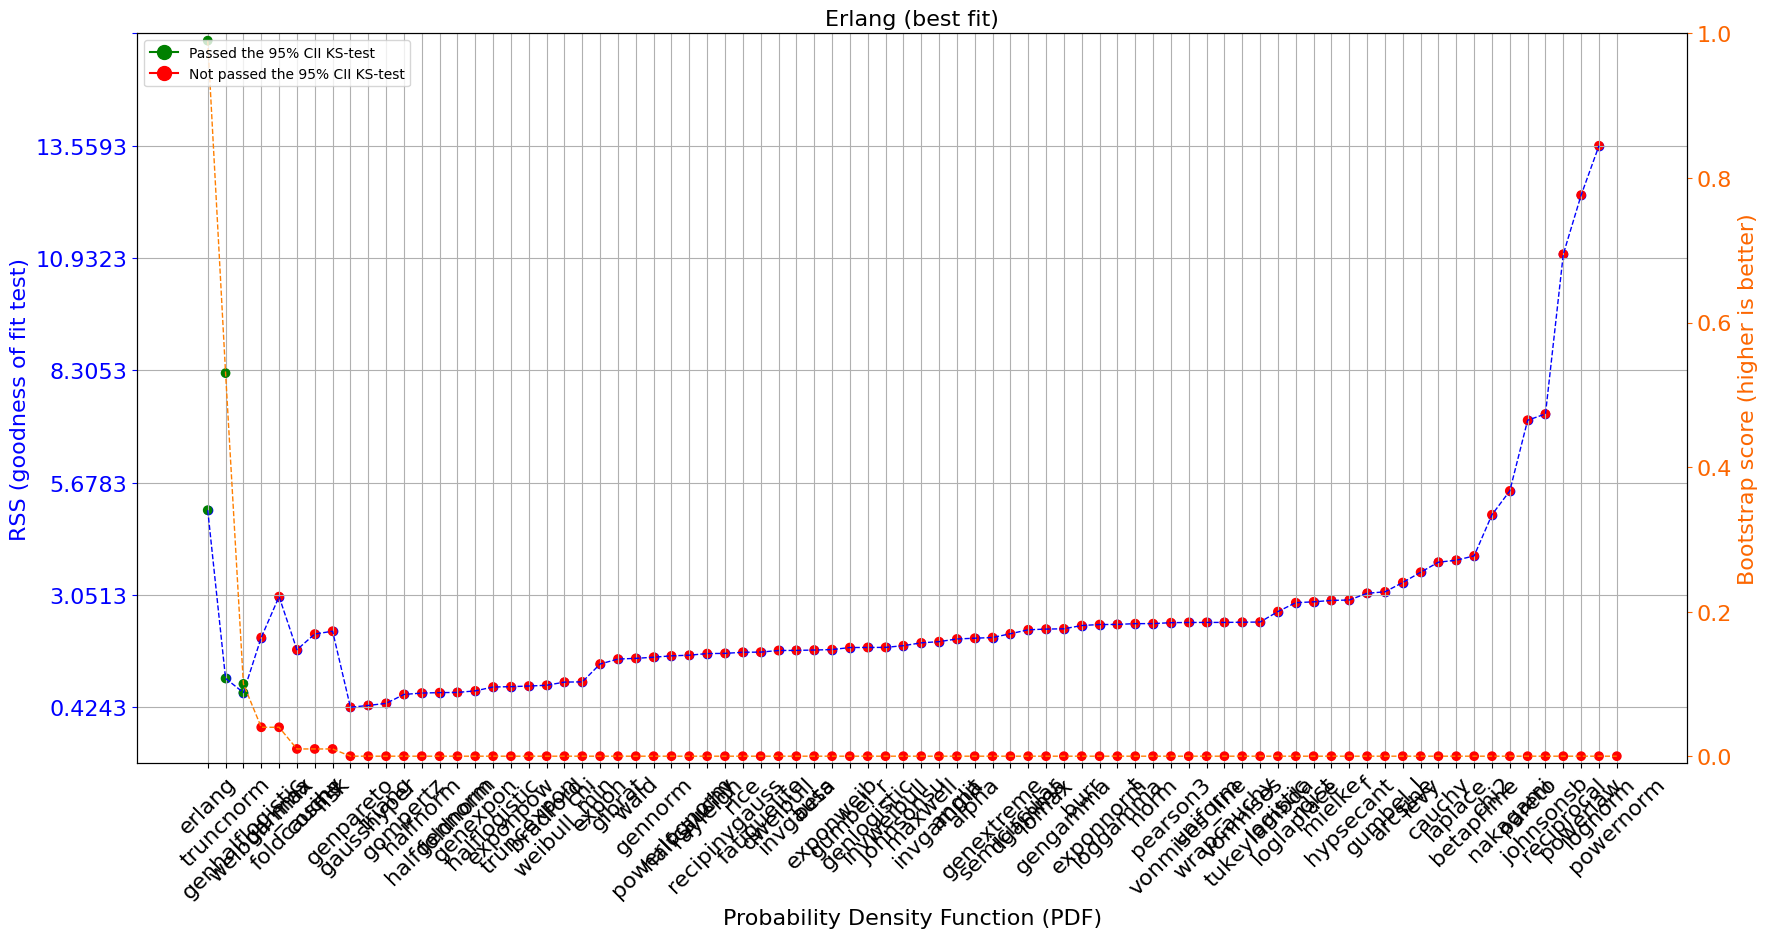

In [104]:
dfit.plot_summary();

[distfit] >INFO> Create PDF plot for the parametric method.
[distfit] >INFO> Estimated distribution: Erlang(loc:-0.000000, scale:0.596775)
[distfit] >INFO> Create CDF plot for the parametric method.
[distfit] >INFO> Ploting CDF


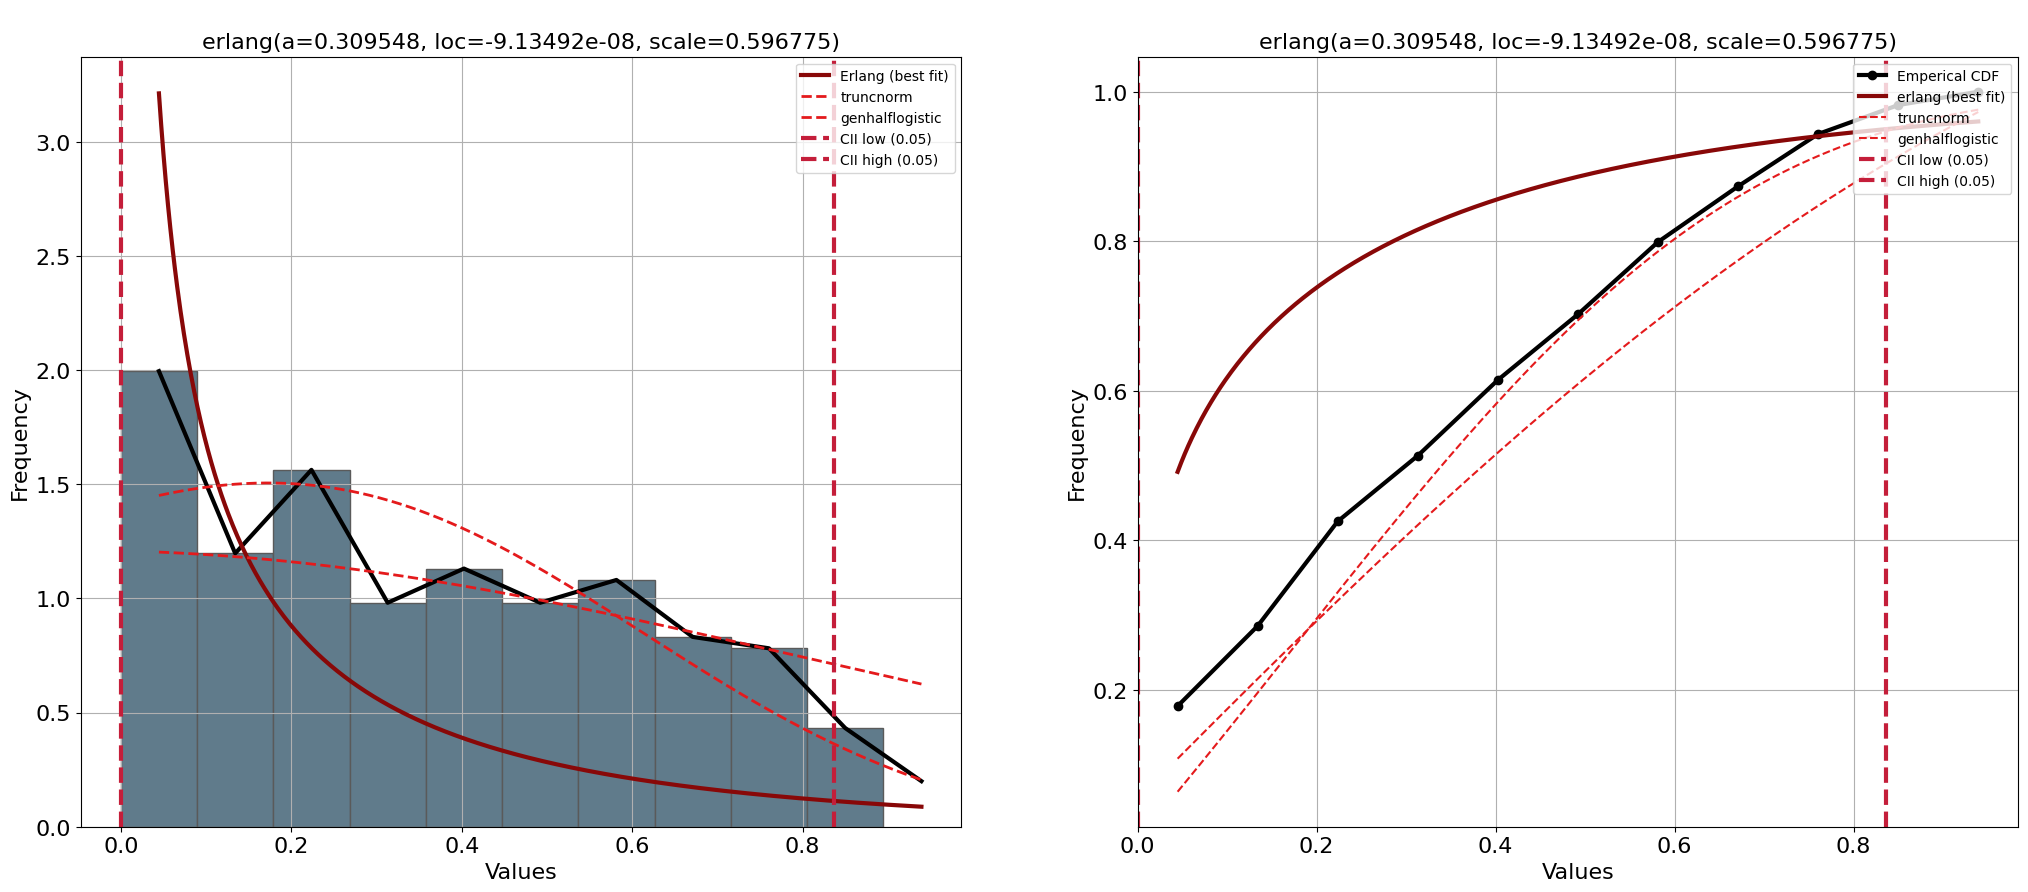

In [105]:
# Create subplot
fig, ax = plt.subplots(1,2, figsize=(25, 10))
# Plot PDF with histogram
dfit.plot(chart='PDF', n_top=2, ax=ax[0])
# Plot the CDF
dfit.plot(chart='CDF', n_top=2, ax=ax[1]);

The Erlang distribution performs surprisingly well on the bootstrapping analysis, but it's hard to see how it's a good shape at all when considering its shape, visually it doesn't seem to fit at all. The truncated normal distribution seems to be the closest fit while still performing somewhat well in the bootstrapping test, so it's likely that it fits best (which makes sense, since that basically makes this distribution sound "normal" in the sense of being a section of a normal distribution)

In [106]:
all_df['J_Signal_Mixing'] = J_Signal_Mixing
all_df.head()

Sample Name      Vultologist  Type Development  \
0                  Janina Ramirez  Sierra Schwartz  tesi        i-i-   
1                   Zeena Schreck  Sierra Schwartz  fise        i-i-   
2  Sandra Lee "Dr. Pimple Popper"  Sierra Schwartz  teni        i-i-   
3                     Johnny Depp         Ash Rose  tise        iii-   
4                Pierre Poilievre        Peter Foy  tesi        ii--   

    Emotions  Fallen Affect J Signal Mixing P Signal Mixing     Sex Age Range  \
0  unguarded            0.0             low             low  female     1980s   
1    neutral            3.0            high             low  female     1960s   
2  unguarded            0.0             low             low  female     1970s   
3    neutral            2.0             low             low    male     1960s   
4    guarded            1.0             low          medium    male     1970s   

   ... EU3 Bashful Body Movements EG1 Upset Mouth Tension  \
0  ...                        2.0                     0.0   
1  ...                        0.0                     2.0   
2  ...                        2.0                     2.0   
3  ...                        2.0                     4.0   
4  ...                        0.0                     4.0   

   EG2 Assertive Pushing  EG3 Stern Expressions    sum  Lead Energetic  \
0                    2.0                    0.0  177.0              Je   
1                    2.0                    2.0  188.0              Ji   
2                    2.0                    0.0  195.0              Je   
3                    0.0                    2.0  208.0              Ji   
4                    7.0                    2.0  196.0              Je   

   Quadra  Emotion_Val  Emotion_RawDiff  J_Signal_Mixing  
0   Delta    -0.666667             -8.0         0.173913  
1   Gamma     0.200000              2.0         0.905660  
2   Gamma    -0.529412             -9.0         0.357143  
3    Beta    -0.250000             -4.0         0.085106  
4   Delta     0.529412              9.0         0.240000  

[5 rows x 88 columns]

In [107]:
P_Signal_Mixing = pd.DataFrame(P_Mixing)
P_Signal_Mixing.head()

0
0  0.000000
1  0.307692
2  0.285714
3  0.571429
4  0.685714

In [108]:
P_Signal_Mixing.describe()

0
count  672.000000
mean     0.350783
std      0.271653
min      0.000000
25%      0.117647
50%      0.315789
75%      0.573308
max      0.967742

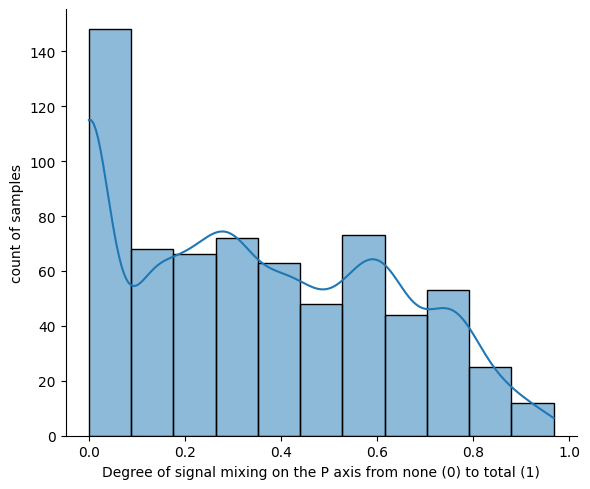

In [109]:
sns.displot(P_Signal_Mixing, x=0, kde=True, kde_kws={'bw_adjust': 0.6}, aspect=1.2)
plt.xlabel("Degree of signal mixing on the P axis from none (0) to total (1)")
plt.ylabel("count of samples");

In [110]:
P_Signal_Mixing[0].skew(), P_Signal_Mixing[0].kurtosis()

(0.2624319311943712, -1.074913991687454)

In [111]:
dfit = distfit(n_boots=100)
results = dfit.fit_transform(P_Signal_Mixing[0])
dfit.summary[['name', 'score', 'bootstrap_score', 'bootstrap_pass']]

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.13 sec] [RSS: 3.67631] [loc=0.351 scale=0.271]
[distfit] >INFO> [expon     ] [0.15 sec] [RSS: 1.7373] [loc=0.000 scale=0.351]
[distfit] >INFO> [pareto    ] [0.23 sec] [RSS: 5.37124] [loc=-0.005 scale=0.005]
[distfit] >INFO> [dweibull  ] [1.13 sec] [RSS: 3.55933] [loc=0.370 scale=0.260]
[distfit] >INFO> [t         ] [9.82 sec] [RSS: 3.67631] [loc=0.351 scale=0.271]
[distfit] >INFO> [genextreme] [5.17 sec] [RSS: 3.32056] [loc=0.242 scale=0.247]
[distfit] >INFO> [gamma     ] [4.26 sec] [RSS: 2.41673] [loc=-0.000 scale=0.867]
[distfit] >INFO> [lognorm   ] [0.05 sec] [RSS: 15.0229] [loc=-0.000 scale=0.000]
[distfit] >INFO> [beta      ] [6.10 sec] [RSS: 1.70644] [loc=-0.000 scale=1.310]
[distfit] >INFO> [uniform   ] [0.12 sec] [RSS: 3.47073] [loc=0.000 scale=0.968]
[distfit] >INFO> [loggamma  ] [3.42 sec] [RSS: 3.66254] [loc=-79.605 scale=10.864]
[distfit] >INFO> [norm      ] [30.6 sec] [RSS: 3.67631] [loc=0.351

name      score bootstrap_score bootstrap_pass
0         beta   1.706439             0.0          False
1        expon   1.737303             0.0          False
2        gamma   2.416726             0.0          False
3   genextreme   3.320556             0.0          False
4      uniform   3.470732             0.0          False
5     dweibull   3.559331             0.0          False
6     loggamma   3.662543             0.0          False
7            t   3.676313             0.0          False
8         norm   3.676314             0.0          False
9       pareto   5.371236             0.0          False
10     lognorm  15.022921               0           None

[distfit] >INFO> Ploting Summary.
[distfit] >INFO> Bootstrap results are included..


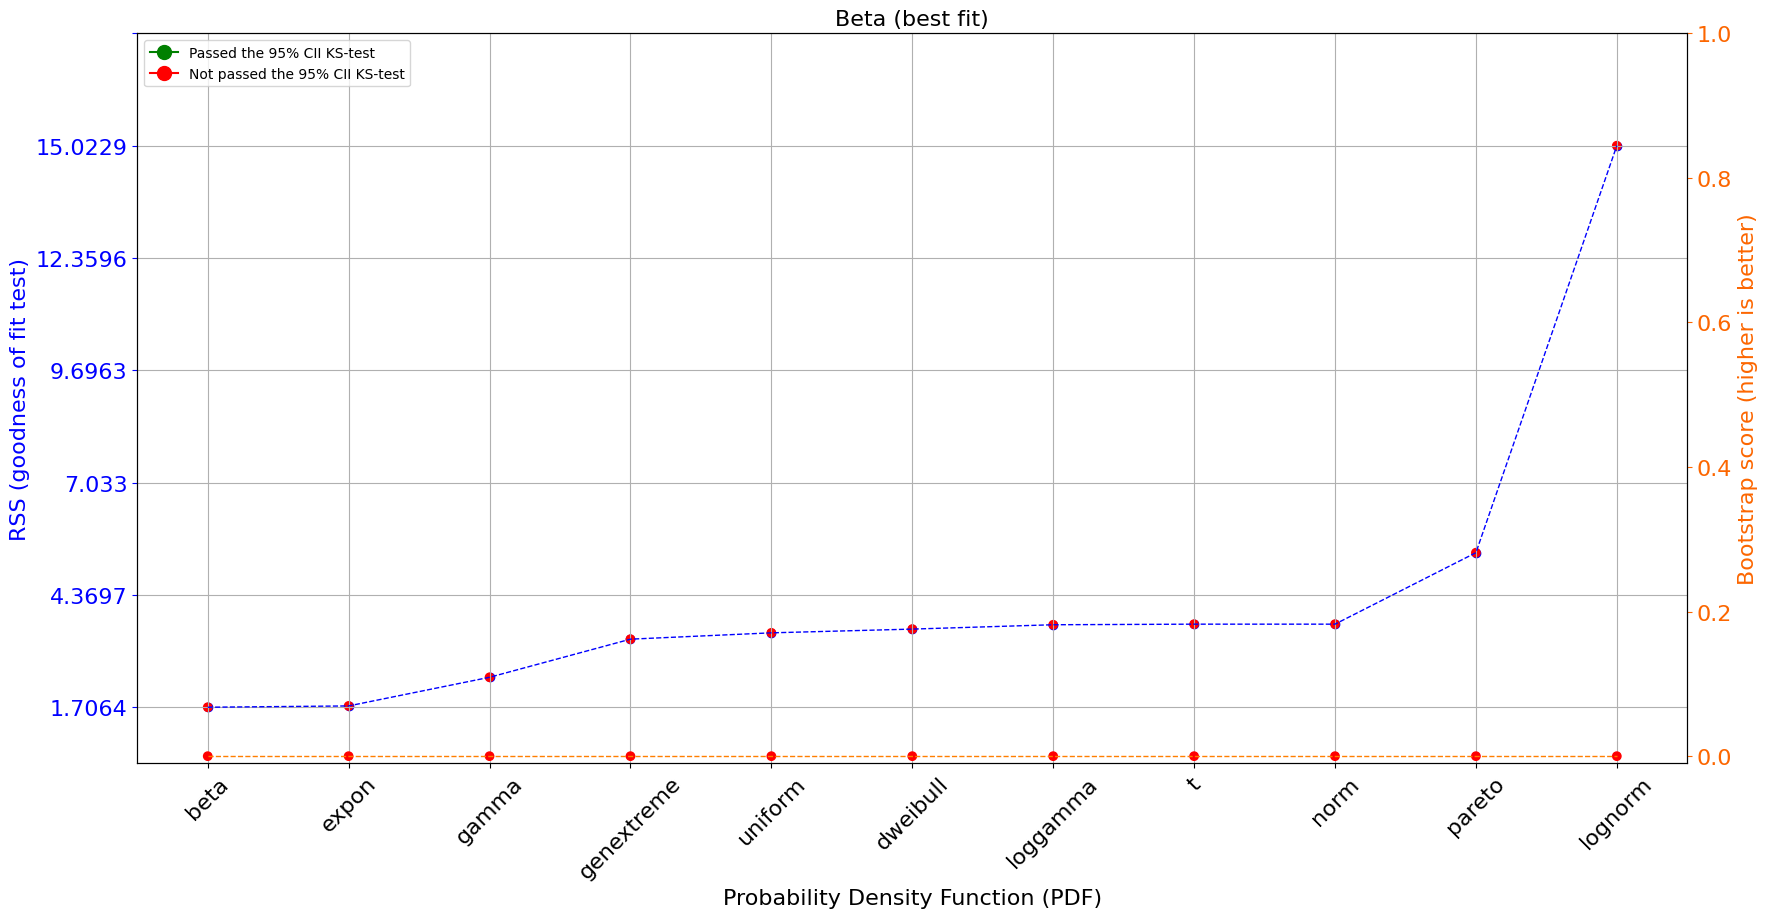

In [112]:
dfit.plot_summary();

This one fails all but Gamma was again somewhat close to fitting, which is a possible clue to investigate other distributions that have similarities to Gamma which may have a better fit here (or just see what effect different subsets of the data might have, such as cleaner subsets from the last year). What's interesting about Gamma is that it's used for reliability testing, which does have something to do with signal mixing. Beta could again work well but nothing passed so it needs more investigation to say that any distribution works well. It's likely that none of the one's we've tried are going to work well based on the comparative results we've got with trying all distributions (where a few tend to actually work well)

In [113]:
dfit = distfit(n_boots=100, distr='full')
results = dfit.fit_transform(P_Signal_Mixing[0])
dfit.summary[['name', 'score', 'bootstrap_score', 'bootstrap_pass']]

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [alpha          ] [2.74 sec] [RSS: 3.27256] [loc=-2.151 scale=23.106]
[distfit] >INFO> [anglit         ] [0.45 sec] [RSS: 3.26399] [loc=0.388 scale=0.755]
[distfit] >INFO> [arcsine        ] [2.49 sec] [RSS: 3.69847] [loc=-0.000 scale=0.974]
[distfit] >INFO> [beta           ] [6.14 sec] [RSS: 1.70644] [loc=-0.000 scale=1.310]
[distfit] >INFO> [betaprime      ] [6.17 sec] [RSS: 4.90039] [loc=-0.000 scale=0.692]
[distfit] >INFO> [bradford       ] [2.64 sec] [RSS: 1.74753] [loc=-0.000 scale=0.985]
[distfit] >INFO> [burr           ] [14.2 sec] [RSS: 0.998022] [loc=-0.000 scale=0.790]
[distfit] >INFO> [cauchy         ] [0.37 sec] [RSS: 5.1535] [loc=0.315 scale=0.196]
[distfit] >INFO> [chi            ] [4.47 sec] [RSS: 1.17332] [loc=-0.000 scale=0.794]
[distfit] >INFO> [chi2           ] [4.82 sec] [RSS: 2.86285] [loc=-0.000 scale=0.415]
[distfit] >INFO> [cosine         ] [0.56 sec] [RSS: 3.41643] [loc=0.366 scale=0.226]
[distfit

name      score bootstrap_score bootstrap_pass
0      gennorm   3.470732             1.0           True
1    johnsonsb   7.165183            0.14           True
2       erlang   4.667428            0.11           True
3         chi2   2.862853            0.03          False
4    genpareto   1.224547            0.01          False
..         ...        ...             ...            ...
75      pareto   5.371236             0.0          False
76  reciprocal  11.885537               0           None
77    powerlaw   14.14139             0.0          False
78     lognorm  15.022921               0           None
79   powernorm        NaN               0           None

[80 rows x 4 columns]

In [114]:
dfit.summary[['name', 'score', 'bootstrap_score', 'bootstrap_pass']].head(10)

name     score bootstrap_score bootstrap_pass
0      gennorm  3.470732             1.0           True
1    johnsonsb  7.165183            0.14           True
2       erlang  4.667428            0.11           True
3         chi2  2.862853            0.03          False
4    genpareto  1.224547            0.01          False
5        gamma  2.416726            0.01          False
6  weibull_max  3.320493            0.01          False
7         burr  0.998022             0.0          False
8     exponpow  1.121935             0.0          False
9          chi  1.173319             0.0          False

[distfit] >INFO> Ploting Summary.
[distfit] >INFO> Bootstrap results are included..


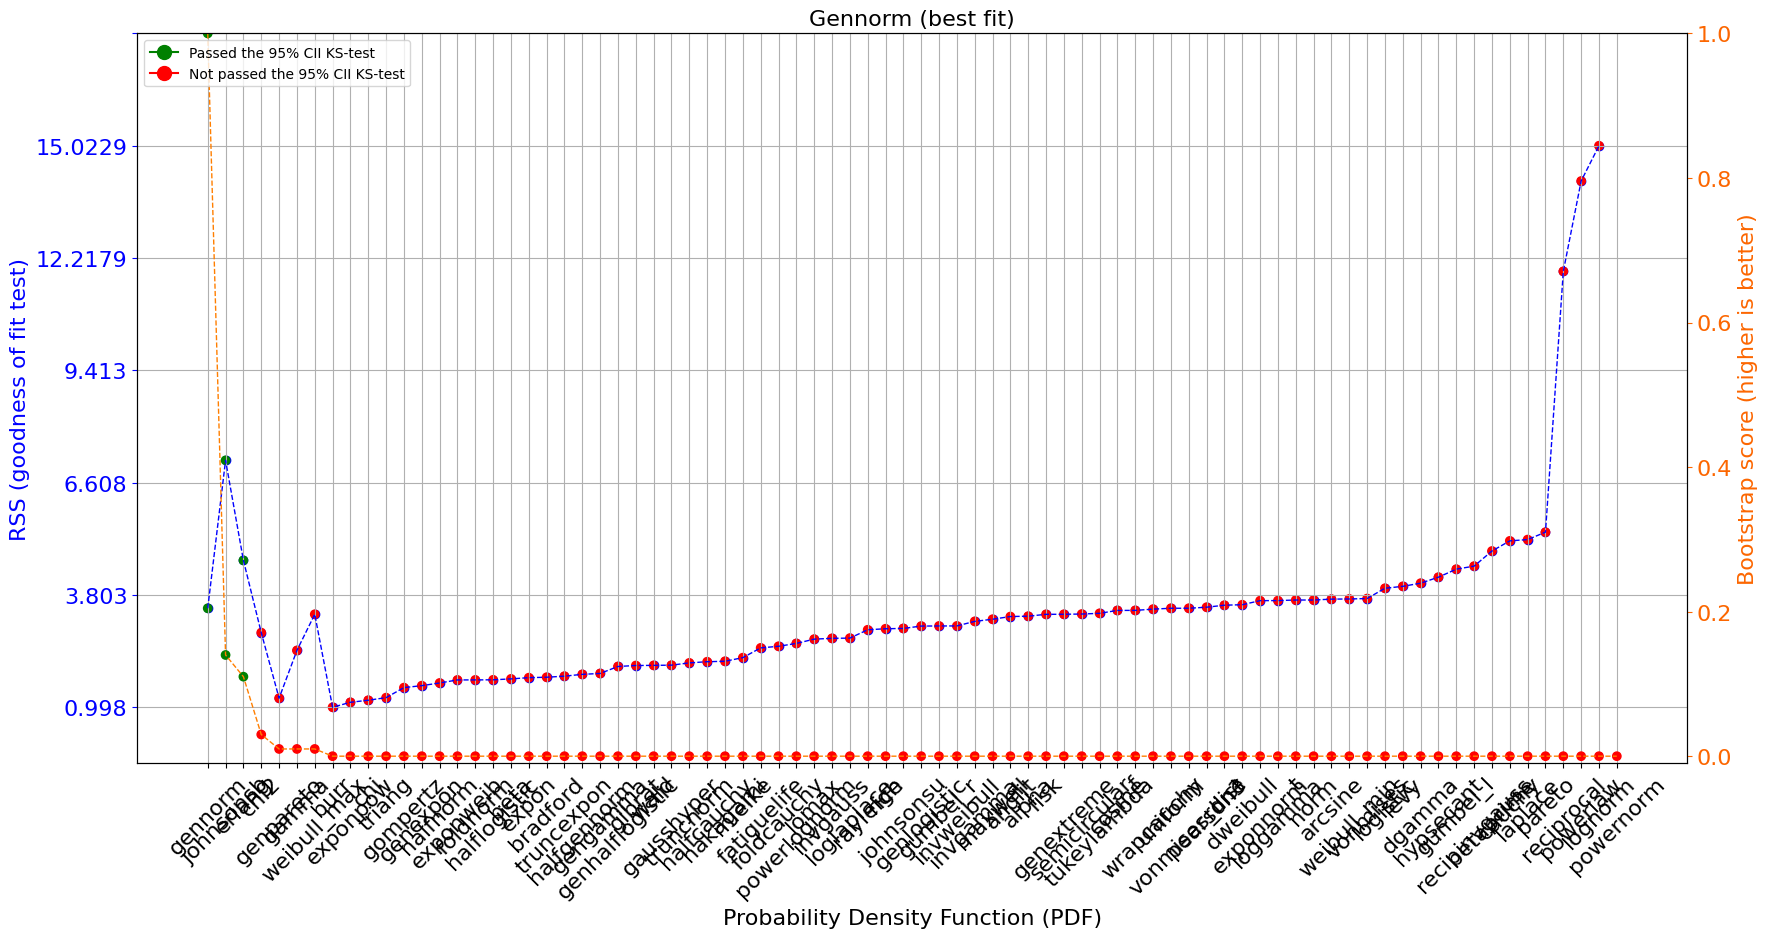

In [115]:
dfit.plot_summary();

[distfit] >INFO> Create PDF plot for the parametric method.
[distfit] >INFO> Estimated distribution: Gennorm(loc:0.483871, scale:0.483872)
[distfit] >INFO> Create CDF plot for the parametric method.
[distfit] >INFO> Ploting CDF


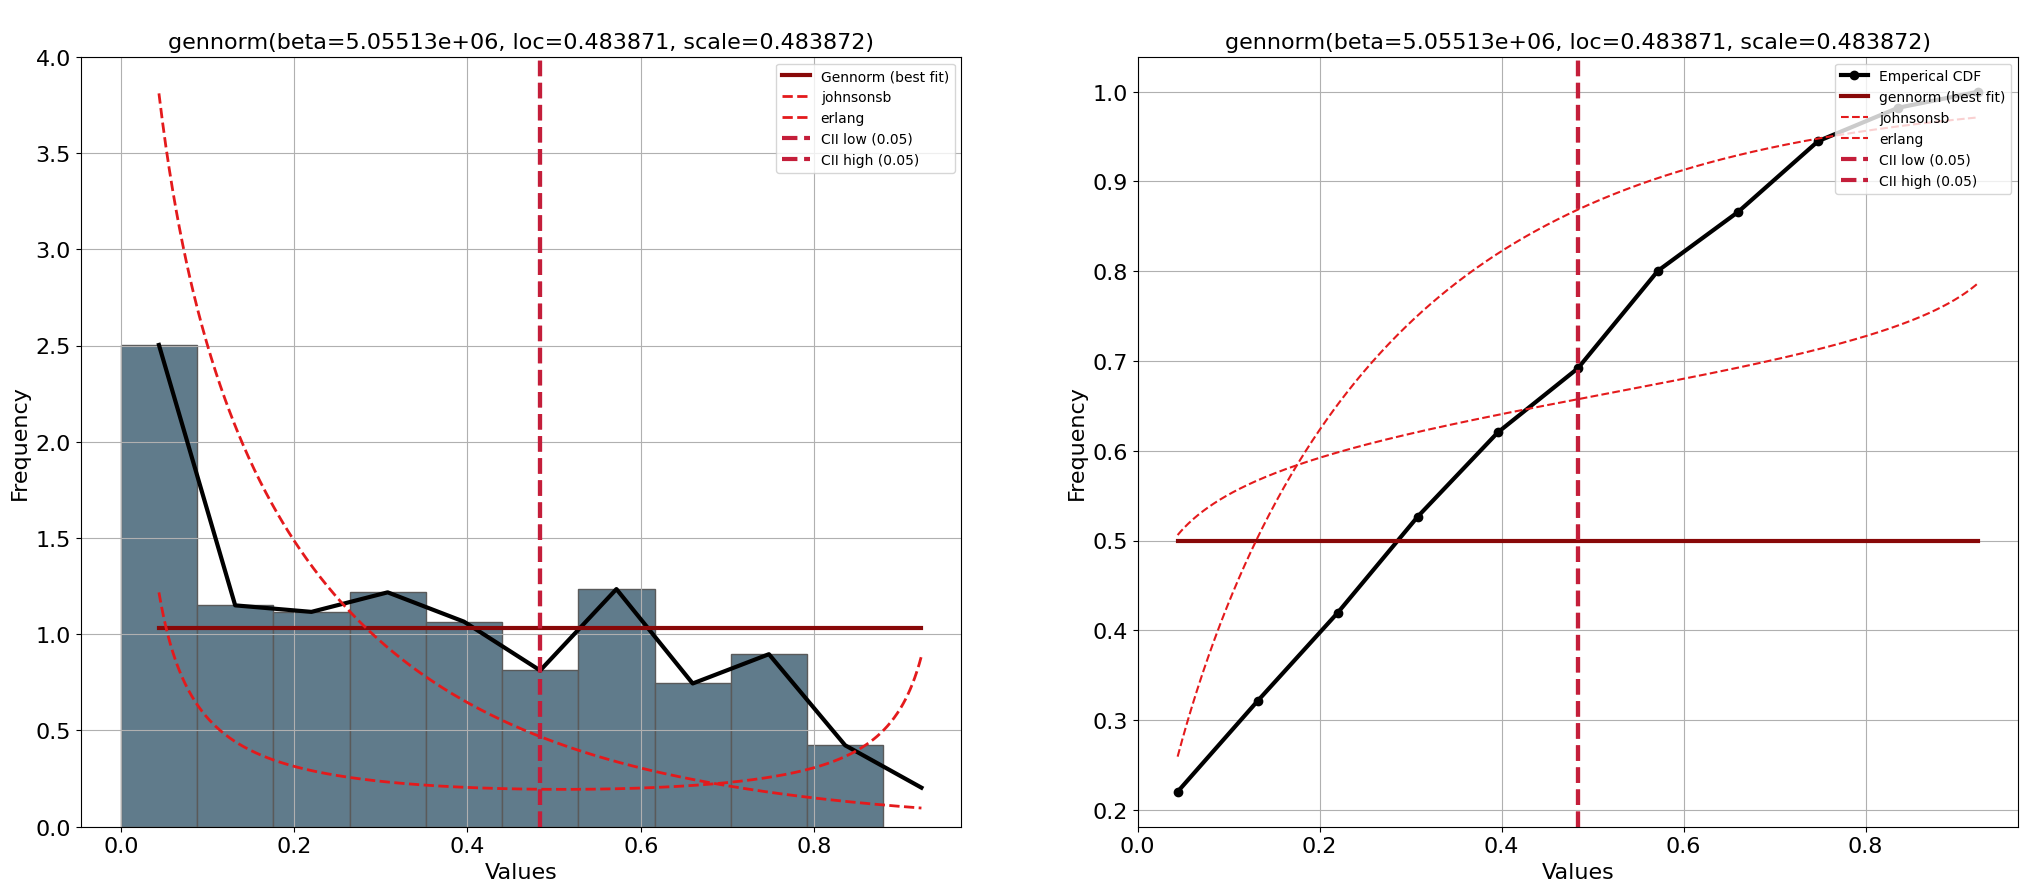

In [116]:
# Create subplot
fig, ax = plt.subplots(1,2, figsize=(25, 10))
# Plot PDF with histogram
dfit.plot(chart='PDF', n_top=2, ax=ax[0])
# Plot the CDF
dfit.plot(chart='CDF', n_top=2, ax=ax[1]);

None of these look very good at all, and the gennorm looks nonsensical to a point of silliness (it's basically uniform). Johnsonsb doesn't look terrible but really doesn't fit very well. Since truncnorm worked well for J Signal Mixing, I'm kind of curious how it will look for this one in spite of not performing well:

In [118]:
dfit = distfit(n_boots=100, distr='truncnorm')
results = dfit.fit_transform(P_Signal_Mixing[0])
dfit.summary[['name', 'score', 'bootstrap_score', 'bootstrap_pass']]

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [truncnorm] [6.21 sec] [RSS: 2.1063] [loc=-0.048 scale=0.859]
[distfit] >INFO> [truncnorm] [6.21 sec] [RSS: 2.1063] [loc=-0.048 scale=0.859]
[distfit] >INFO> Compute confidence intervals [parametric]


name     score bootstrap_score bootstrap_pass
0  truncnorm  2.106296             0.0          False

[distfit] >INFO> Create PDF plot for the parametric method.
[distfit] >INFO> Estimated distribution: Truncnorm(loc:-0.047684, scale:0.859347)
[distfit] >INFO> Create CDF plot for the parametric method.
[distfit] >INFO> Ploting CDF


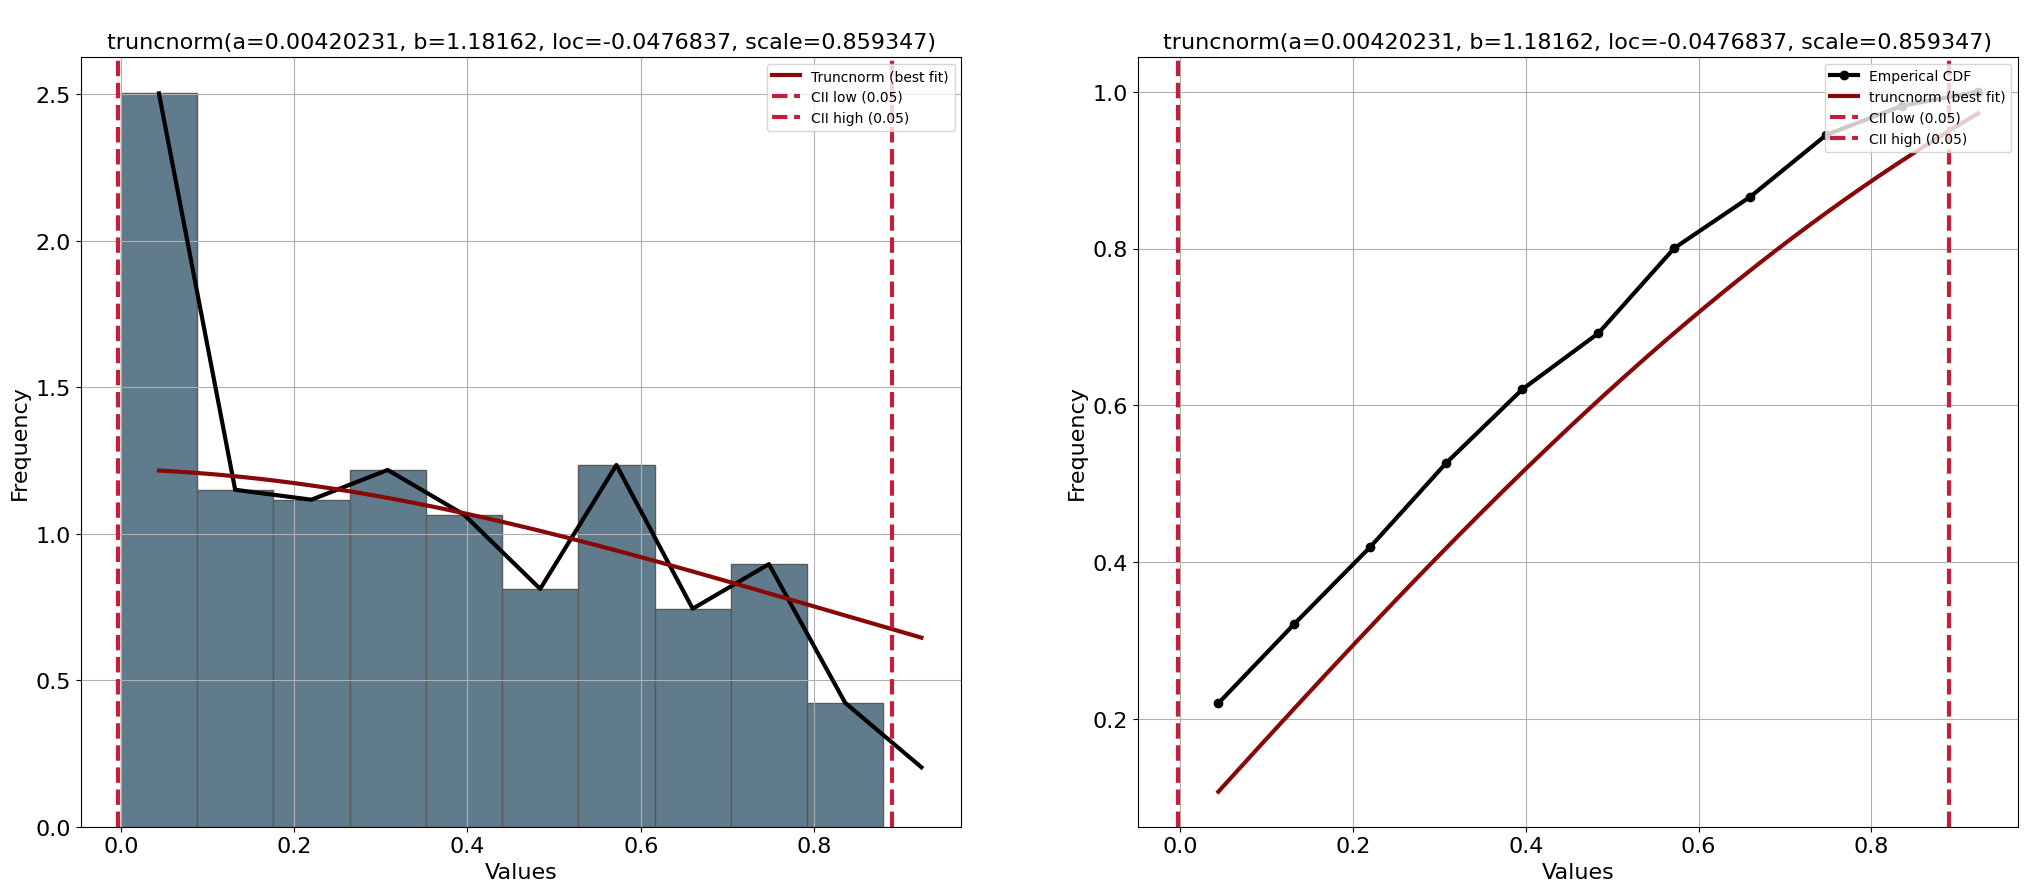

In [119]:
# Create subplot
fig, ax = plt.subplots(1,2, figsize=(25, 10))
# Plot PDF with histogram
dfit.plot(chart='PDF', ax=ax[0])
# Plot the CDF
dfit.plot(chart='CDF', ax=ax[1]);

You can see how it kind of approximates most of the distribution but then completely fails at the edges.

The strong sense I have based on this is that for these signal mixing distributions (and other like it) are being highly affected by these sharp jumps and outlier values (for example near zero or perhaps exactly at zero like Lapis was worried about) and that's why it's getting such wildly different results for the same distribution in spite of visually not that much difference between J and P Signal mixing on the whole. Therefore I'm not going to take these distributions too seriously until I address these outlier values

In [120]:
all_df['P_Signal_Mixing'] = P_Signal_Mixing
all_df.head()

Sample Name      Vultologist  Type Development  \
0                  Janina Ramirez  Sierra Schwartz  tesi        i-i-   
1                   Zeena Schreck  Sierra Schwartz  fise        i-i-   
2  Sandra Lee "Dr. Pimple Popper"  Sierra Schwartz  teni        i-i-   
3                     Johnny Depp         Ash Rose  tise        iii-   
4                Pierre Poilievre        Peter Foy  tesi        ii--   

    Emotions  Fallen Affect J Signal Mixing P Signal Mixing     Sex Age Range  \
0  unguarded            0.0             low             low  female     1980s   
1    neutral            3.0            high             low  female     1960s   
2  unguarded            0.0             low             low  female     1970s   
3    neutral            2.0             low             low    male     1960s   
4    guarded            1.0             low          medium    male     1970s   

   ... EG1 Upset Mouth Tension EG2 Assertive Pushing  EG3 Stern Expressions  \
0  ...                     0.0                   2.0                    0.0   
1  ...                     2.0                   2.0                    2.0   
2  ...                     2.0                   2.0                    0.0   
3  ...                     4.0                   0.0                    2.0   
4  ...                     4.0                   7.0                    2.0   

     sum  Lead Energetic  Quadra  Emotion_Val  Emotion_RawDiff  \
0  177.0              Je   Delta    -0.666667             -8.0   
1  188.0              Ji   Gamma     0.200000              2.0   
2  195.0              Je   Gamma    -0.529412             -9.0   
3  208.0              Ji    Beta    -0.250000             -4.0   
4  196.0              Je   Delta     0.529412              9.0   

   J_Signal_Mixing  P_Signal_Mixing  
0         0.173913         0.000000  
1         0.905660         0.307692  
2         0.357143         0.285714  
3         0.085106         0.571429  
4         0.240000         0.685714  

[5 rows x 89 columns]

The values we're seeing for signal mixing seem reasonable, in that there tends to be some signal mixing (but only a low amount, since the samples tend towards one side), and there are no samples that completely mix signals (the value never reaches as high as 1 since then the sample would not be typed according to any quadra). In general, the tendency is for there to be a lot of samples with quite low signal mixing, a moderate amount with some signal mixing, and quite few with a lot of signal mixing

Lastly, we should examine the distributions of all the signals, both because it is interesting and because we need to make sure nothing is wrong with them. We can divide the signals by section since this seems most natural, and we'll just use some quicker, less in-depth visual on most of them to get the gist since it's hard to interpret specific values in numerical signals anyways:

## Fallen Affect <a id="Fallen"></a>

We'll start with Fallen Affect since it's in its own group and first of the listed signals above that is numerical/continuous

In [121]:
all_df['Fallen Affect'].describe()

count    672.000000
mean       0.909226
std        1.096983
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max        5.000000
Name: Fallen Affect, dtype: float64

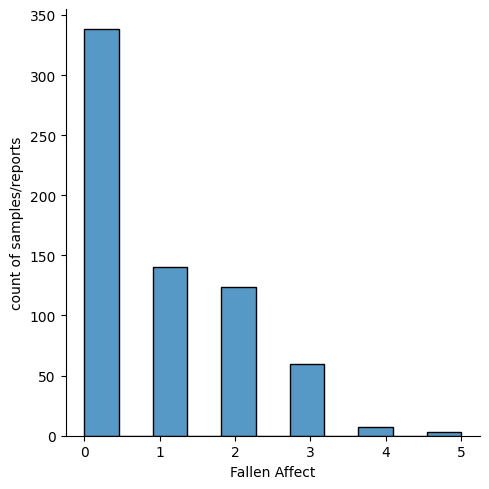

In [122]:
sns.displot(all_df[['Fallen Affect']], x='Fallen Affect')
plt.xlabel("Fallen Affect")
plt.ylabel("count of samples/reports");

So generally Fallen Affect tends to be low, with more than half of the samples apparently not having it at all, and it's quite rare for it to be high

In [123]:
all_df['Fallen Affect'].skew(), all_df['Fallen Affect'].kurtosis()

(0.9821716344140562, 0.13492086635498435)

In [124]:
dfit = distfit(n_boots=100)
results = dfit.fit_transform(all_df['Fallen Affect'])
dfit.summary[['name', 'score', 'bootstrap_score', 'bootstrap_pass']]

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.13 sec] [RSS: 0.95] [loc=0.909 scale=1.096]
[distfit] >INFO> [expon     ] [0.12 sec] [RSS: 0.503007] [loc=0.000 scale=0.909]
[distfit] >INFO> [pareto    ] [0.22 sec] [RSS: 0.503007] [loc=-33554432.000 scale=33554432.000]
[distfit] >INFO> [dweibull  ] [1.18 sec] [RSS: 0.748284] [loc=0.712 scale=1.027]
[distfit] >INFO> [t         ] [9.74 sec] [RSS: 1.63815] [loc=0.000 scale=0.000]
[distfit] >INFO> [genextreme] [11.6 sec] [RSS: 1.201] [loc=0.002 scale=0.011]
[distfit] >INFO> [gamma     ] [4.63 sec] [RSS: 0.524249] [loc=-0.000 scale=0.691]
[distfit] >INFO> [lognorm   ] [0.04 sec] [RSS: 1.63133] [loc=-0.000 scale=0.000]
[distfit] >INFO> [beta      ] [6.31 sec] [RSS: 0.528039] [loc=-0.000 scale=8.405]
[distfit] >INFO> [uniform   ] [0.12 sec] [RSS: 1.19852] [loc=0.000 scale=5.000]
[distfit] >INFO> [loggamma  ] [3.47 sec] [RSS: 0.953625] [loc=-302.138 scale=42.009]
[distfit] >INFO> [norm      ] [37.6 sec] [RSS: 0.

name     score bootstrap_score bootstrap_pass
0   genextreme  1.201004            0.03          False
1       pareto  0.503007             0.0          False
2        expon  0.503007             0.0          False
3        gamma  0.524249             0.0          False
4         beta  0.528039             0.0          False
5     dweibull  0.748284             0.0          False
6         norm      0.95             0.0          False
7     loggamma  0.953625             0.0          False
8      uniform   1.19852             0.0          False
9      lognorm  1.631335               0           None
10           t  1.638153             0.0          False

[distfit] >INFO> Ploting Summary.
[distfit] >INFO> Bootstrap results are included..


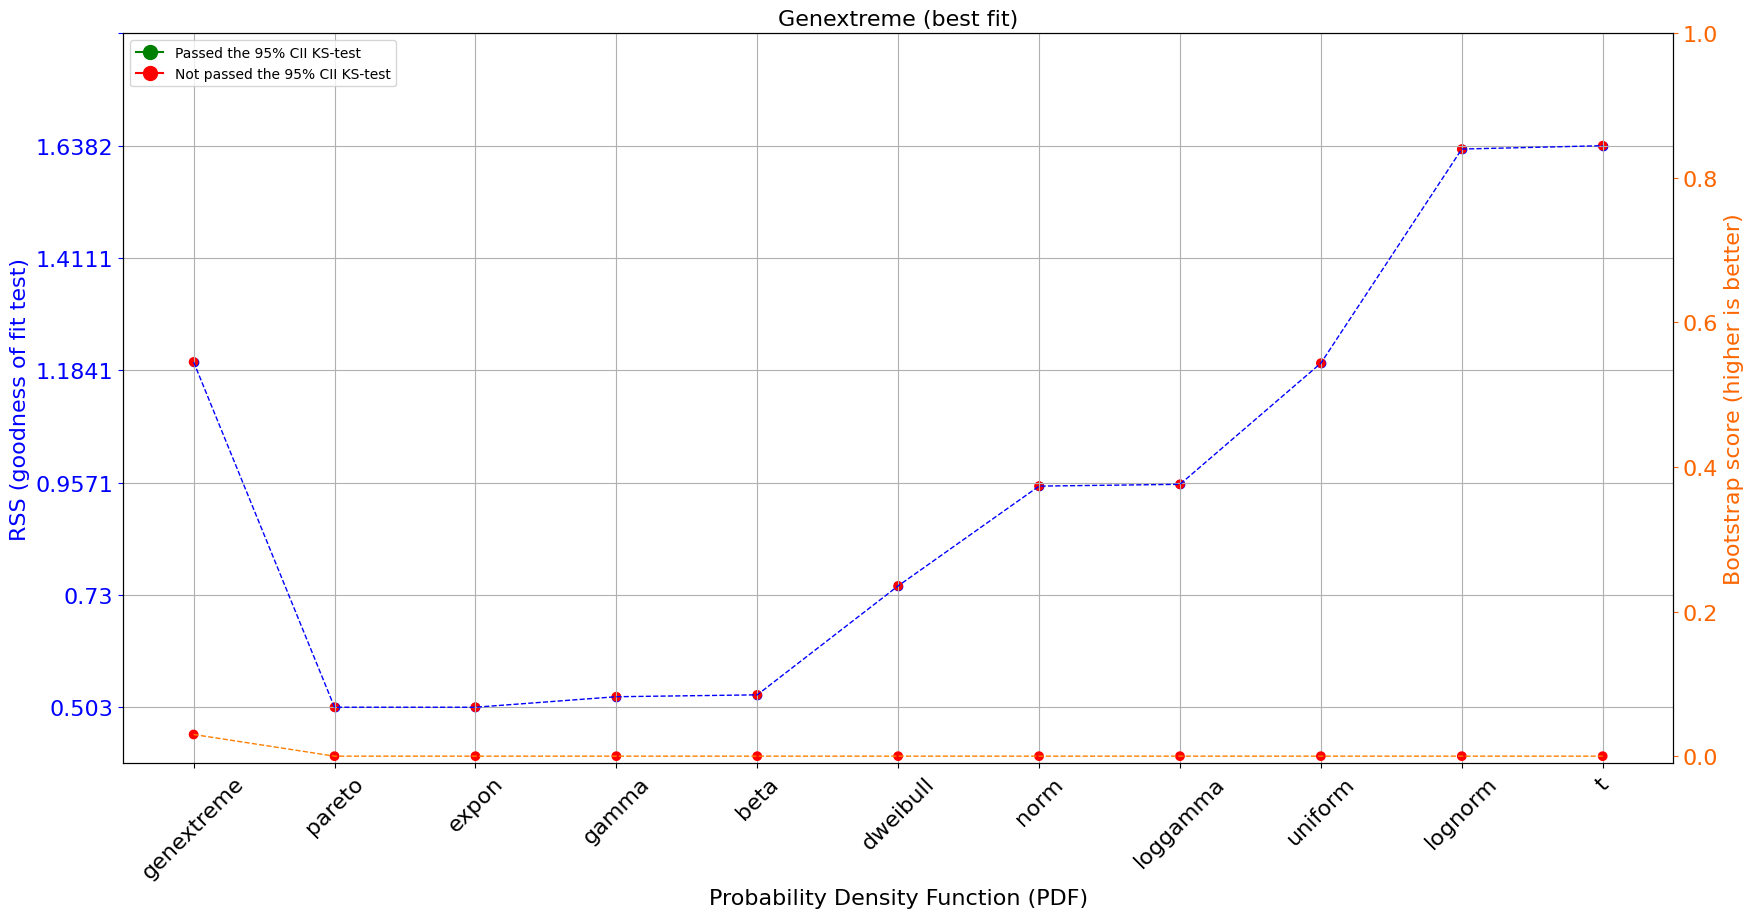

In [125]:
dfit.plot_summary();

In this case the closer distributions are pareto and exponential, which makes sense with how skewed it is, but it still was found to ultimately be not very close to such distributions.

In [126]:
dfit = distfit(n_boots=100, distr='full')
results = dfit.fit_transform(all_df['Fallen Affect'])
dfit.summary[['name', 'score', 'bootstrap_score', 'bootstrap_pass']]

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [alpha          ] [2.48 sec] [RSS: 1.63852] [loc=-0.000 scale=0.000]
[distfit] >INFO> [anglit         ] [0.54 sec] [RSS: 0.973521] [loc=1.108 scale=2.818]
[distfit] >INFO> [arcsine        ] [2.46 sec] [RSS: 1.00553] [loc=-0.000 scale=5.152]
[distfit] >INFO> [beta           ] [6.48 sec] [RSS: 0.528039] [loc=-0.000 scale=8.405]
[distfit] >INFO> [betaprime      ] [6.67 sec] [RSS: 0.46879] [loc=-0.000 scale=1.292]
[distfit] >INFO> [bradford       ] [3.02 sec] [RSS: 0.876343] [loc=-0.000 scale=5.000]
[distfit] >INFO> [burr           ] [14.9 sec] [RSS: 0.522369] [loc=-0.000 scale=1.075]
[distfit] >INFO> [cauchy         ] [0.47 sec] [RSS: 1.63852] [loc=0.000 scale=0.000]
[distfit] >INFO> [chi            ] [5.18 sec] [RSS: 0.938435] [loc=-0.000 scale=2.678]
[distfit] >INFO> [chi2           ] [4.41 sec] [RSS: 0.614558] [loc=-0.000 scale=1.307]
[distfit] >INFO> [cosine         ] [0.63 sec] [RSS: 1.04165] [loc=1.273 scale=1.208]
[di

name     score bootstrap_score bootstrap_pass
0   invweibull    1.5158            0.99           True
1        alpha   1.63852            0.96           True
2     powerlaw  1.607941            0.85           True
3     invgamma  1.638516            0.75           True
4    johnsonsu  1.638514            0.48           True
..         ...       ...             ...            ...
75  wrapcauchy   1.63852             0.0          False
76      cauchy   1.63852             0.0          False
77    nakagami  2.467926             0.0          False
78   powernorm       NaN               0           None
79         NaN       NaN             NaN            NaN

[80 rows x 4 columns]

In [127]:
dfit.summary[['name', 'score', 'bootstrap_score', 'bootstrap_pass']].head(15)

name     score bootstrap_score bootstrap_pass
0     invweibull    1.5158            0.99           True
1          alpha   1.63852            0.96           True
2       powerlaw  1.607941            0.85           True
3       invgamma  1.638516            0.75           True
4      johnsonsu  1.638514            0.48           True
5    weibull_max  0.785125            0.35           True
6      johnsonsb  1.589308            0.34           True
7     foldcauchy   1.63852            0.17           True
8   powerlognorm  1.098524            0.11           True
9      genpareto  1.638512             0.1           True
10      exponpow  0.592479            0.05          False
11   halfgennorm  0.587133            0.04          False
12   fatiguelife  0.774379            0.04          False
13    genextreme  1.201004            0.03          False
14          levy   1.63852            0.02          False

[distfit] >INFO> Ploting Summary.
[distfit] >INFO> Bootstrap results are included..


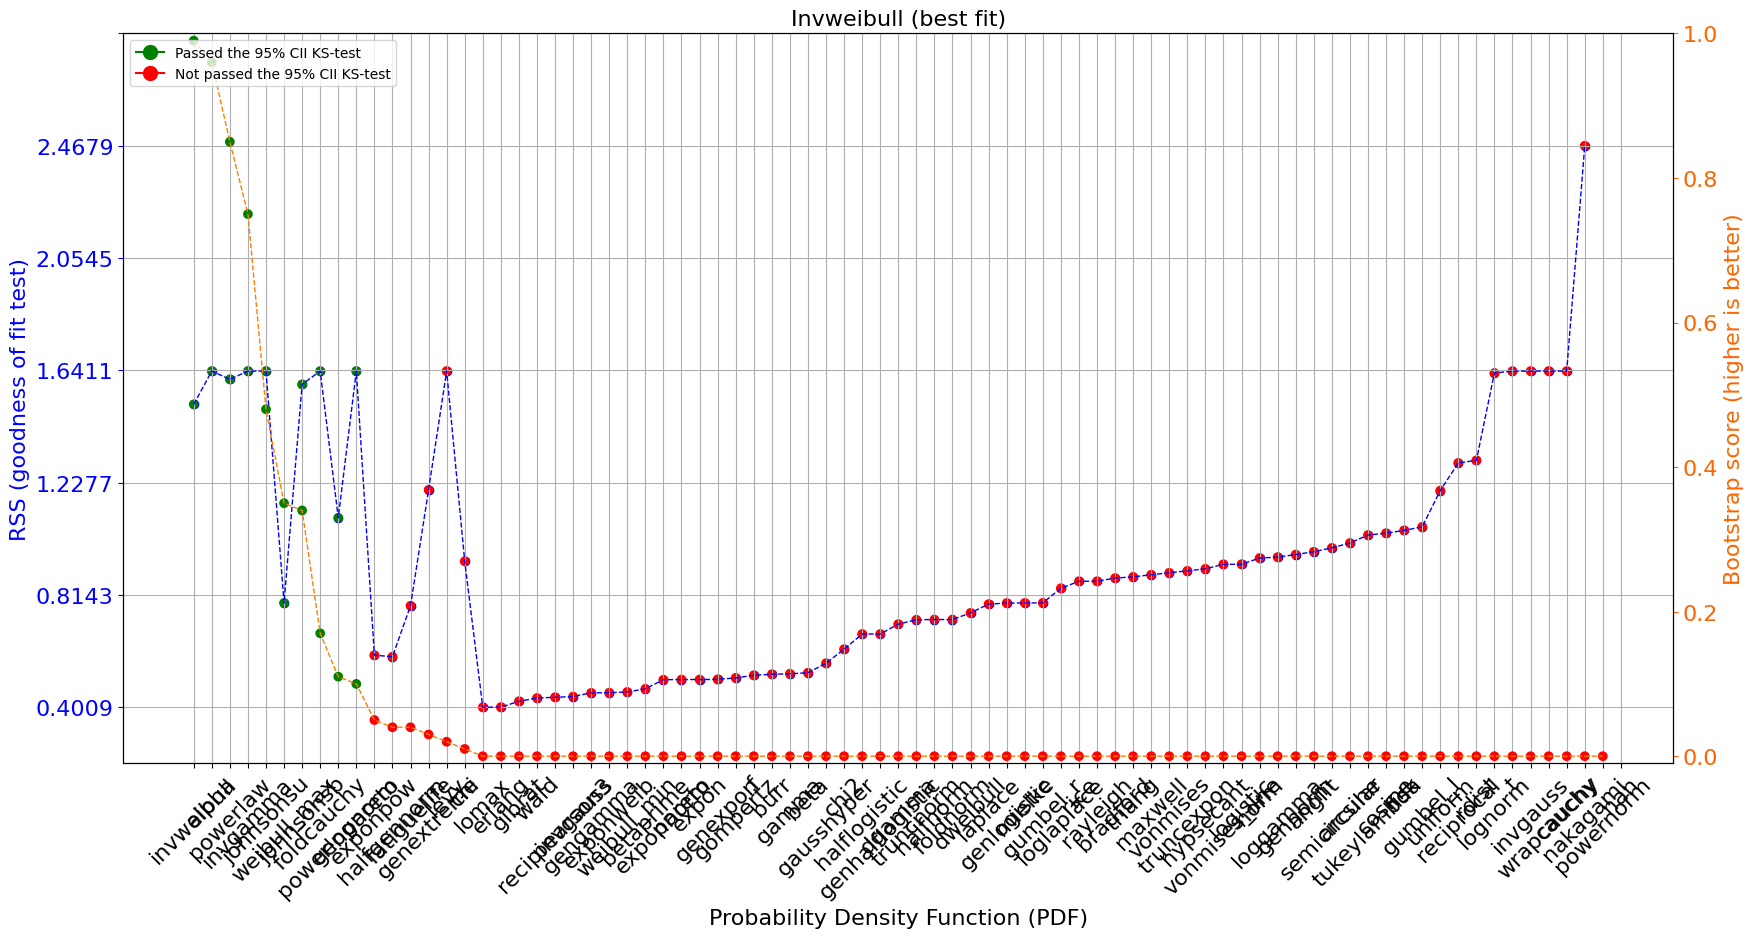

In [128]:
dfit.plot_summary();

[distfit] >INFO> Create PDF plot for the parametric method.
[distfit] >INFO> Estimated distribution: Invweibull(loc:-0.000000, scale:0.000000)
[distfit] >INFO> Create PDF plot for the parametric method.
[distfit] >INFO> Estimated distribution: Invweibull(loc:-0.000000, scale:0.000000)


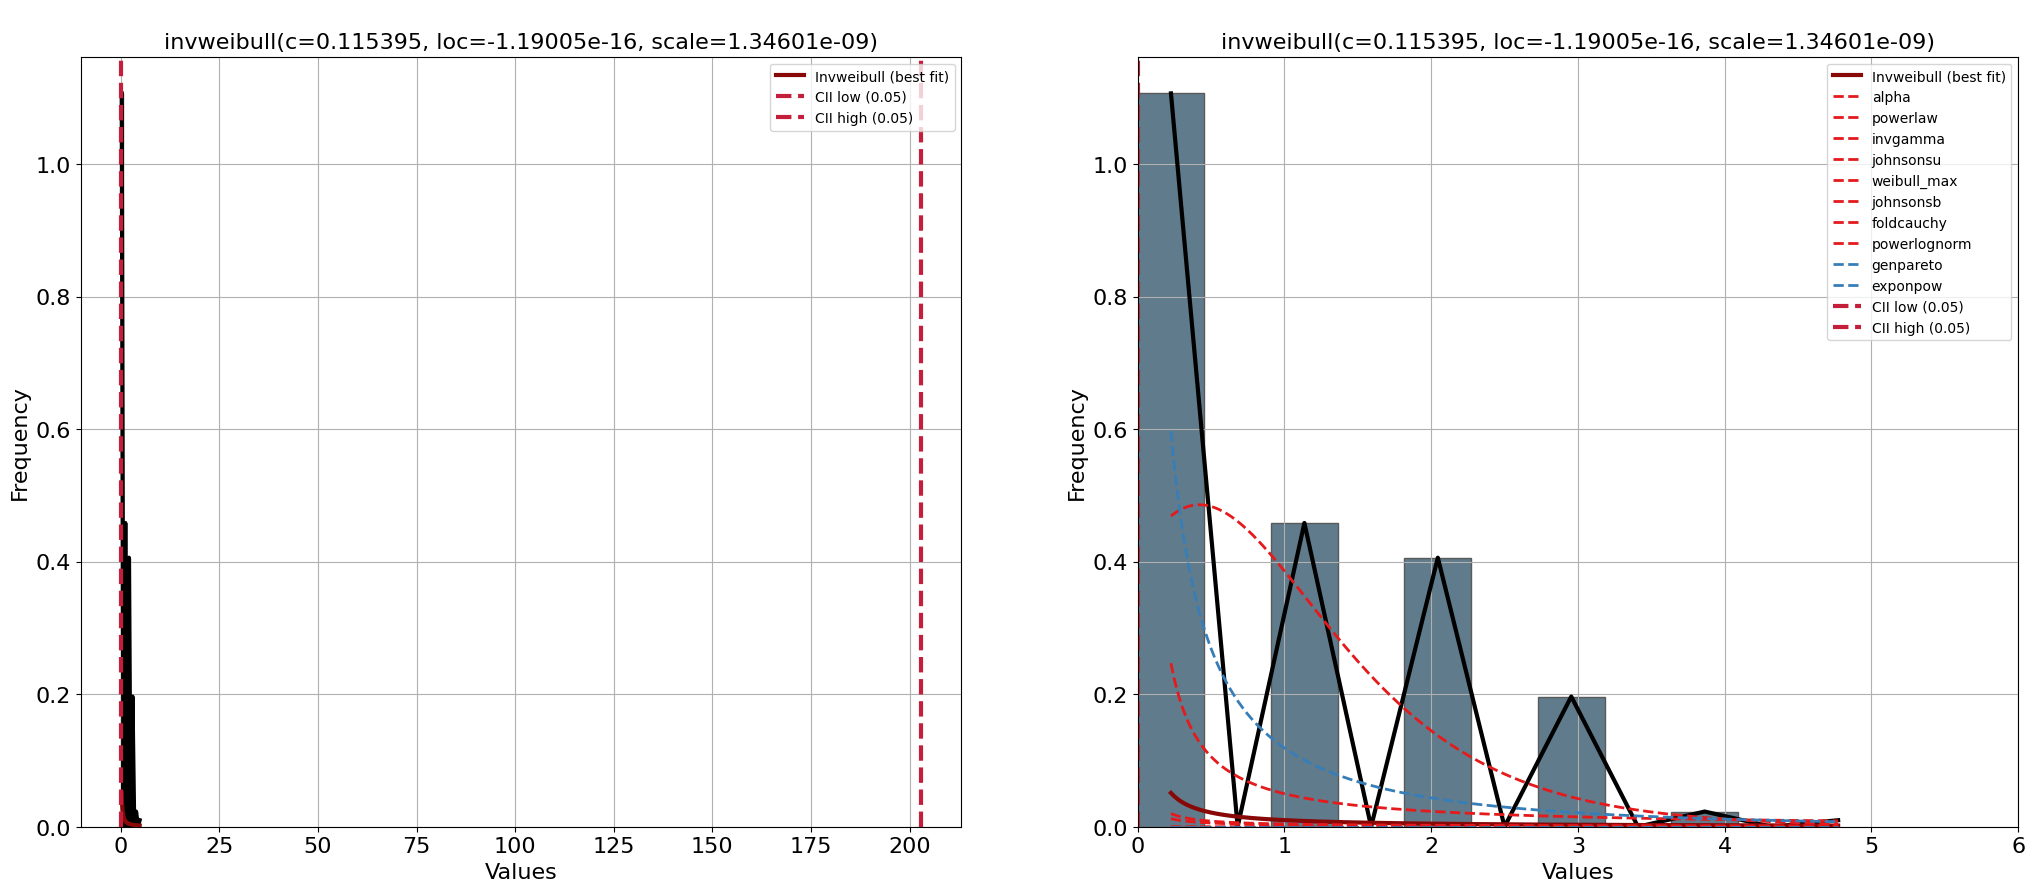

In [150]:
# Create subplot
fig, ax = plt.subplots(1,2, figsize=(25, 10))
# Plot PDF with histogram
dfit.plot(chart='PDF', ax=ax[0])
# Plot the CDF
dfit.plot(chart='PDF', n_top=10, ax=ax[1])
plt.xlim(0, 6);

The only distributions that look even kind of reasonable according to the fit are weibull_max and exponpow, even then it's questionable but I'm not sure the distribution needs to be characterized in continuous terms like this anyways. We might also just create a binomial distribution and keep it discrete if we need that.

Next we'll do Rigid Energetic Toll signals:

## Rigid Signals <a id="Rigid"></a>

In [151]:
all_df.loc[:,'R1 Rigid Posture':'R5 Subordinate Fluidity'].describe()

R1 Rigid Posture  R2 Face Centric  R3 Punctuated Motions  \
count        672.000000       672.000000             672.000000   
mean           3.069940         3.025298               3.142857   
std            2.692849         2.617882               2.255077   
min            0.000000         0.000000               0.000000   
25%            0.000000         0.000000               2.000000   
50%            2.000000         2.000000               2.000000   
75%            4.000000         4.000000               4.000000   
max            7.000000         7.000000               7.000000   

       R4 Vertical Movements  R5 Subordinate Fluidity  
count             672.000000               672.000000  
mean                3.235119                 1.858631  
std                 2.276967                 2.489791  
min                 0.000000                 0.000000  
25%                 2.000000                 0.000000  
50%                 4.000000                 0.000000  
75%                 4.000000                 4.000000  
max                 7.000000                 7.000000

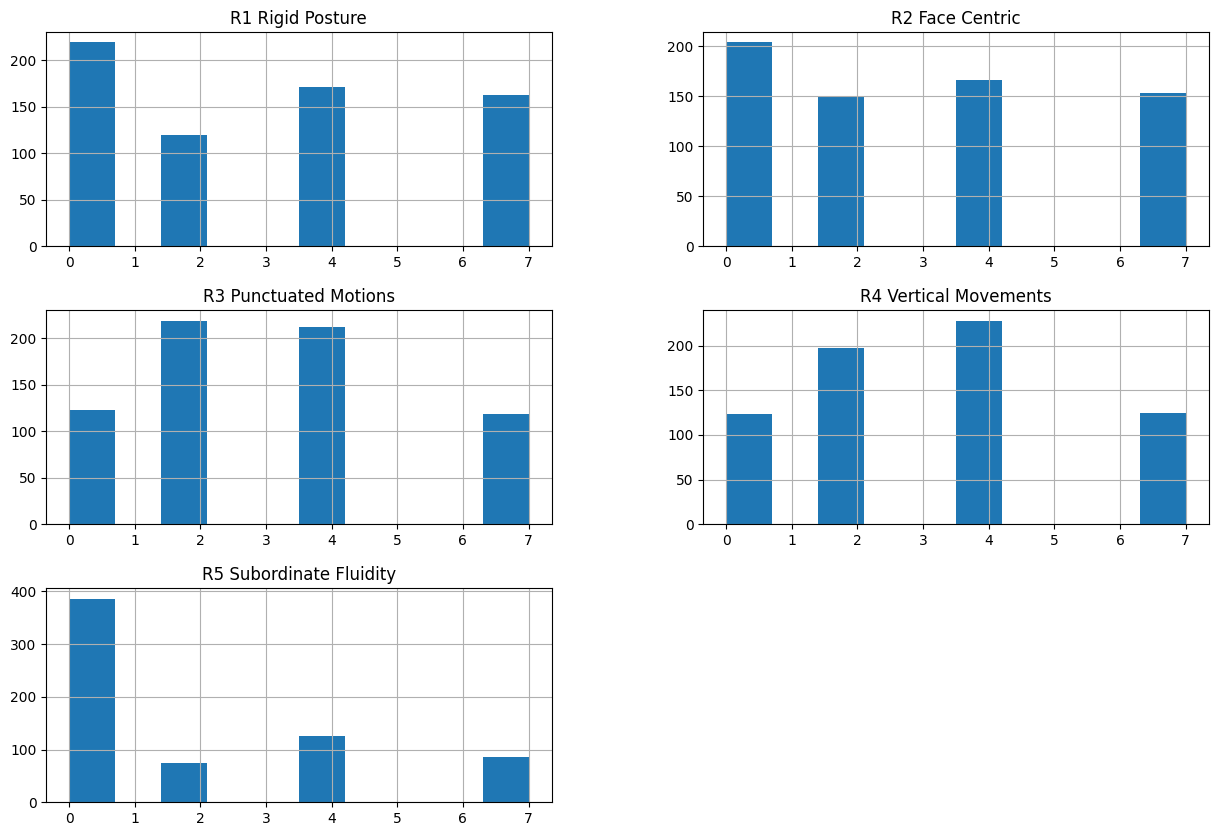

In [152]:
all_df.loc[:,'R1 Rigid Posture':'R5 Subordinate Fluidity'].hist(figsize=(15, 10));

There isn't a lot that's noteworthy here, but Subordinate Fluidity does seem marked notably less than the other signals (perhaps because it is indirect and harder to understand). Some like Punctuated and Vertical movements are marked more as middle values, whereas Rigid Posture and Face Centric have more extreme values.

## Fluid Signals <a id="Fluid"></a>

In [153]:
all_df.loc[:,'F1 Fluid Posture':'F5 Subordinate Rigidity'].describe()

F1 Fluid Posture  F2 Eye Centric  F3 Gliding Motions  \
count        672.000000      672.000000          672.000000   
mean           3.373512        3.400298            3.230655   
std            2.522403        2.638509            2.160218   
min            0.000000        0.000000            0.000000   
25%            2.000000        2.000000            2.000000   
50%            4.000000        4.000000            4.000000   
75%            4.000000        7.000000            4.000000   
max            7.000000        7.000000            7.000000   

       F4 Horizontal Movements  F5 Subordinate Rigidity  
count               672.000000               672.000000  
mean                  3.599702                 2.364583  
std                   2.310257                 2.625019  
min                   0.000000                 0.000000  
25%                   2.000000                 0.000000  
50%                   4.000000                 2.000000  
75%                   4.000000                 4.000000  
max                   7.000000                 7.000000

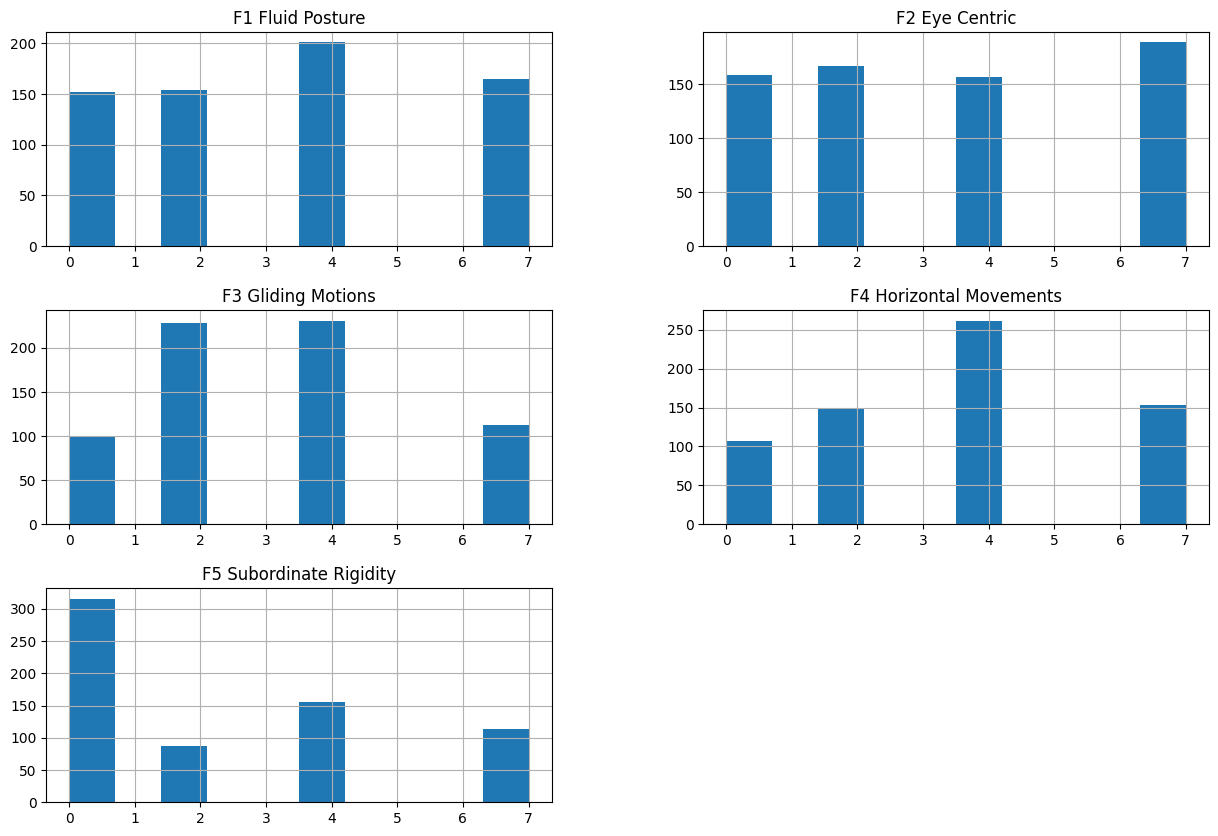

In [154]:
all_df.loc[:,'F1 Fluid Posture':'F5 Subordinate Rigidity'].hist(figsize=(15, 10));

As with last time, Subordinate Rigidity is marked the lowest, but not to the same degree as Subordinate Rigidity. Also even more of the Fluid signals tend towards middle values, also Eye Centric is still a bit weighted to extremes

## Pe Signals <a id="Pe"></a>

In [155]:
all_df.loc[:,'PF1 Restless Momentum':'PF5 Alert Perk Ups'].describe()

PF1 Restless Momentum  PF2 Toggling Eyes  PF3 Body Swaying  \
count              672.00000         672.000000        672.000000   
mean                 2.93006           3.950893          3.535714   
std                  2.24030           2.202620          2.307618   
min                  0.00000           0.000000          0.000000   
25%                  2.00000           2.000000          2.000000   
50%                  2.00000           4.000000          4.000000   
75%                  4.00000           7.000000          4.000000   
max                  7.00000           7.000000          7.000000   

       PF4 Casual Hands  PF5 Alert Perk Ups  
count        672.000000          672.000000  
mean           3.610119            2.901786  
std            2.445182            2.279801  
min            0.000000            0.000000  
25%            2.000000            2.000000  
50%            4.000000            2.000000  
75%            7.000000            4.000000  
max            7.000000            7.000000

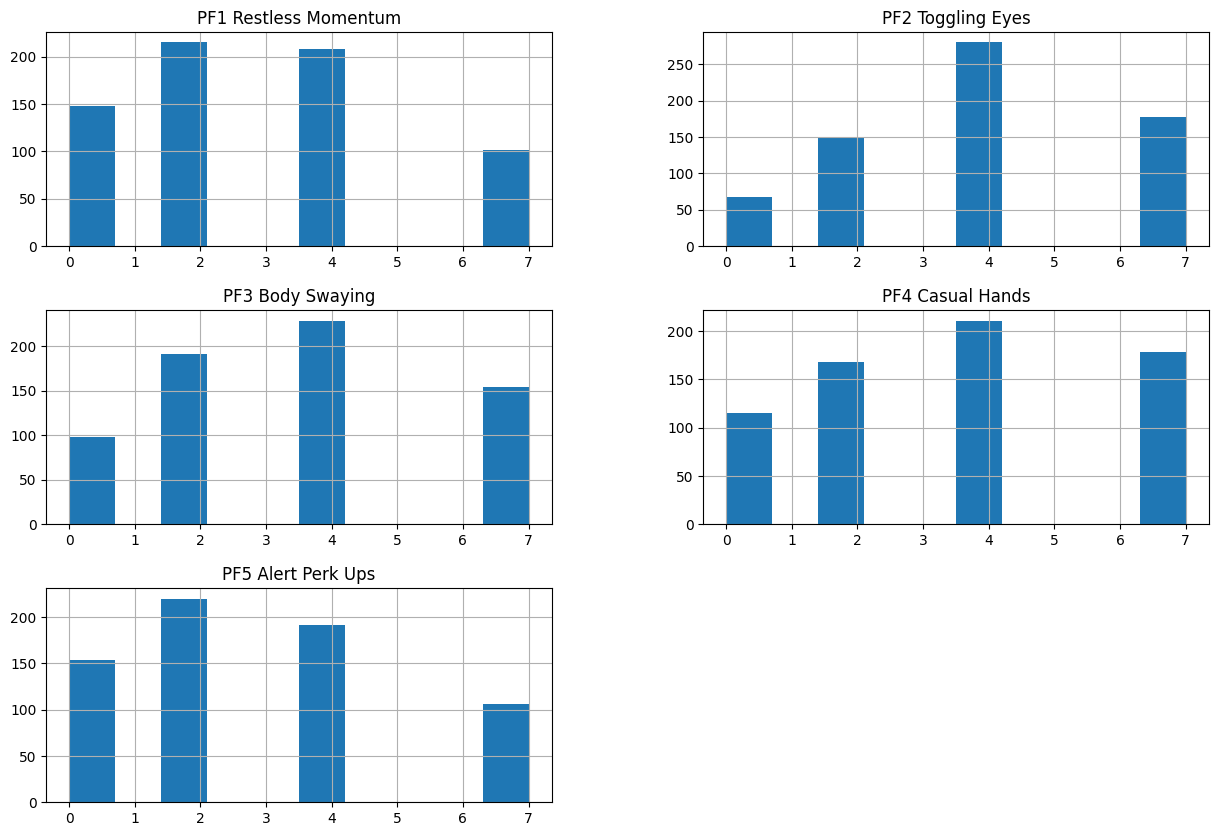

In [156]:
all_df.loc[:,'PF1 Restless Momentum':'PF5 Alert Perk Ups'].hist(figsize=(15, 10));

For all of these signals, there is a tendency towards middle values, and you can tell whether they are a more less common signal but looking at the tendencies of the bars as well (Alert Perk Ups and Restless Momentum are less common, the other 3 are more common)

## Pi Signals <a id="Pi"></a>

In [157]:
all_df.loc[:,'RF1 Viscous Inertia':'RF5 Narrow Head Zoning'].describe()

RF1 Viscous Inertia  RF2 Fixed Gaze  RF3 Diagonal Eye Drifts  \
count           672.000000      672.000000               672.000000   
mean              2.116071        2.650298                 2.986607   
std               2.379416        2.385007                 2.151795   
min               0.000000        0.000000                 0.000000   
25%               0.000000        0.000000                 2.000000   
50%               2.000000        2.000000                 2.000000   
75%               4.000000        4.000000                 4.000000   
max               7.000000        7.000000                 7.000000   

       RF4 Searching Scowling  RF5 Narrow Head Zoning  
count              672.000000              672.000000  
mean                 2.011905                2.299107  
std                  1.975221                2.460078  
min                  0.000000                0.000000  
25%                  0.000000                0.000000  
50%                  2.000000                2.000000  
75%                  4.000000                4.000000  
max                  7.000000                7.000000

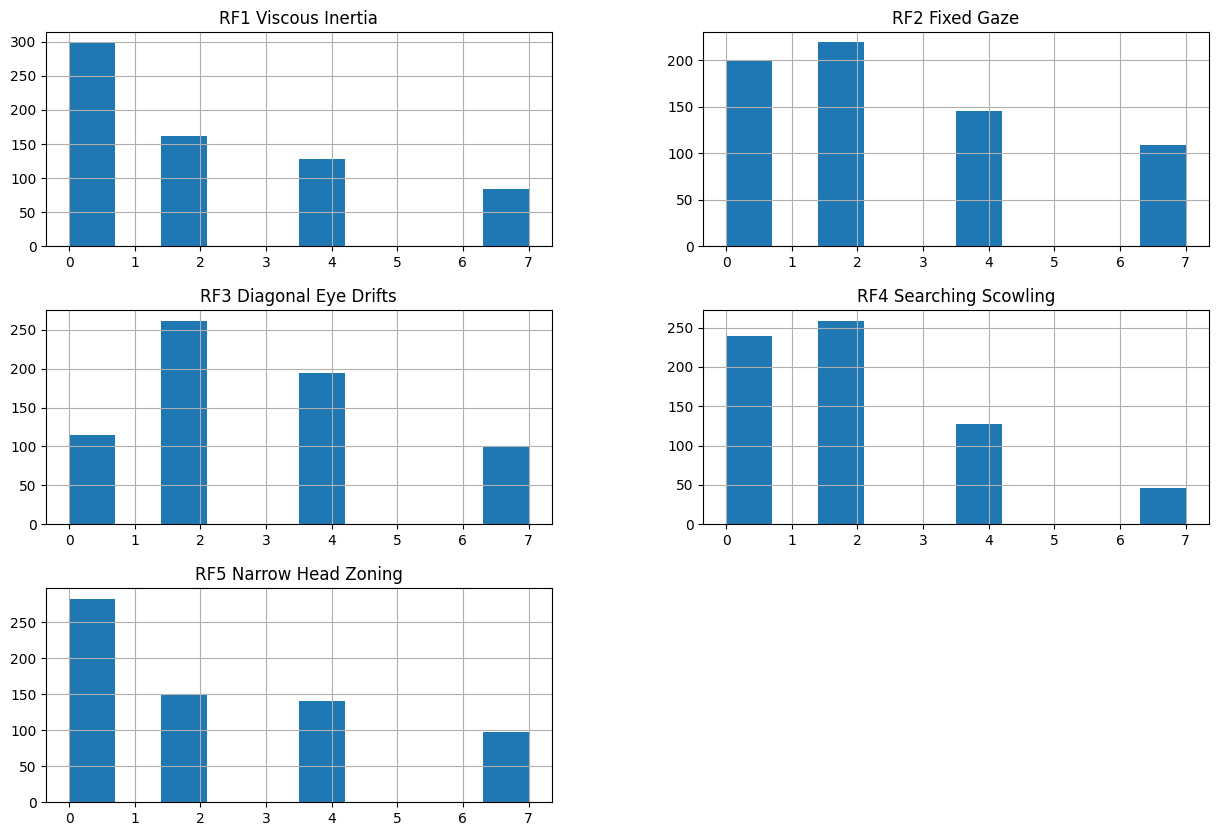

In [158]:
all_df.loc[:,'RF1 Viscous Inertia':'RF5 Narrow Head Zoning'].hist(figsize=(15, 10));

It's noteworthy that a lot of these signals have a tendency to occur less, which could just be because introverts and introverted development are rarer among celebrities. They either tend to be low or tend towards middle values.

## Je Signals <a id="Je"></a>

In [159]:
all_df.loc[:,'PR1 Head Pushes':'PR5 Projecting Hands'].describe()

PR1 Head Pushes  PR2 Head Shakes  PR3 Shoulder Shrugs  \
count       672.000000       672.000000           672.000000   
mean          3.690476         3.407738             1.913690   
std           2.281794         2.124402             1.673406   
min           0.000000         0.000000             0.000000   
25%           2.000000         2.000000             0.000000   
50%           4.000000         4.000000             2.000000   
75%           7.000000         4.000000             2.000000   
max           7.000000         7.000000             7.000000   

       PR4 Fluent Articulation  PR5 Projecting Hands  
count               672.000000            672.000000  
mean                  3.875000              4.291667  
std                   2.234234              2.377501  
min                   0.000000              0.000000  
25%                   2.000000              2.000000  
50%                   4.000000              4.000000  
75%                   4.750000              7.000000  
max                   7.000000              7.000000

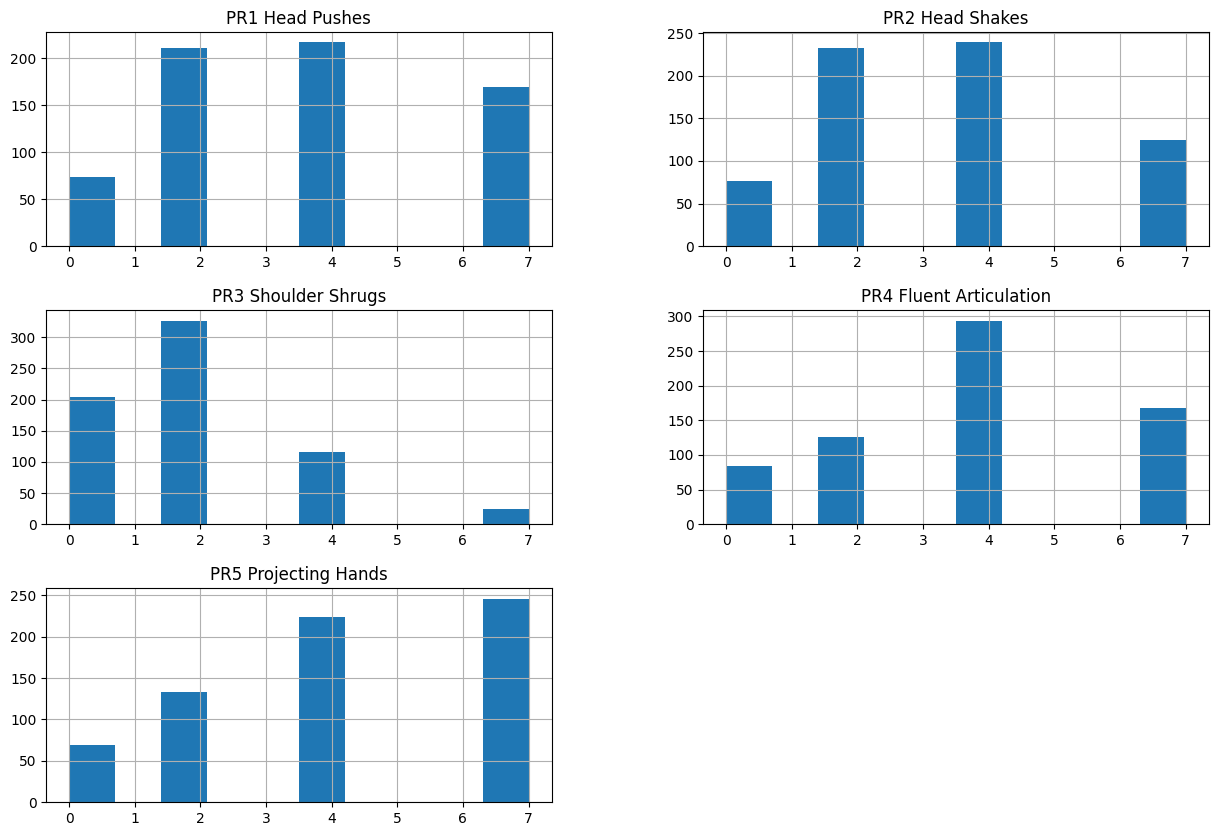

In [160]:
all_df.loc[:,'PR1 Head Pushes':'PR5 Projecting Hands'].hist(figsize=(15, 10));

Predictably, Je signals tend to be higher than Pi signals, and some like Projecting Hands have a strong tendency towards high values. Shoulder Shrugs is notably low, however, and the Head signals tend towards middle values

## Ji Signals <a id="Ji"></a>

In [161]:
all_df.loc[:,'RR1 Poised Receding':'RR5 Meticulous Hands'].describe()

RR1 Poised Receding  RR2 Disengaging Eyes  RR3 Exerted Pushes  \
count            672.00000            672.000000          672.000000   
mean               2.44494              3.041667            1.720238   
std                2.45980              2.354826            1.879930   
min                0.00000              0.000000            0.000000   
25%                0.00000              2.000000            0.000000   
50%                2.00000              2.000000            2.000000   
75%                4.00000              4.000000            2.000000   
max                7.00000              7.000000            7.000000   

       RR4 Momentum Halting  RR5 Meticulous Hands  
count            672.000000            672.000000  
mean               2.017857              3.492560  
std                1.800723              2.364026  
min                0.000000              0.000000  
25%                0.000000              2.000000  
50%                2.000000              4.000000  
75%                2.000000              4.000000  
max                7.000000              7.000000

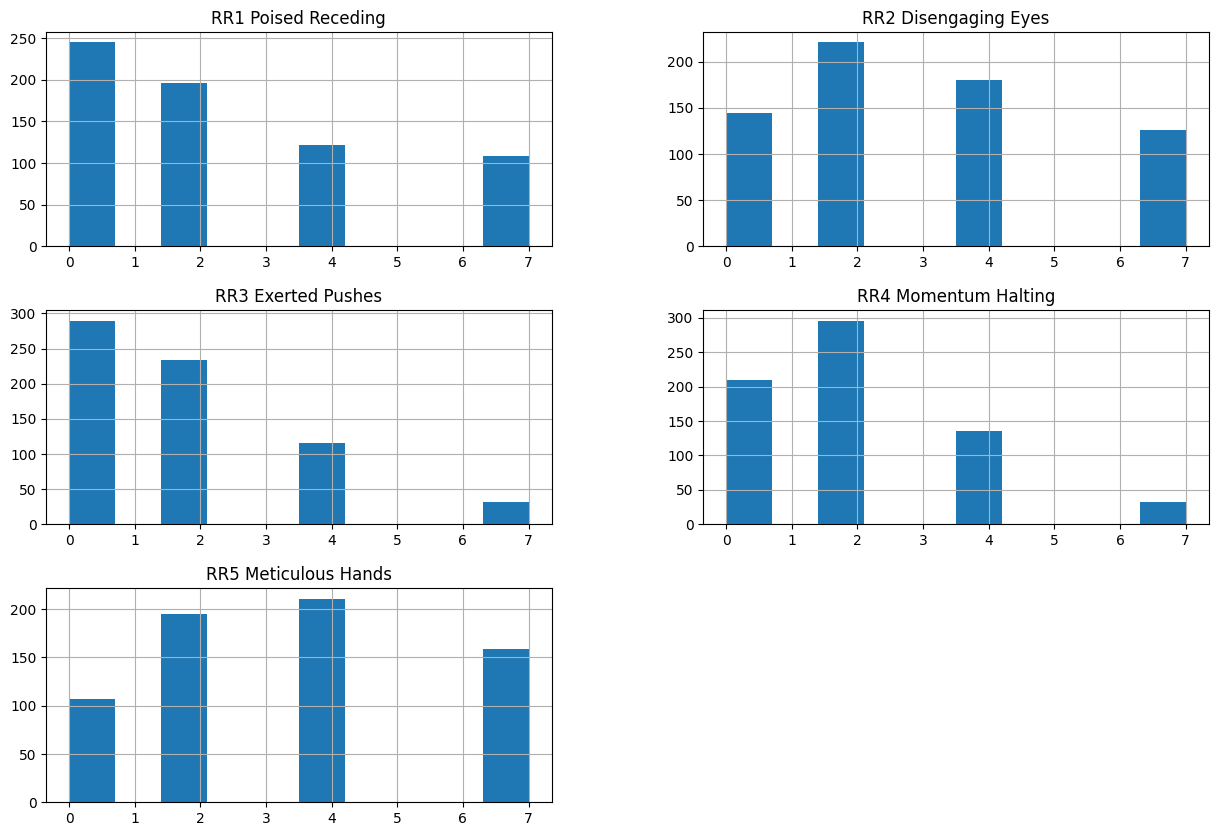

In [162]:
all_df.loc[:,'RR1 Poised Receding':'RR5 Meticulous Hands'].hist(figsize=(15, 10));

Predictably as introverted signals these tend to be lower, but Meticulous Hands is notably high (though it also has a middle tendency). Momentum Halting, Poised Receding, and especially Exerted Pushes are quite low

## Candid Signals <a id="Candid"></a>

In [163]:
all_df.loc[:,'CA1 Taut Nasolabial Area':'CA9 Grasping Hands'].describe()

CA1 Taut Nasolabial Area  CA2 Vertical Snarling Smiles  \
count                672.000000                    672.000000   
mean                   2.574405                      2.205357   
std                    2.280050                      2.536664   
min                    0.000000                      0.000000   
25%                    0.000000                      0.000000   
50%                    2.000000                      2.000000   
75%                    4.000000                      4.000000   
max                    7.000000                      7.000000   

       CA3 Four Point Pulling  CA4 Wobbling Lips  CA5 Asymmetrical Smirks  \
count              672.000000         672.000000               672.000000   
mean                 2.638393           2.525298                 1.514881   
std                  2.511117           2.221548                 1.920883   
min                  0.000000           0.000000                 0.000000   
25%                  0.000000           0.000000                 0.000000   
50%                  2.000000           2.000000                 0.000000   
75%                  4.000000           4.000000                 2.000000   
max                  7.000000           7.000000                 7.000000   

       CA6 Sassy Movements  CA7 Plateau Velocity  CA8 Nasal Breathy Voice  \
count           672.000000            672.000000               672.000000   
mean              2.080357              2.302083                 1.502976   
std               2.294184              2.510686                 2.292343   
min               0.000000              0.000000                 0.000000   
25%               0.000000              0.000000                 0.000000   
50%               2.000000              2.000000                 0.000000   
75%               4.000000              4.000000                 2.000000   
max               7.000000              7.000000                 7.000000   

       CA9 Grasping Hands  
count          672.000000  
mean             1.093750  
std              1.779622  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              2.000000  
max              7.000000

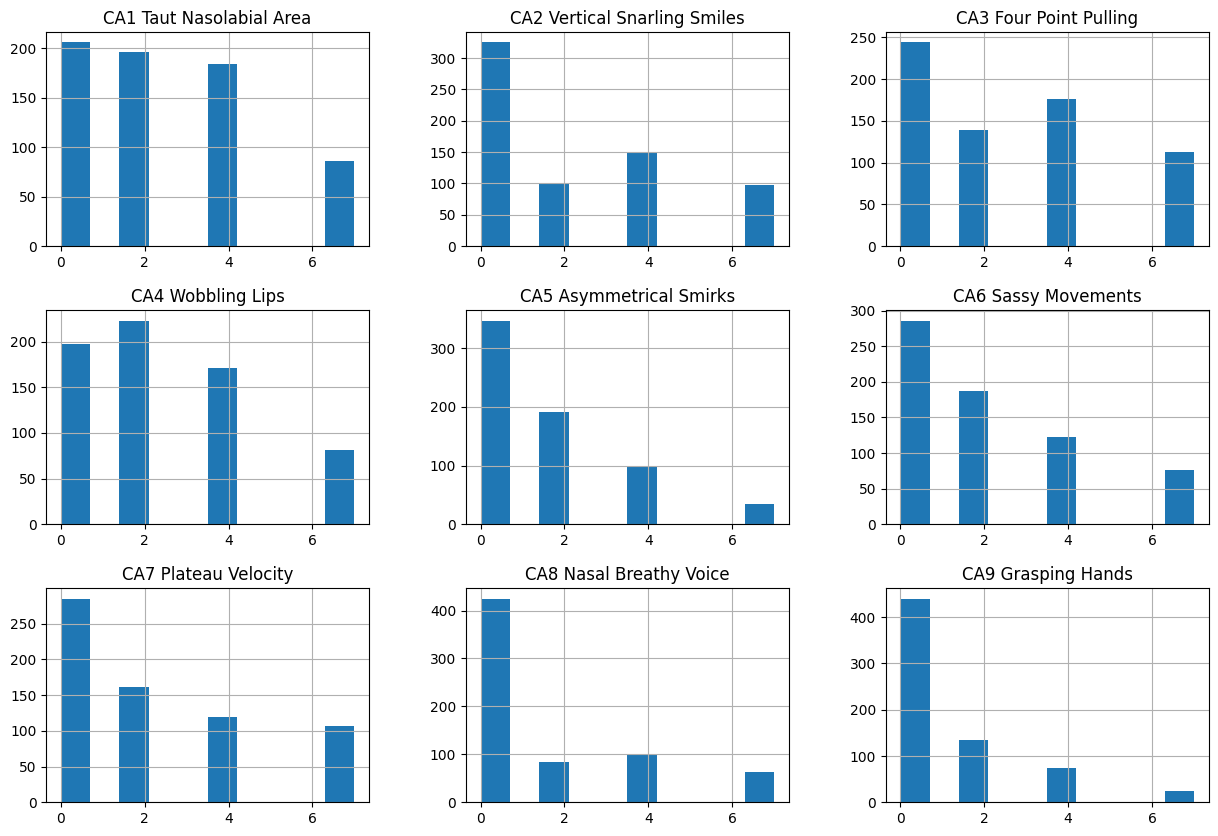

In [164]:
all_df.loc[:,'CA1 Taut Nasolabial Area':'CA9 Grasping Hands'].hist(figsize=(15, 10));

Most tend towards lower values, especially Grasping Hands, Nasal Breathy Voice and Asymmetrical Smirks. Wobbling Lips has the most middle tendency but is still low overall

## Measured Signals <a id="Measured"></a>

In [165]:
all_df.loc[:,'MS1 Lax Nasolabial Area':'MS9 Puppeteer Hands'].describe()

MS1 Lax Nasolabial Area  MS2 Horizontal Curtain Smiles  \
count               672.000000                     672.000000   
mean                  2.620536                       3.290179   
std                   2.600652                       2.889009   
min                   0.000000                       0.000000   
25%                   0.000000                       0.000000   
50%                   2.000000                       4.000000   
75%                   4.000000                       7.000000   
max                   7.000000                       7.000000   

       MS3 Two Point Pulling  MS4 Symmetrical Lips  \
count             672.000000            672.000000   
mean                2.977679              3.098214   
std                 2.721188              2.521301   
min                 0.000000              0.000000   
25%                 0.000000              0.000000   
50%                 2.000000              4.000000   
75%                 4.000000              4.000000   
max                 7.000000              7.000000   

       MS5 Emotional Neutralization  MS6 Coordinated Movements  \
count                    672.000000                 672.000000   
mean                       2.462798                   2.959821   
std                        2.360590                   2.353269   
min                        0.000000                   0.000000   
25%                        0.000000                   2.000000   
50%                        2.000000                   2.000000   
75%                        4.000000                   4.000000   
max                        7.000000                   7.000000   

       MS7 Parabolic Velocity  MS8 Laryngeal Faint Voice  MS9 Puppeteer Hands  
count              672.000000                 672.000000           672.000000  
mean                 3.340774                   2.556548             1.363095  
std                  2.637278                   2.677346             1.844719  
min                  0.000000                   0.000000             0.000000  
25%                  2.000000                   0.000000             0.000000  
50%                  4.000000                   2.000000             0.000000  
75%                  7.000000                   4.000000             2.000000  
max                  7.000000                   7.000000             7.000000

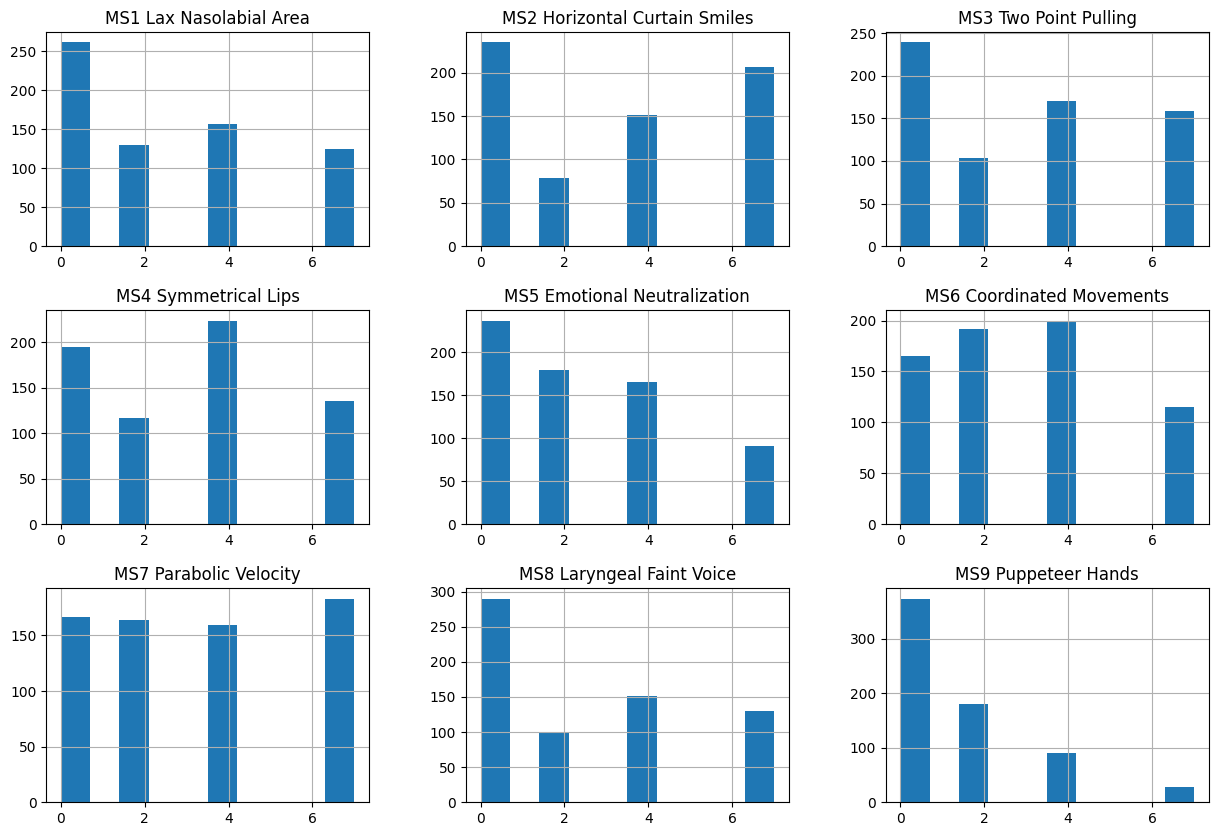

In [166]:
all_df.loc[:,'MS1 Lax Nasolabial Area':'MS9 Puppeteer Hands'].hist(figsize=(15, 10));

These tend to be a little higher than Candid signals, which makes sense since Beta and Alpha are collectively more common than Gamma and Delta in the study population. Still, they are mostly not very high, with some of the highest being Coordinated Movements and Symmetrical Lips which have a middle tendency overall. Puppeteer Hands tend to be quite low

## Grounded Signals <a id="Grounded"></a>

In [167]:
all_df.loc[:,'GR1 Taut Preseptal Area':'GR8 Bodily Awareness'].describe()

GR1 Taut Preseptal Area  GR2 Lax Pretarsal Area  GR3 Taut Outer Edges  \
count               672.000000              672.000000            672.000000   
mean                  3.200893                2.666667              3.589286   
std                   2.675684                2.385167              2.820154   
min                   0.000000                0.000000              0.000000   
25%                   0.000000                0.000000              0.000000   
50%                   4.000000                2.000000              4.000000   
75%                   7.000000                4.000000              7.000000   
max                   7.000000                7.000000              7.000000   

       GR4 Intense Scowling  GR5 Pointed Eye Toggles  \
count            672.000000               672.000000   
mean               1.755952                 3.203869   
std                2.243047                 2.484848   
min                0.000000                 0.000000   
25%                0.000000                 2.000000   
50%                0.000000                 4.000000   
75%                4.000000                 4.000000   
max                7.000000                 7.000000   

       GR6 Eye Head Parallel Motion  GR7 Grounding Effect  \
count                    672.000000            672.000000   
mean                       2.644345              2.086310   
std                        2.429329              2.264544   
min                        0.000000              0.000000   
25%                        0.000000              0.000000   
50%                        2.000000              2.000000   
75%                        4.000000              4.000000   
max                        7.000000              7.000000   

       GR8 Bodily Awareness  
count            672.000000  
mean               1.830357  
std                2.176511  
min                0.000000  
25%                0.000000  
50%                2.000000  
75%                2.000000  
max                7.000000

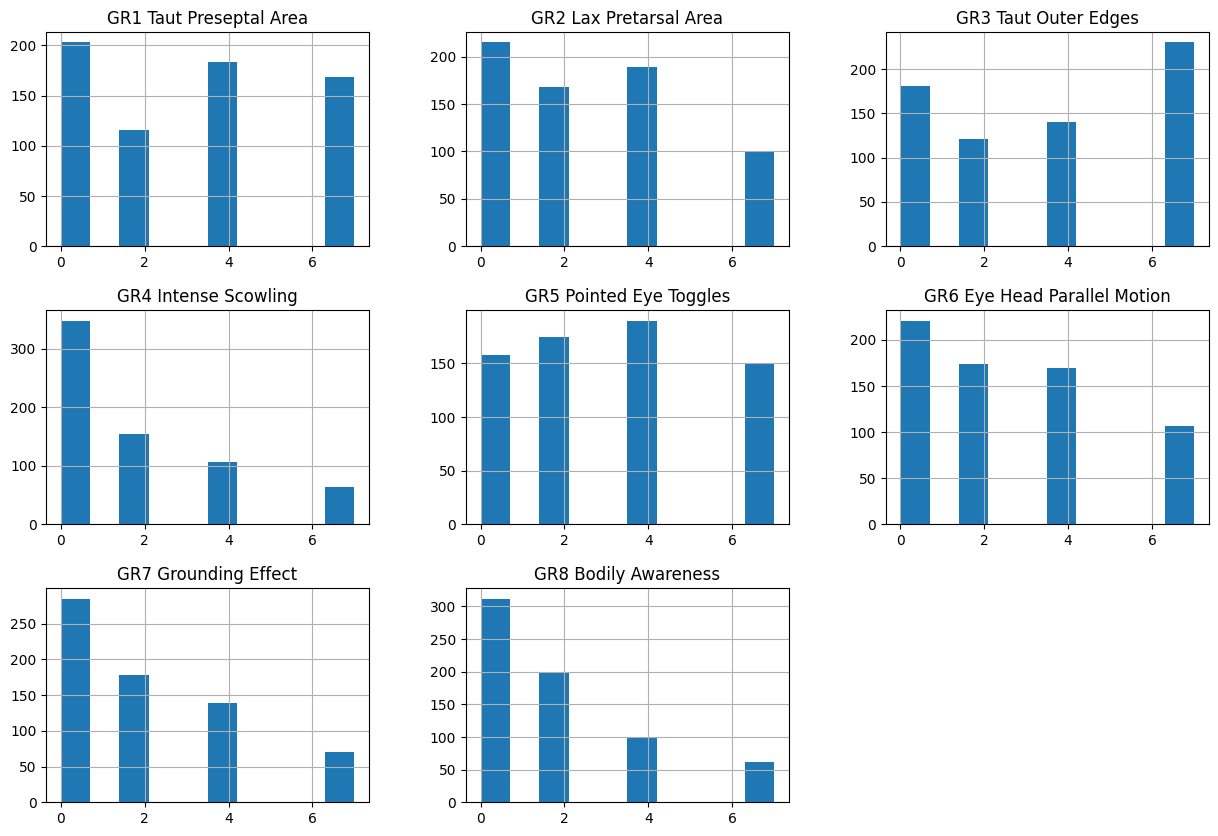

In [168]:
all_df.loc[:,'GR1 Taut Preseptal Area':'GR8 Bodily Awareness'].hist(figsize=(15, 10));

Grounded has the highest sample population, so it makes sense that some of these are high, like Taut Outer Edges and Pointed Eye Toggles. Some are still pretty low, like Intense Scowling and Bodily Awareness

## Suspended Signals <a id="Suspended"></a>

In [169]:
all_df.loc[:,'SU1 Lax Preseptal Area':'SU8 Quirky Skits'].describe()

SU1 Lax Preseptal Area  SU2 Taut Pretarsal Area  SU3 Lax Outer Edges  \
count              672.000000               672.000000           672.000000   
mean                 2.568452                 2.669643             2.111607   
std                  2.602547                 2.611068             2.563247   
min                  0.000000                 0.000000             0.000000   
25%                  0.000000                 0.000000             0.000000   
50%                  2.000000                 2.000000             0.000000   
75%                  4.000000                 4.000000             4.000000   
max                  7.000000                 7.000000             7.000000   

       SU4 Concerned Scowling  SU5 Brushstrokes Eye Toggles  \
count              672.000000                    672.000000   
mean                 2.004464                      2.041667   
std                  2.471593                      2.297810   
min                  0.000000                      0.000000   
25%                  0.000000                      0.000000   
50%                  0.000000                      2.000000   
75%                  4.000000                      4.000000   
max                  7.000000                      7.000000   

       SU6 Eye Head Trailing Motions  SU7 Levity Effect  SU8 Quirky Skits  
count                     672.000000         672.000000        672.000000  
mean                        0.936012           1.523810          0.986607  
std                         1.501241           2.044082          1.821743  
min                         0.000000           0.000000          0.000000  
25%                         0.000000           0.000000          0.000000  
50%                         0.000000           0.000000          0.000000  
75%                         2.000000           2.000000          2.000000  
max                         7.000000           7.000000          7.000000

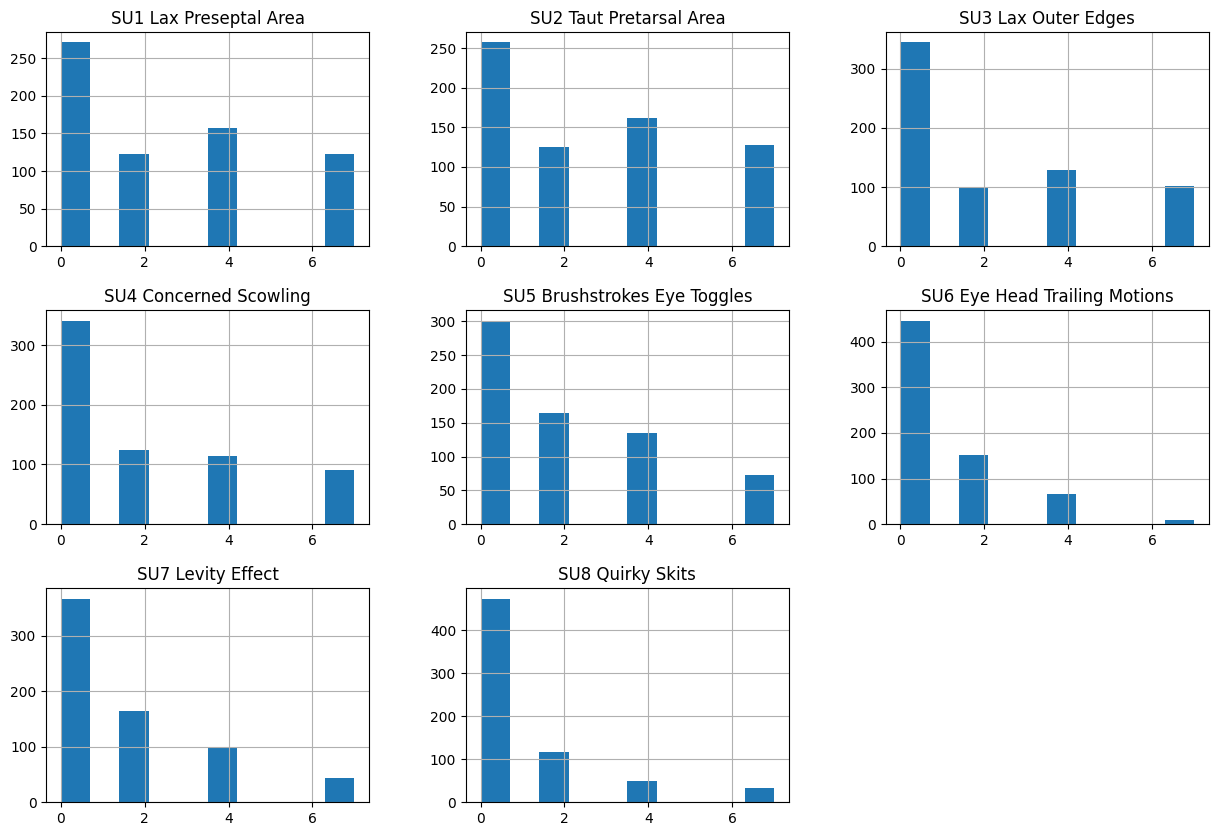

In [170]:
all_df.loc[:,'SU1 Lax Preseptal Area':'SU8 Quirky Skits'].hist(figsize=(15, 10));

Naturally these tend to be the lowest of the quadra signals just based on the study population, but some are extremely low like Eye Head Trailing Motions and Quirky Skits. None of them are particularly high at all

## Unguarded Signals <a id="Unguarded"></a>

In [171]:
all_df.loc[:,'EU1 Responsive Nodding':'EU3 Bashful Body Movements'].describe()

EU1 Responsive Nodding  EU2 Polite Smiling  EU3 Bashful Body Movements
count              672.000000          672.000000                  672.000000
mean                 2.236607            2.947917                    1.552083
std                  2.010175            2.200521                    2.014914
min                  0.000000            0.000000                    0.000000
25%                  0.000000            2.000000                    0.000000
50%                  2.000000            2.000000                    0.000000
75%                  4.000000            4.000000                    2.000000
max                  7.000000            7.000000                    7.000000

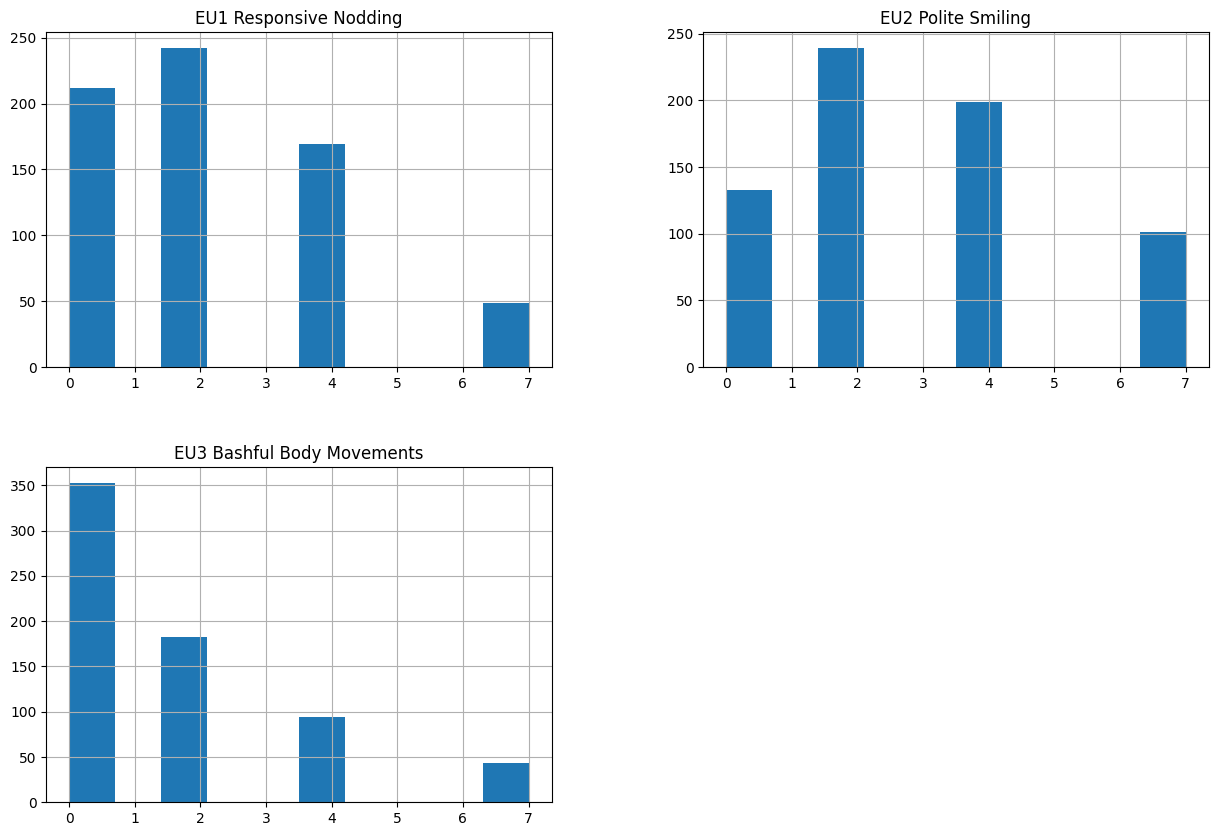

In [172]:
all_df.loc[:,'EU1 Responsive Nodding':'EU3 Bashful Body Movements'].hist(figsize=(15, 10));

Polite Smiling is the highest and tends towards the middle values, Bashful Body Movements are quite low

## Guarded Signals <a id="Guarded"></a>

In [173]:
all_df.loc[:,'EG1 Upset Mouth Tension':'EG3 Stern Expressions'].describe()

EG1 Upset Mouth Tension  EG2 Assertive Pushing  EG3 Stern Expressions
count               672.000000             672.000000             672.000000
mean                  1.197917               1.714286               2.241071
std                   1.700652               2.084340               2.130940
min                   0.000000               0.000000               0.000000
25%                   0.000000               0.000000               0.000000
50%                   0.000000               2.000000               2.000000
75%                   2.000000               2.500000               4.000000
max                   7.000000               7.000000               7.000000

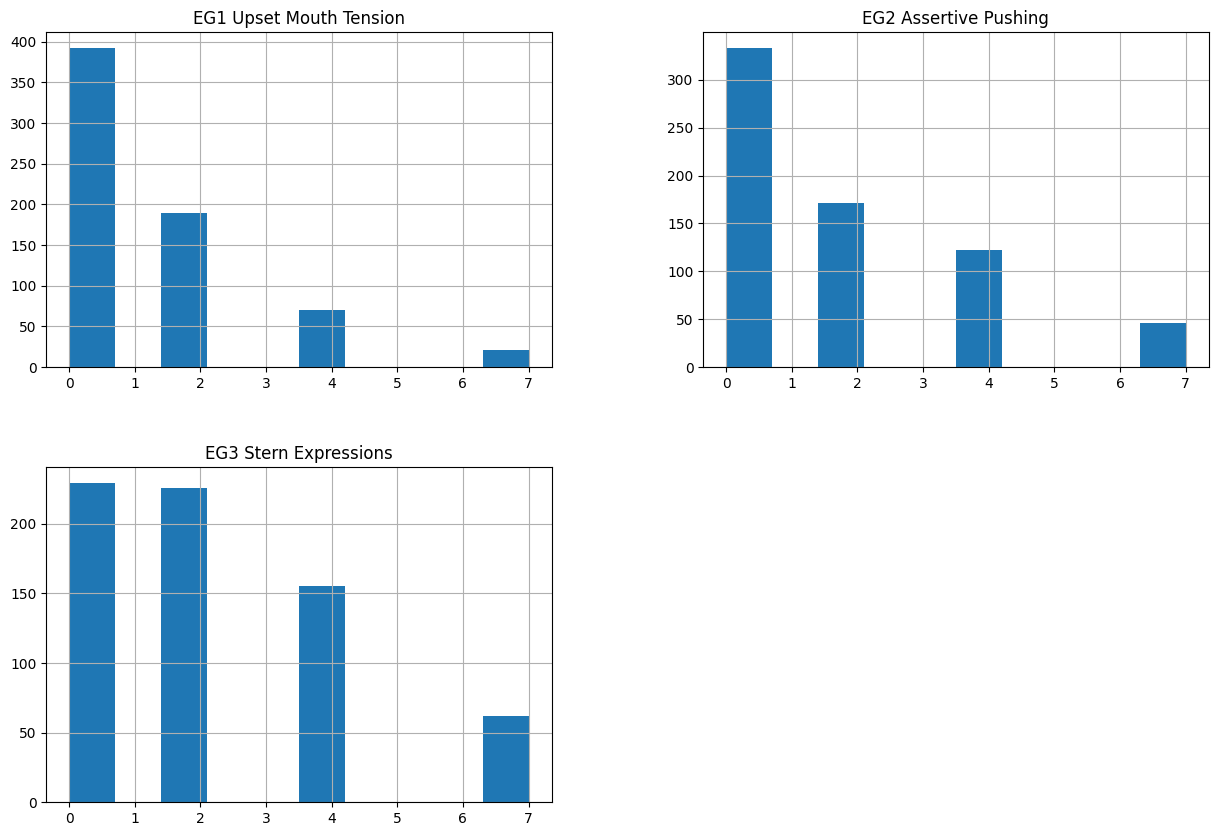

In [174]:
all_df.loc[:,'EG1 Upset Mouth Tension':'EG3 Stern Expressions'].hist(figsize=(15, 10));

These tend to be pretty low, but Stern Expressions is the highest and Upset Mouth Tension tends to be very low, perhaps Stern Expressions are interpreted more loosely and Upset Mouth Tension is a more distinctive and rare signal

## Saving the Data <a id="Saving"></a>

In [175]:
all_df.to_csv('../Data/posts_2024-12-29_CleanData.csv')

I another notebook I remembered to remove the old 'J Signal Mixing' and 'P Signal Mixing' columns since they were no longer necessary and had null values (the new signals mixing features are a much more flexible and effective numeric feature). I didn't include this step in this notebook since I didn't see a reason to run it again, but I'm just noting this since running this notebook up to this point will give a different versions of the data than what I'm ultimately using. I'll include the steps below if someone wants to run it on their own; just run the final cell

In [ ]:
all_df.drop(['J Signal Mixing', 'P Signal Mixing'], axis=1, inplace=True)
all_df.to_csv('../Data/posts_2024-12-29_CleanData.csv')